# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:11:50.300510: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:11:53.832411
2025-04-15 00:11:53.832411


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:11:48"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

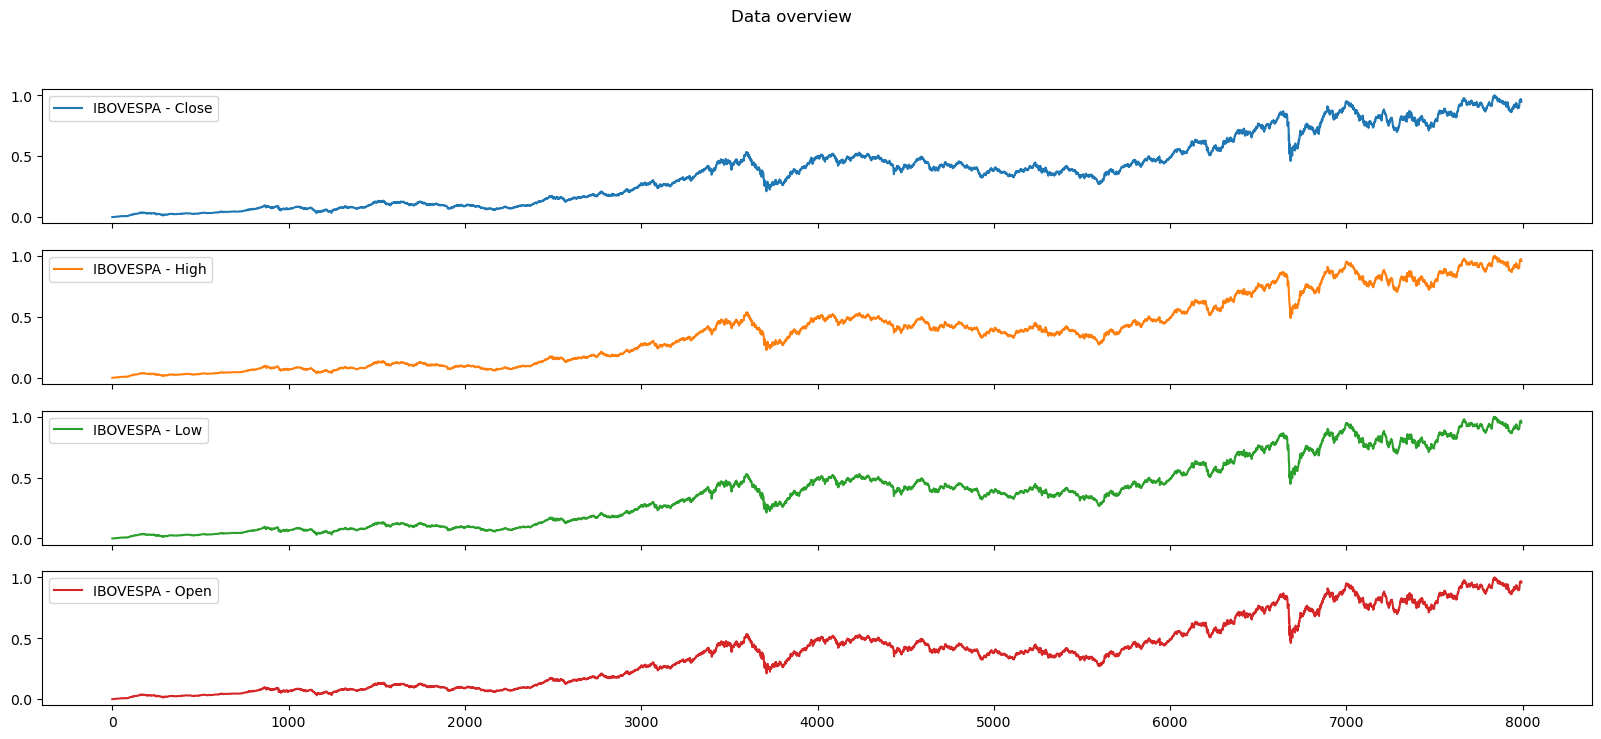

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

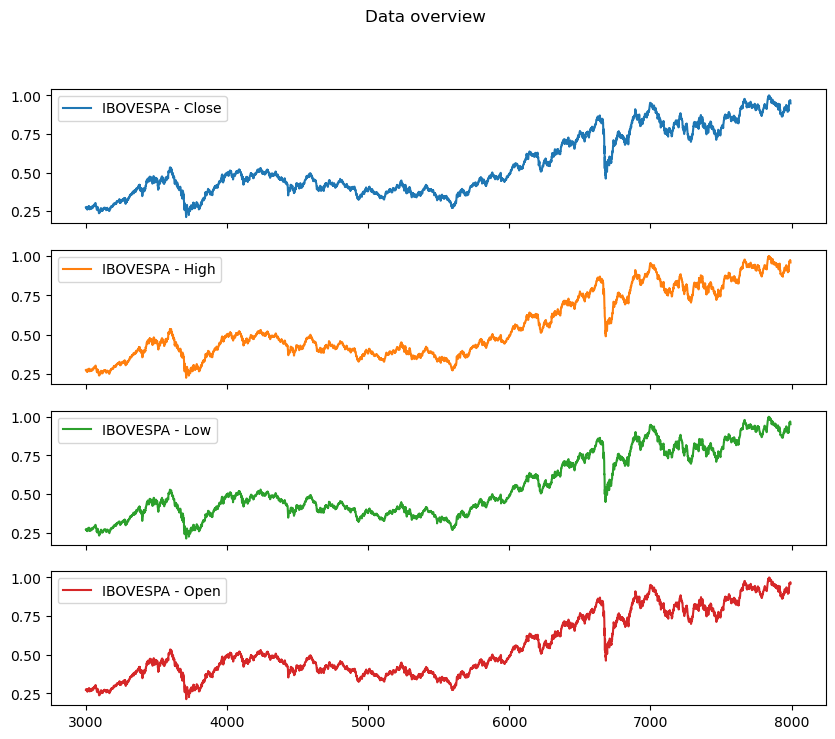

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

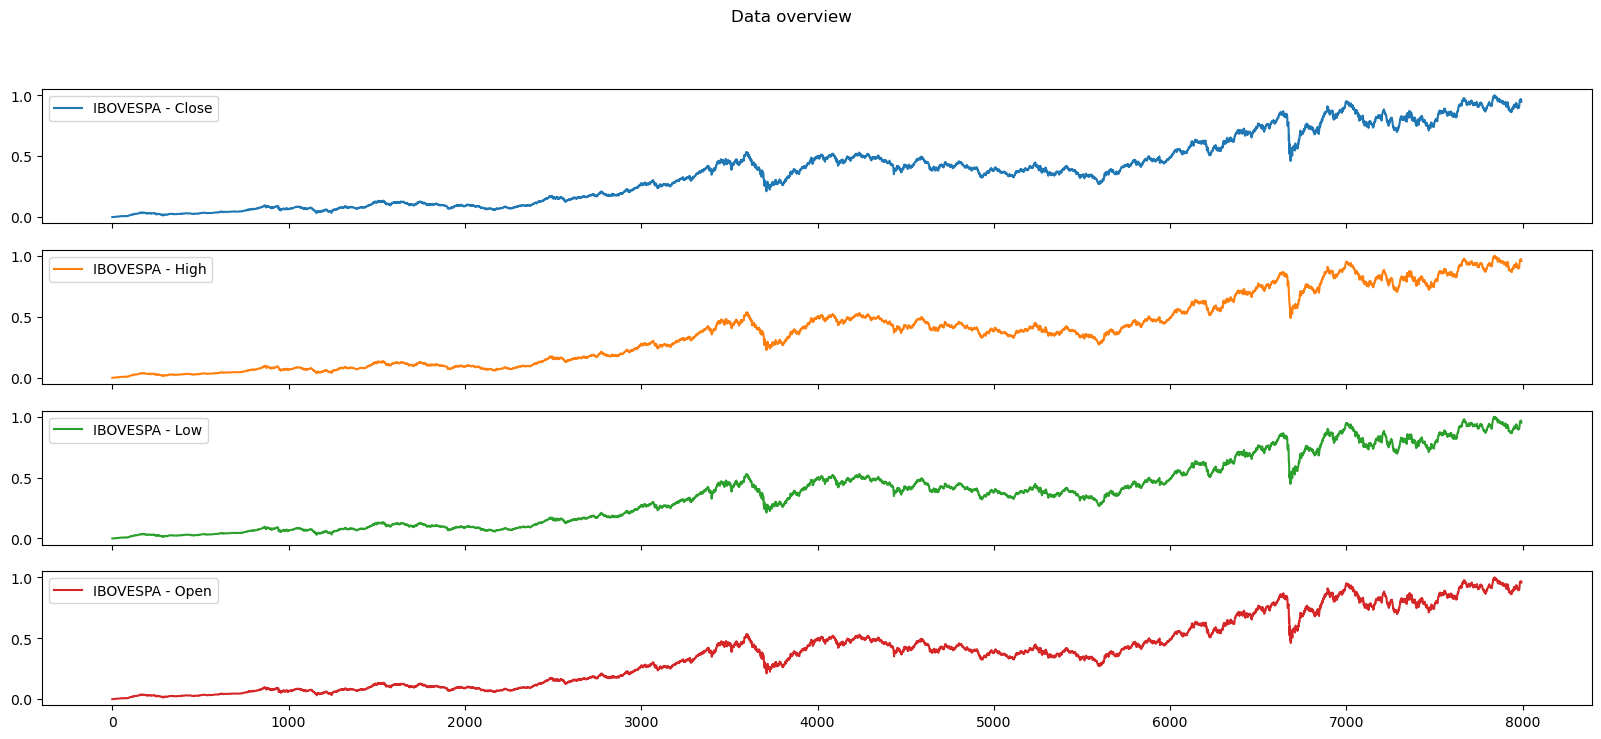

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

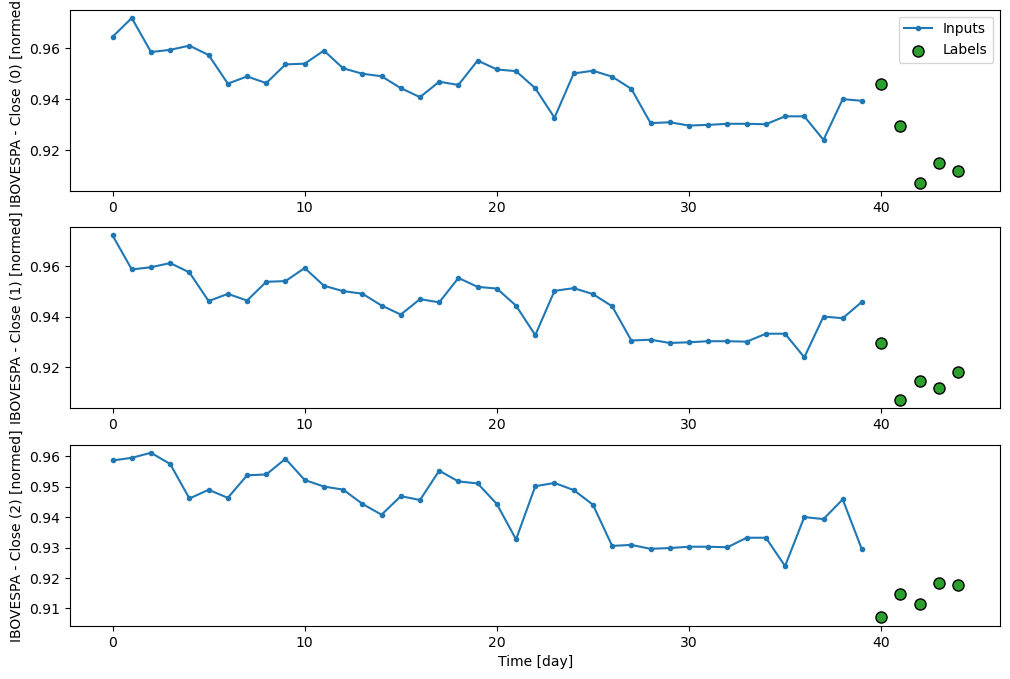

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:08 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 65.5280 - mean_squared_error: 5.1372e-05 - root_mean_squared_error: 0.0071  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 54.2752 - mean_squared_error: 5.5985e-05 - root_mean_squared_error: 0.0075

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 49.8798 - mean_squared_error: 6.6024e-05 - root_mean_squared_error: 0.0080

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 47.3271 - mean_squared_error: 7.3904e-05 - root_mean_squared_error: 0.0085

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 45.0670 - mean_squared_error: 7.7018e-05 - root_mean_squared_error: 0.0087

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 42.9271 - mean_squared_error: 7.7754e-05 - root_mean_squared_error: 0.0087

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 40.2392 - mean_squared_error: 7.6653e-05 - root_mean_squared_error: 0.0087

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 38.6269 - mean_squared_error: 7.8682e-05 - root_mean_squared_error: 0.0088

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 37.2887 - mean_squared_error: 8.3617e-05 - root_mean_squared_error: 0.0090

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.2710 - mean_squared_error: 9.2485e-05 - root_mean_squared_error: 0.0095

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.3058 - mean_squared_error: 9.9185e-05 - root_mean_squared_error: 0.0098

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.4693 - mean_squared_error: 1.0469e-04 - root_mean_squared_error: 0.0100

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.5447 - mean_squared_error: 1.1288e-04 - root_mean_squared_error: 0.0104

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.8984 - mean_squared_error: 1.1815e-04 - root_mean_squared_error: 0.0106

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.3003 - mean_squared_error: 1.2377e-04 - root_mean_squared_error: 0.0108

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 31.7691 - mean_squared_error: 1.3092e-04 - root_mean_squared_error: 0.0111

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 31.2568 - mean_squared_error: 1.3718e-04 - root_mean_squared_error: 0.0114

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 30.7656 - mean_squared_error: 1.4274e-04 - root_mean_squared_error: 0.0116

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 30.3094 - mean_squared_error: 1.4789e-04 - root_mean_squared_error: 0.0118

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 29.8764 - mean_squared_error: 1.5247e-04 - root_mean_squared_error: 0.0120

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 29.4558 - mean_squared_error: 1.5627e-04 - root_mean_squared_error: 0.0121

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 28.9412 - mean_squared_error: 1.6072e-04 - root_mean_squared_error: 0.0123

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 28.6105 - mean_squared_error: 1.6475e-04 - root_mean_squared_error: 0.0125

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 28.3270 - mean_squared_error: 1.7069e-04 - root_mean_squared_error: 0.0127

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 28.0795 - mean_squared_error: 1.7951e-04 - root_mean_squared_error: 0.0130

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 27.8413 - mean_squared_error: 1.8804e-04 - root_mean_squared_error: 0.0132

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 27.6026 - mean_squared_error: 1.9577e-04 - root_mean_squared_error: 0.0135

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 27.3663 - mean_squared_error: 2.0298e-04 - root_mean_squared_error: 0.0137

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 27.1302 - mean_squared_error: 2.0953e-04 - root_mean_squared_error: 0.0139

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 26.8992 - mean_squared_error: 2.1607e-04 - root_mean_squared_error: 0.0141

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 26.6769 - mean_squared_error: 2.2359e-04 - root_mean_squared_error: 0.0143

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 26.4625 - mean_squared_error: 2.3186e-04 - root_mean_squared_error: 0.0146

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 26.2604 - mean_squared_error: 2.4286e-04 - root_mean_squared_error: 0.0149

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 26.0704 - mean_squared_error: 2.5794e-04 - root_mean_squared_error: 0.0152

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 25.8840 - mean_squared_error: 2.7420e-04 - root_mean_squared_error: 0.0156

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 25.7027 - mean_squared_error: 2.9210e-04 - root_mean_squared_error: 0.0160

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 25.5267 - mean_squared_error: 3.1110e-04 - root_mean_squared_error: 0.0164

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 25.3688 - mean_squared_error: 3.3456e-04 - root_mean_squared_error: 0.0169

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 25.2160 - mean_squared_error: 3.5801e-04 - root_mean_squared_error: 0.0174

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 25.0751 - mean_squared_error: 3.8824e-04 - root_mean_squared_error: 0.0179

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 24.9482 - mean_squared_error: 4.3053e-04 - root_mean_squared_error: 0.0186

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 24.7844 - mean_squared_error: 4.8866e-04 - root_mean_squared_error: 0.0195

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 24.6623 - mean_squared_error: 5.3034e-04 - root_mean_squared_error: 0.0202

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 24.5395 - mean_squared_error: 5.6986e-04 - root_mean_squared_error: 0.0208

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 24.4152 - mean_squared_error: 6.0684e-04 - root_mean_squared_error: 0.0214

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 24.2940 - mean_squared_error: 6.4348e-04 - root_mean_squared_error: 0.0219

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 24.1346 - mean_squared_error: 6.9088e-04 - root_mean_squared_error: 0.0227

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 24.0141 - mean_squared_error: 7.2386e-04 - root_mean_squared_error: 0.0232

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 23.8948 - mean_squared_error: 7.5527e-04 - root_mean_squared_error: 0.0237

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 23.7772 - mean_squared_error: 7.8532e-04 - root_mean_squared_error: 0.0241

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 23.6589 - mean_squared_error: 8.1349e-04 - root_mean_squared_error: 0.0246

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 23.5418 - mean_squared_error: 8.4033e-04 - root_mean_squared_error: 0.0250

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 23.4276 - mean_squared_error: 8.6659e-04 - root_mean_squared_error: 0.0254

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 23.3133 - mean_squared_error: 8.9132e-04 - root_mean_squared_error: 0.0258

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 23.1994 - mean_squared_error: 9.1470e-04 - root_mean_squared_error: 0.0262

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 23.0893 - mean_squared_error: 9.3755e-04 - root_mean_squared_error: 0.0266

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 22.9821 - mean_squared_error: 9.5979e-04 - root_mean_squared_error: 0.0269

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 22.8426 - mean_squared_error: 9.8890e-04 - root_mean_squared_error: 0.0274

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 22.7429 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0277    

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 22.6461 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 22.5514 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0284

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 22.4575 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 22.3672 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 22.2789 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 22.1910 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 22.1037 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 21.9905 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 21.9124 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 21.8359 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 21.7608 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 21.6870 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 21.6137 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 21.5403 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 21.4672 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 21.3942 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 21.2970 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 21.2730 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347 - val_loss: 0.0408 - val_mean_absolute_error: 0.0408 - val_mean_absolute_percentage_error: 4.2995 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0467 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.4994 - mean_absolute_error: 0.4994 - mean_absolute_percentage_error: 6709.6187 - mean_squared_error: 0.2494 - root_mean_squared_error: 0.4994

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4944 - mean_absolute_error: 0.4944 - mean_absolute_percentage_error: 5122.4229 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4945 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4810 - mean_absolute_error: 0.4810 - mean_absolute_percentage_error: 4180.1792 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4818

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4607 - mean_absolute_error: 0.4607 - mean_absolute_percentage_error: 3642.3809 - mean_squared_error: 0.2159 - root_mean_squared_error: 0.4636

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - mean_absolute_percentage_error: 3289.2236 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4495

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4335 - mean_absolute_error: 0.4335 - mean_absolute_percentage_error: 3030.4668 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4381

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4212 - mean_absolute_error: 0.4212 - mean_absolute_percentage_error: 2819.8369 - mean_squared_error: 0.1845 - root_mean_squared_error: 0.4271

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 2636.0803 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.4154

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3912 - mean_absolute_error: 0.3912 - mean_absolute_percentage_error: 2475.7974 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.4041

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3762 - mean_absolute_error: 0.3762 - mean_absolute_percentage_error: 2334.6978 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3932

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3619 - mean_absolute_error: 0.3619 - mean_absolute_percentage_error: 2209.9976 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3829

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3485 - mean_absolute_error: 0.3485 - mean_absolute_percentage_error: 2099.0776 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1999.8444 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3642

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1910.5566 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3558

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1829.7319 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3479

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1756.2250 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3405

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1689.0770 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3335

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1627.4819 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3270

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1570.7568 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3208

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1518.3307 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.3150

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1469.7374 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.3095

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1424.5493 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.3043

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1382.4240 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2994

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1343.0457 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2946

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1306.1388 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2902

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1271.4507 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2859

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 1228.3087 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2805

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1198.0605 - mean_squared_error: 0.0855 - root_mean_squared_error: 0.2766

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1169.4479 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2729

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1142.3380 - mean_squared_error: 0.0817 - root_mean_squared_error: 0.2694

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 1116.6102 - mean_squared_error: 0.0799 - root_mean_squared_error: 0.2660

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 1092.1576 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2627

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 1068.8864 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2596

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1046.7076 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2566

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 1032.4895 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2546

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 1011.9602 - mean_squared_error: 0.0727 - root_mean_squared_error: 0.2518

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 992.3287 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2490 

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 967.4476 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2455

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 949.6913 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2429

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 932.6566 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2405

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 916.3007 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2381

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 900.5837 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2358

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 885.4627 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2336

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 870.9043 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2315

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 852.3104 - mean_squared_error: 0.0615 - root_mean_squared_error: 0.2287

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 838.9387 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2267

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 826.0290 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2247

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 813.5576 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2228

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 801.5023 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2210

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 789.8406 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2192

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 778.5526 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2174

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 767.6203 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2157

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 757.0262 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2140

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 746.7545 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2124

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 736.7905 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2108

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 727.1210 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2092

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 717.7311 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2077

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 708.6086 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2062

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 699.7429 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2048

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 691.1241 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2033

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 682.7403 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2020

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 674.5813 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2006

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 666.6378 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.1993

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 658.9008 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.1980

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 651.3622 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.1967

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 644.0140 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.1954

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 636.8488 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1942

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 629.8592 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.1930

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 623.0386 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.1919

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 616.3837 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1907

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 609.8870 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.1896

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 603.5424 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1885

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 597.3450 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1875

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 591.2888 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1864

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 585.3691 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1854

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 579.5803 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1844

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 573.9188 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1834

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 568.3796 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1825

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 562.9603 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1816

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 561.1830 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1812 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282 - val_mean_absolute_percentage_error: 3.0662 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0323 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 2937.3672 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.2189

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 2232.0930 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.2150 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1816.8071 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.2083

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 1571.9385 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1989

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 1391.2542 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1888

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 1256.9917 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1800

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 1149.2039 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1721

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 1061.3199 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1652

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 987.6257 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1590 

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 924.6701 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1535

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 870.3359 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1486

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 822.8585 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1441

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 780.9995 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1401

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 743.7343 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1363

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 710.2972 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1329

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 680.1019 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1297

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 652.6902 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1267

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 627.6813 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1240

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 604.7598 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1214

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 583.6669 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1190

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 564.1931 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1168

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 546.1421 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1146

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 529.3638 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1126

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 513.7230 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1107

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 499.1004 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1089

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 485.3914 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1072

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 472.5085 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1055

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 460.3777 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1040

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 448.9296 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1025

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 438.1062 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1011

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 427.8563 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0997

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 421.3185 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0988

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 418.1335 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0984

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 411.9238 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0976

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 405.9196 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0968

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 397.2742 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0956

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 391.7375 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0948

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 386.3716 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0941

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 381.1691 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0933

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 373.6546 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0923

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 366.4661 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0913

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 359.5836 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0903

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 355.1560 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0897

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 350.8500 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0890

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 346.6598 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0884

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 340.5812 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0876

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 336.6598 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0870

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 330.9642 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0861

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 327.2856 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0856

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 321.9363 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0848

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 316.7794 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0840

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 313.4434 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0835

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 308.5855 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0828

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 303.8943 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0821

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 299.3608 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0814

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 294.9760 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0807

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 293.5463 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0805

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 290.7329 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0801

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 287.9792 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0796

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 283.9562 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0790

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 280.0572 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0784

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 276.2769 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0778

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 273.8199 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0774

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 270.2247 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0769

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 267.8860 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0765

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 265.5922 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0761

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 262.2332 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0756

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 258.9679 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0750

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 255.7924 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0745

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 252.7030 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0740

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 250.6896 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0737

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 247.7362 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0732

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 244.8605 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0727

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 242.9850 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0724

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 241.1414 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0721

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 239.3293 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0718

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 237.5474 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0716

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 234.9295 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0711

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 233.2201 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0709

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 230.7088 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0705

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 228.2575 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0701

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 225.8645 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0697

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 223.5271 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0693

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 221.9996 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0691

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 219.7518 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0688

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 217.5548 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0685

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 215.4066 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0681

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 214.0008 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0679

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 211.9303 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0676

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 210.5768 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0674 - val_loss: 0.0391 - val_mean_absolute_error: 0.0391 - val_mean_absolute_percentage_error: 4.1326 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0428 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 1212.8650 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 998.1519 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 836.3172 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0867

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 724.4710 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 644.7505 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 613.8171 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 587.0627 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 541.5748 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 486.9805 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 444.5418 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0656

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 409.9680 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0629

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 381.1889 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0605

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 356.7029 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0584

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 335.6302 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0565

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 317.2448 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0548

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 301.0526 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0532

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 286.6783 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0518

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 273.8053 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 262.2062 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0493

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 251.6918 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 242.0997 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 233.3121 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 225.2280 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 217.7685 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 213.1047 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 206.5298 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 200.4148 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 196.5691 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 191.1092 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 185.9870 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 182.7442 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 178.1168 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 173.7488 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 170.9701 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 168.2916 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 165.7071 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 161.9963 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 159.6261 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 157.3343 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 155.1163 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 151.9199 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 149.8707 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 146.9130 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 144.0855 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 142.2684 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 139.6400 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 137.1223 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 135.5007 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 133.9222 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 131.6311 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 129.4270 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.3050 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 125.2602 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 123.2883 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 121.3859 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 119.5496 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 117.7763 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 116.0619 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 114.4032 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 112.7976 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 111.2420 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 109.7344 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.2728 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 106.8557 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 105.4800 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 104.1440 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 102.8461 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 101.5844 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 100.3575 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 99.1636 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294 

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 98.0018 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 96.8706 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 95.7693 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 94.6965 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 93.6513 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 92.6321 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 91.6380 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 90.6689 - mean_squared_error: 9.9513e-04 - root_mean_squared_error: 0.0283

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 90.0358 - mean_squared_error: 9.9025e-04 - root_mean_squared_error: 0.0283

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 89.1052 - mean_squared_error: 9.8331e-04 - root_mean_squared_error: 0.0282

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 88.1964 - mean_squared_error: 9.7669e-04 - root_mean_squared_error: 0.0281

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 87.3085 - mean_squared_error: 9.7033e-04 - root_mean_squared_error: 0.0280

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 86.4410 - mean_squared_error: 9.6433e-04 - root_mean_squared_error: 0.0279

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 85.5936 - mean_squared_error: 9.5900e-04 - root_mean_squared_error: 0.0279

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 84.7650 - mean_squared_error: 9.5386e-04 - root_mean_squared_error: 0.0278

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 83.9551 - mean_squared_error: 9.4923e-04 - root_mean_squared_error: 0.0278

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 83.1630 - mean_squared_error: 9.4492e-04 - root_mean_squared_error: 0.0278

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 82.6453 - mean_squared_error: 9.4215e-04 - root_mean_squared_error: 0.0277 - val_loss: 0.0552 - val_mean_absolute_error: 0.0552 - val_mean_absolute_percentage_error: 5.8655 - val_mean_squared_error: 0.0033 - val_root_mean_squared_error: 0.0578 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 1178.1533 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0883

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 886.5327 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 709.3054 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0799

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 600.2170 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0744

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 529.8979 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 477.2619 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 436.3442 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0639

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 403.1877 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0614

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 375.2846 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0591

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 351.4401 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0571

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 330.8551 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0553

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 312.8518 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0537

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 296.9832 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 282.8969 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0508

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 270.2876 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0495

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 258.9200 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0484

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 248.6084 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 239.1944 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 230.5670 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 222.6271 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 215.2981 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 208.5046 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 202.1971 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 196.3237 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 190.8374 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 185.6937 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 180.8588 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 176.3046 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 172.0039 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 167.9361 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 164.0823 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 160.4256 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 156.9510 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 153.6452 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 151.5287 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 149.4775 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 148.4755 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 146.5173 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 145.5602 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 144.6174 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 143.6884 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 142.7728 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 140.9814 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 140.1048 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 138.3900 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 135.9076 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 133.5251 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 131.2357 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 129.0337 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 126.9139 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 124.8713 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 122.9016 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 121.0014 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 119.1667 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 117.3943 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 115.6807 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 114.0227 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 112.4179 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 111.3762 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 109.8539 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 108.3778 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 106.9463 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 105.5572 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 104.2083 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 102.8981 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 101.6251 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 100.3873 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 99.1833 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291 

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 98.0116 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 96.8709 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 95.7598 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 94.6773 - mean_squared_error: 9.9995e-04 - root_mean_squared_error: 0.0285

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 93.6226 - mean_squared_error: 9.9026e-04 - root_mean_squared_error: 0.0283

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 92.5943 - mean_squared_error: 9.8089e-04 - root_mean_squared_error: 0.0282

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 91.5913 - mean_squared_error: 9.7180e-04 - root_mean_squared_error: 0.0281

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 90.6131 - mean_squared_error: 9.6321e-04 - root_mean_squared_error: 0.0279

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 89.6597 - mean_squared_error: 9.5568e-04 - root_mean_squared_error: 0.0278

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 88.7293 - mean_squared_error: 9.4859e-04 - root_mean_squared_error: 0.0277

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 87.8216 - mean_squared_error: 9.4253e-04 - root_mean_squared_error: 0.0277

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 86.9353 - mean_squared_error: 9.3698e-04 - root_mean_squared_error: 0.0276

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 86.0702 - mean_squared_error: 9.3232e-04 - root_mean_squared_error: 0.0276

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 85.2247 - mean_squared_error: 9.2792e-04 - root_mean_squared_error: 0.0275

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 84.3982 - mean_squared_error: 9.2378e-04 - root_mean_squared_error: 0.0275

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 83.5900 - mean_squared_error: 9.1984e-04 - root_mean_squared_error: 0.0274

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 82.7993 - mean_squared_error: 9.1604e-04 - root_mean_squared_error: 0.0274

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 82.0263 - mean_squared_error: 9.1230e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0176 - val_mean_absolute_error: 0.0176 - val_mean_absolute_percentage_error: 1.8566 - val_mean_squared_error: 4.3689e-04 - val_root_mean_squared_error: 0.0209 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 533.2147 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 385.7112 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0362 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 300.1027 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 258.2539 - mean_squared_error: 9.6728e-04 - root_mean_squared_error: 0.0307

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 229.7168 - mean_squared_error: 8.8450e-04 - root_mean_squared_error: 0.0293

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 208.6719 - mean_squared_error: 8.1905e-04 - root_mean_squared_error: 0.0282

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 191.8651 - mean_squared_error: 7.6323e-04 - root_mean_squared_error: 0.0271

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 178.1032 - mean_squared_error: 7.1600e-04 - root_mean_squared_error: 0.0262

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 170.1480 - mean_squared_error: 6.8800e-04 - root_mean_squared_error: 0.0256

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 159.7091 - mean_squared_error: 6.5133e-04 - root_mean_squared_error: 0.0249

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 150.6938 - mean_squared_error: 6.1951e-04 - root_mean_squared_error: 0.0242

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 142.8402 - mean_squared_error: 5.9169e-04 - root_mean_squared_error: 0.0236

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 135.9153 - mean_squared_error: 5.6675e-04 - root_mean_squared_error: 0.0231

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 129.7570 - mean_squared_error: 5.4417e-04 - root_mean_squared_error: 0.0226

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 124.2182 - mean_squared_error: 5.2354e-04 - root_mean_squared_error: 0.0221

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 119.1996 - mean_squared_error: 5.0458e-04 - root_mean_squared_error: 0.0217

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 114.6310 - mean_squared_error: 4.8721e-04 - root_mean_squared_error: 0.0213

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 110.4518 - mean_squared_error: 4.7121e-04 - root_mean_squared_error: 0.0209

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 106.6098 - mean_squared_error: 4.5638e-04 - root_mean_squared_error: 0.0205

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 103.0663 - mean_squared_error: 4.4261e-04 - root_mean_squared_error: 0.0202

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 99.7871 - mean_squared_error: 4.2977e-04 - root_mean_squared_error: 0.0198 

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 96.7450 - mean_squared_error: 4.1779e-04 - root_mean_squared_error: 0.0195

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 93.9157 - mean_squared_error: 4.0658e-04 - root_mean_squared_error: 0.0192

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.2785 - mean_squared_error: 3.9608e-04 - root_mean_squared_error: 0.0190

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 88.8120 - mean_squared_error: 3.8621e-04 - root_mean_squared_error: 0.0187

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.4965 - mean_squared_error: 3.7690e-04 - root_mean_squared_error: 0.0184

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 84.3179 - mean_squared_error: 3.6814e-04 - root_mean_squared_error: 0.0182

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 82.2651 - mean_squared_error: 3.5991e-04 - root_mean_squared_error: 0.0180

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 80.3255 - mean_squared_error: 3.5212e-04 - root_mean_squared_error: 0.0178

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.4897 - mean_squared_error: 3.4476e-04 - root_mean_squared_error: 0.0175

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.7495 - mean_squared_error: 3.3779e-04 - root_mean_squared_error: 0.0174

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.0967 - mean_squared_error: 3.3118e-04 - root_mean_squared_error: 0.0172

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.5247 - mean_squared_error: 3.2494e-04 - root_mean_squared_error: 0.0170

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 72.0277 - mean_squared_error: 3.1904e-04 - root_mean_squared_error: 0.0168

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 70.5995 - mean_squared_error: 3.1343e-04 - root_mean_squared_error: 0.0167

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 69.2353 - mean_squared_error: 3.0811e-04 - root_mean_squared_error: 0.0165

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.9312 - mean_squared_error: 3.0314e-04 - root_mean_squared_error: 0.0164

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.6833 - mean_squared_error: 2.9853e-04 - root_mean_squared_error: 0.0162

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 65.4878 - mean_squared_error: 2.9426e-04 - root_mean_squared_error: 0.0161

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 64.3439 - mean_squared_error: 2.9053e-04 - root_mean_squared_error: 0.0160

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 63.2468 - mean_squared_error: 2.8706e-04 - root_mean_squared_error: 0.0159

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 62.1928 - mean_squared_error: 2.8382e-04 - root_mean_squared_error: 0.0158

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.1791 - mean_squared_error: 2.8078e-04 - root_mean_squared_error: 0.0158

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.2031 - mean_squared_error: 2.7791e-04 - root_mean_squared_error: 0.0157

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.2629 - mean_squared_error: 2.7522e-04 - root_mean_squared_error: 0.0156

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.3561 - mean_squared_error: 2.7266e-04 - root_mean_squared_error: 0.0155

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.4813 - mean_squared_error: 2.7023e-04 - root_mean_squared_error: 0.0155

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.6369 - mean_squared_error: 2.6797e-04 - root_mean_squared_error: 0.0154

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.8217 - mean_squared_error: 2.6594e-04 - root_mean_squared_error: 0.0154

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.0338 - mean_squared_error: 2.6402e-04 - root_mean_squared_error: 0.0153

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.2713 - mean_squared_error: 2.6216e-04 - root_mean_squared_error: 0.0153

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.5329 - mean_squared_error: 2.6035e-04 - root_mean_squared_error: 0.0152

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.8176 - mean_squared_error: 2.5858e-04 - root_mean_squared_error: 0.0152

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.1239 - mean_squared_error: 2.5683e-04 - root_mean_squared_error: 0.0152

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.4512 - mean_squared_error: 2.5513e-04 - root_mean_squared_error: 0.0151

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.7986 - mean_squared_error: 2.5351e-04 - root_mean_squared_error: 0.0151

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.1657 - mean_squared_error: 2.5200e-04 - root_mean_squared_error: 0.0150

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.5508 - mean_squared_error: 2.5052e-04 - root_mean_squared_error: 0.0150

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.9534 - mean_squared_error: 2.4907e-04 - root_mean_squared_error: 0.0150

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.3729 - mean_squared_error: 2.4769e-04 - root_mean_squared_error: 0.0149

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.8085 - mean_squared_error: 2.4638e-04 - root_mean_squared_error: 0.0149

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.2593 - mean_squared_error: 2.4512e-04 - root_mean_squared_error: 0.0149

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.7248 - mean_squared_error: 2.4391e-04 - root_mean_squared_error: 0.0148

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.2044 - mean_squared_error: 2.4277e-04 - root_mean_squared_error: 0.0148

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.6974 - mean_squared_error: 2.4168e-04 - root_mean_squared_error: 0.0148

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 45.2036 - mean_squared_error: 2.4074e-04 - root_mean_squared_error: 0.0148

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 44.7225 - mean_squared_error: 2.3993e-04 - root_mean_squared_error: 0.0147

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 44.2535 - mean_squared_error: 2.3933e-04 - root_mean_squared_error: 0.0147

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 43.7960 - mean_squared_error: 2.3878e-04 - root_mean_squared_error: 0.0147

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 43.3494 - mean_squared_error: 2.3830e-04 - root_mean_squared_error: 0.0147

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 42.9143 - mean_squared_error: 2.3839e-04 - root_mean_squared_error: 0.0147

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 42.4893 - mean_squared_error: 2.3854e-04 - root_mean_squared_error: 0.0147

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 42.0745 - mean_squared_error: 2.3894e-04 - root_mean_squared_error: 0.0148

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 41.6692 - mean_squared_error: 2.3941e-04 - root_mean_squared_error: 0.0148

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 41.2731 - mean_squared_error: 2.3997e-04 - root_mean_squared_error: 0.0148

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 40.8861 - mean_squared_error: 2.4077e-04 - root_mean_squared_error: 0.0149

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 40.5077 - mean_squared_error: 2.4170e-04 - root_mean_squared_error: 0.0149

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 40.1375 - mean_squared_error: 2.4265e-04 - root_mean_squared_error: 0.0149

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 39.7753 - mean_squared_error: 2.4365e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 39.3050 - mean_squared_error: 2.4526e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 1.3693 - val_mean_squared_error: 2.5964e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 917.0913 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0715

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 689.2180 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0690 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 551.3058 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0647

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 467.6115 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0604

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 413.3748 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0571

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 372.5390 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 340.6220 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0518

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 314.5808 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0497

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 292.8174 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0478

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 274.2533 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 258.2641 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 244.2926 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 231.9834 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 221.0700 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 214.4476 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 208.2777 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 202.5077 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 197.1014 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 189.5892 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 182.7121 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 176.3902 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 170.5583 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 165.1612 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 160.1525 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 155.4975 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 151.1574 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 147.0917 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 143.2706 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 139.6732 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 137.3886 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 134.1186 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 131.0242 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 128.0909 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 125.3074 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 122.6621 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 120.1446 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 117.7439 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 115.4523 - mean_squared_error: 9.8951e-04 - root_mean_squared_error: 0.0289

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 113.2617 - mean_squared_error: 9.7270e-04 - root_mean_squared_error: 0.0286

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 111.1651 - mean_squared_error: 9.5686e-04 - root_mean_squared_error: 0.0284

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 109.8171 - mean_squared_error: 9.4684e-04 - root_mean_squared_error: 0.0282

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 107.8665 - mean_squared_error: 9.3262e-04 - root_mean_squared_error: 0.0280

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 105.9951 - mean_squared_error: 9.1910e-04 - root_mean_squared_error: 0.0278

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 104.1982 - mean_squared_error: 9.0638e-04 - root_mean_squared_error: 0.0276

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 102.4704 - mean_squared_error: 8.9428e-04 - root_mean_squared_error: 0.0274

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 100.8078 - mean_squared_error: 8.8279e-04 - root_mean_squared_error: 0.0273

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 99.2061 - mean_squared_error: 8.7178e-04 - root_mean_squared_error: 0.0271 

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 97.6617 - mean_squared_error: 8.6118e-04 - root_mean_squared_error: 0.0269

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 96.1717 - mean_squared_error: 8.5098e-04 - root_mean_squared_error: 0.0268

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 94.7333 - mean_squared_error: 8.4116e-04 - root_mean_squared_error: 0.0266

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 93.3438 - mean_squared_error: 8.3173e-04 - root_mean_squared_error: 0.0265

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 92.0006 - mean_squared_error: 8.2264e-04 - root_mean_squared_error: 0.0263

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 90.7010 - mean_squared_error: 8.1383e-04 - root_mean_squared_error: 0.0262

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.4429 - mean_squared_error: 8.0528e-04 - root_mean_squared_error: 0.0261

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 88.2241 - mean_squared_error: 7.9696e-04 - root_mean_squared_error: 0.0259

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 87.0426 - mean_squared_error: 7.8885e-04 - root_mean_squared_error: 0.0258

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 85.8967 - mean_squared_error: 7.8095e-04 - root_mean_squared_error: 0.0257

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 84.7851 - mean_squared_error: 7.7329e-04 - root_mean_squared_error: 0.0256

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 83.7061 - mean_squared_error: 7.6583e-04 - root_mean_squared_error: 0.0254

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 82.6581 - mean_squared_error: 7.5856e-04 - root_mean_squared_error: 0.0253

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 81.6397 - mean_squared_error: 7.5147e-04 - root_mean_squared_error: 0.0252

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 80.6500 - mean_squared_error: 7.4458e-04 - root_mean_squared_error: 0.0251

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 79.6872 - mean_squared_error: 7.3785e-04 - root_mean_squared_error: 0.0250

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 78.7504 - mean_squared_error: 7.3128e-04 - root_mean_squared_error: 0.0249

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 77.8383 - mean_squared_error: 7.2488e-04 - root_mean_squared_error: 0.0248

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 76.9499 - mean_squared_error: 7.1862e-04 - root_mean_squared_error: 0.0247

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 76.0844 - mean_squared_error: 7.1252e-04 - root_mean_squared_error: 0.0246

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 75.2407 - mean_squared_error: 7.0657e-04 - root_mean_squared_error: 0.0245

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 74.4182 - mean_squared_error: 7.0078e-04 - root_mean_squared_error: 0.0244

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 73.6159 - mean_squared_error: 6.9516e-04 - root_mean_squared_error: 0.0243

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 72.8330 - mean_squared_error: 6.8966e-04 - root_mean_squared_error: 0.0242

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 72.0691 - mean_squared_error: 6.8447e-04 - root_mean_squared_error: 0.0241

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 71.3239 - mean_squared_error: 6.7979e-04 - root_mean_squared_error: 0.0240

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 70.5962 - mean_squared_error: 6.7528e-04 - root_mean_squared_error: 0.0239

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 69.8855 - mean_squared_error: 6.7098e-04 - root_mean_squared_error: 0.0239

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 69.1909 - mean_squared_error: 6.6683e-04 - root_mean_squared_error: 0.0238

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 68.5120 - mean_squared_error: 6.6280e-04 - root_mean_squared_error: 0.0238

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 67.8483 - mean_squared_error: 6.5894e-04 - root_mean_squared_error: 0.0237

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 67.1993 - mean_squared_error: 6.5521e-04 - root_mean_squared_error: 0.0236

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 66.5643 - mean_squared_error: 6.5160e-04 - root_mean_squared_error: 0.0236

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 65.9428 - mean_squared_error: 6.4806e-04 - root_mean_squared_error: 0.0235

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 65.3352 - mean_squared_error: 6.4462e-04 - root_mean_squared_error: 0.0235 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 1.5524 - val_mean_squared_error: 3.1924e-04 - val_root_mean_squared_error: 0.0179 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 154.7483 - mean_squared_error: 1.9122e-04 - root_mean_squared_error: 0.0138

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 109.1878 - mean_squared_error: 1.4768e-04 - root_mean_squared_error: 0.0121 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 85.0034 - mean_squared_error: 1.1936e-04 - root_mean_squared_error: 0.0108 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 73.0843 - mean_squared_error: 1.0699e-04 - root_mean_squared_error: 0.0102

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 64.9142 - mean_squared_error: 9.7346e-05 - root_mean_squared_error: 0.0097

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 59.0488 - mean_squared_error: 9.0704e-05 - root_mean_squared_error: 0.0094

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 54.4033 - mean_squared_error: 8.5126e-05 - root_mean_squared_error: 0.0091

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 50.6225 - mean_squared_error: 8.0420e-05 - root_mean_squared_error: 0.0088

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 47.4208 - mean_squared_error: 7.6282e-05 - root_mean_squared_error: 0.0086

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 44.6836 - mean_squared_error: 7.2881e-05 - root_mean_squared_error: 0.0083

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 42.3298 - mean_squared_error: 7.0101e-05 - root_mean_squared_error: 0.0082

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 40.2632 - mean_squared_error: 6.7600e-05 - root_mean_squared_error: 0.0080

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 38.4533 - mean_squared_error: 6.5398e-05 - root_mean_squared_error: 0.0079

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 36.8524 - mean_squared_error: 6.3442e-05 - root_mean_squared_error: 0.0078

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 35.4067 - mean_squared_error: 6.1623e-05 - root_mean_squared_error: 0.0077

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 34.0951 - mean_squared_error: 5.9956e-05 - root_mean_squared_error: 0.0076

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 32.9031 - mean_squared_error: 5.8544e-05 - root_mean_squared_error: 0.0075

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 31.8100 - mean_squared_error: 5.7250e-05 - root_mean_squared_error: 0.0074

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 30.8041 - mean_squared_error: 5.6062e-05 - root_mean_squared_error: 0.0073

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 29.8745 - mean_squared_error: 5.4949e-05 - root_mean_squared_error: 0.0072

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 29.0138 - mean_squared_error: 5.3905e-05 - root_mean_squared_error: 0.0072

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 28.2133 - mean_squared_error: 5.2916e-05 - root_mean_squared_error: 0.0071

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 27.4693 - mean_squared_error: 5.1987e-05 - root_mean_squared_error: 0.0070

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 26.7763 - mean_squared_error: 5.1113e-05 - root_mean_squared_error: 0.0070

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 26.1264 - mean_squared_error: 5.0276e-05 - root_mean_squared_error: 0.0069

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.5147 - mean_squared_error: 4.9477e-05 - root_mean_squared_error: 0.0069

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 24.9387 - mean_squared_error: 4.8766e-05 - root_mean_squared_error: 0.0068

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 24.3954 - mean_squared_error: 4.8123e-05 - root_mean_squared_error: 0.0068

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 23.8812 - mean_squared_error: 4.7526e-05 - root_mean_squared_error: 0.0067

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 23.3942 - mean_squared_error: 4.6992e-05 - root_mean_squared_error: 0.0067

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.9320 - mean_squared_error: 4.6511e-05 - root_mean_squared_error: 0.0066

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.4925 - mean_squared_error: 4.6093e-05 - root_mean_squared_error: 0.0066

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 22.2114 - mean_squared_error: 4.5878e-05 - root_mean_squared_error: 0.0066

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 21.8071 - mean_squared_error: 4.5661e-05 - root_mean_squared_error: 0.0066

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 21.4209 - mean_squared_error: 4.5493e-05 - root_mean_squared_error: 0.0066

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 21.0518 - mean_squared_error: 4.5405e-05 - root_mean_squared_error: 0.0066

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 20.6985 - mean_squared_error: 4.5427e-05 - root_mean_squared_error: 0.0066

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 20.3604 - mean_squared_error: 4.5644e-05 - root_mean_squared_error: 0.0066

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 20.0362 - mean_squared_error: 4.5976e-05 - root_mean_squared_error: 0.0066

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 19.7279 - mean_squared_error: 4.6712e-05 - root_mean_squared_error: 0.0067

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 19.4329 - mean_squared_error: 4.7558e-05 - root_mean_squared_error: 0.0067

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 19.1514 - mean_squared_error: 4.8768e-05 - root_mean_squared_error: 0.0068

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 18.8811 - mean_squared_error: 5.0139e-05 - root_mean_squared_error: 0.0069

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 18.6218 - mean_squared_error: 5.1772e-05 - root_mean_squared_error: 0.0070

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 18.3722 - mean_squared_error: 5.3541e-05 - root_mean_squared_error: 0.0071

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 18.1311 - mean_squared_error: 5.5263e-05 - root_mean_squared_error: 0.0072

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.8981 - mean_squared_error: 5.6937e-05 - root_mean_squared_error: 0.0073

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.6731 - mean_squared_error: 5.8620e-05 - root_mean_squared_error: 0.0074

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.4555 - mean_squared_error: 6.0268e-05 - root_mean_squared_error: 0.0075

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.2447 - mean_squared_error: 6.1849e-05 - root_mean_squared_error: 0.0076

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 17.0400 - mean_squared_error: 6.3340e-05 - root_mean_squared_error: 0.0076

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.8414 - mean_squared_error: 6.4753e-05 - root_mean_squared_error: 0.0077

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.6487 - mean_squared_error: 6.6106e-05 - root_mean_squared_error: 0.0078

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 16.4615 - mean_squared_error: 6.7388e-05 - root_mean_squared_error: 0.0079

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 16.2795 - mean_squared_error: 6.8600e-05 - root_mean_squared_error: 0.0079

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 16.1028 - mean_squared_error: 6.9780e-05 - root_mean_squared_error: 0.0080

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.9313 - mean_squared_error: 7.0943e-05 - root_mean_squared_error: 0.0081

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.7644 - mean_squared_error: 7.2048e-05 - root_mean_squared_error: 0.0081

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 15.6020 - mean_squared_error: 7.3102e-05 - root_mean_squared_error: 0.0082

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 15.4443 - mean_squared_error: 7.4153e-05 - root_mean_squared_error: 0.0082

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 15.2910 - mean_squared_error: 7.5202e-05 - root_mean_squared_error: 0.0083

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 15.1417 - mean_squared_error: 7.6235e-05 - root_mean_squared_error: 0.0084

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.9964 - mean_squared_error: 7.7259e-05 - root_mean_squared_error: 0.0084

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 14.8548 - mean_squared_error: 7.8302e-05 - root_mean_squared_error: 0.0085

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 14.7169 - mean_squared_error: 7.9358e-05 - root_mean_squared_error: 0.0085

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 14.5827 - mean_squared_error: 8.0532e-05 - root_mean_squared_error: 0.0086

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 14.4520 - mean_squared_error: 8.1769e-05 - root_mean_squared_error: 0.0086

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 14.3247 - mean_squared_error: 8.3126e-05 - root_mean_squared_error: 0.0087

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 14.2004 - mean_squared_error: 8.4491e-05 - root_mean_squared_error: 0.0088

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 14.0788 - mean_squared_error: 8.5869e-05 - root_mean_squared_error: 0.0089

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 13.9608 - mean_squared_error: 8.7704e-05 - root_mean_squared_error: 0.0089

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 13.8455 - mean_squared_error: 8.9536e-05 - root_mean_squared_error: 0.0090

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 13.7329 - mean_squared_error: 9.1461e-05 - root_mean_squared_error: 0.0091

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 13.6226 - mean_squared_error: 9.3397e-05 - root_mean_squared_error: 0.0092

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 13.5147 - mean_squared_error: 9.5314e-05 - root_mean_squared_error: 0.0093

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 13.4093 - mean_squared_error: 9.7329e-05 - root_mean_squared_error: 0.0094

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 13.3062 - mean_squared_error: 9.9373e-05 - root_mean_squared_error: 0.0094

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 13.2052 - mean_squared_error: 1.0141e-04 - root_mean_squared_error: 0.0095

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 13.1061 - mean_squared_error: 1.0341e-04 - root_mean_squared_error: 0.0096

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 13.0092 - mean_squared_error: 1.0543e-04 - root_mean_squared_error: 0.0097

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 12.9774 - mean_squared_error: 1.0610e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1650 - val_mean_squared_error: 1.8214e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 880.8751 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0660

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 657.2411 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0628 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 521.3966 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0580

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 440.9274 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 390.0690 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0509

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 351.8580 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0484

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 321.8955 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 297.4340 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 276.8910 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 259.3459 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 244.1900 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 230.9241 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 219.2269 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 208.8294 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 199.5050 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 191.0923 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 183.4644 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 176.5041 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 170.1259 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 164.2568 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 158.8386 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 153.8163 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 150.6686 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 147.6683 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 143.4213 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 139.4473 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 135.7190 - mean_squared_error: 9.7564e-04 - root_mean_squared_error: 0.0290

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 132.2142 - mean_squared_error: 9.5091e-04 - root_mean_squared_error: 0.0285

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 128.9105 - mean_squared_error: 9.2759e-04 - root_mean_squared_error: 0.0281

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 125.7897 - mean_squared_error: 9.0555e-04 - root_mean_squared_error: 0.0278

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 122.8374 - mean_squared_error: 8.8471e-04 - root_mean_squared_error: 0.0274

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 120.0392 - mean_squared_error: 8.6497e-04 - root_mean_squared_error: 0.0270

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 117.3826 - mean_squared_error: 8.4624e-04 - root_mean_squared_error: 0.0267

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 114.8572 - mean_squared_error: 8.2849e-04 - root_mean_squared_error: 0.0264

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 112.4526 - mean_squared_error: 8.1161e-04 - root_mean_squared_error: 0.0261

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 110.9122 - mean_squared_error: 8.0081e-04 - root_mean_squared_error: 0.0259

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 108.6896 - mean_squared_error: 7.8528e-04 - root_mean_squared_error: 0.0256

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 106.5667 - mean_squared_error: 7.7059e-04 - root_mean_squared_error: 0.0253

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 104.5367 - mean_squared_error: 7.5666e-04 - root_mean_squared_error: 0.0251

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 102.5939 - mean_squared_error: 7.4354e-04 - root_mean_squared_error: 0.0248

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 100.7341 - mean_squared_error: 7.3120e-04 - root_mean_squared_error: 0.0246

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 98.9504 - mean_squared_error: 7.1946e-04 - root_mean_squared_error: 0.0244 

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.2373 - mean_squared_error: 7.0821e-04 - root_mean_squared_error: 0.0242

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 95.5904 - mean_squared_error: 6.9743e-04 - root_mean_squared_error: 0.0240

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 94.0058 - mean_squared_error: 6.8710e-04 - root_mean_squared_error: 0.0238

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.4797 - mean_squared_error: 6.7714e-04 - root_mean_squared_error: 0.0236

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.0088 - mean_squared_error: 6.6755e-04 - root_mean_squared_error: 0.0235

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 89.5902 - mean_squared_error: 6.5833e-04 - root_mean_squared_error: 0.0233

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 88.2215 - mean_squared_error: 6.4948e-04 - root_mean_squared_error: 0.0231

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.8998 - mean_squared_error: 6.4098e-04 - root_mean_squared_error: 0.0230

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 85.6228 - mean_squared_error: 6.3281e-04 - root_mean_squared_error: 0.0228

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.3879 - mean_squared_error: 6.2491e-04 - root_mean_squared_error: 0.0227

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 83.1928 - mean_squared_error: 6.1727e-04 - root_mean_squared_error: 0.0225

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 82.0357 - mean_squared_error: 6.0987e-04 - root_mean_squared_error: 0.0224

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 80.9146 - mean_squared_error: 6.0268e-04 - root_mean_squared_error: 0.0222

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.8278 - mean_squared_error: 5.9572e-04 - root_mean_squared_error: 0.0221

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 78.7743 - mean_squared_error: 5.8902e-04 - root_mean_squared_error: 0.0220

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.7522 - mean_squared_error: 5.8255e-04 - root_mean_squared_error: 0.0219

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.7600 - mean_squared_error: 5.7626e-04 - root_mean_squared_error: 0.0217

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.7963 - mean_squared_error: 5.7015e-04 - root_mean_squared_error: 0.0216

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.8601 - mean_squared_error: 5.6425e-04 - root_mean_squared_error: 0.0215

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.9499 - mean_squared_error: 5.5851e-04 - root_mean_squared_error: 0.0214

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.0647 - mean_squared_error: 5.5295e-04 - root_mean_squared_error: 0.0213

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.2033 - mean_squared_error: 5.4756e-04 - root_mean_squared_error: 0.0212

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.3649 - mean_squared_error: 5.4233e-04 - root_mean_squared_error: 0.0211

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.5484 - mean_squared_error: 5.3728e-04 - root_mean_squared_error: 0.0210

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.7531 - mean_squared_error: 5.3243e-04 - root_mean_squared_error: 0.0209

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.9784 - mean_squared_error: 5.2786e-04 - root_mean_squared_error: 0.0208

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.2234 - mean_squared_error: 5.2349e-04 - root_mean_squared_error: 0.0207

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.4870 - mean_squared_error: 5.1930e-04 - root_mean_squared_error: 0.0206

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.7687 - mean_squared_error: 5.1541e-04 - root_mean_squared_error: 0.0206

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.0685 - mean_squared_error: 5.1203e-04 - root_mean_squared_error: 0.0205

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.3850 - mean_squared_error: 5.0881e-04 - root_mean_squared_error: 0.0205

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.7178 - mean_squared_error: 5.0593e-04 - root_mean_squared_error: 0.0204

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.0661 - mean_squared_error: 5.0318e-04 - root_mean_squared_error: 0.0204

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.4294 - mean_squared_error: 5.0062e-04 - root_mean_squared_error: 0.0203

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.8074 - mean_squared_error: 4.9840e-04 - root_mean_squared_error: 0.0203

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.1992 - mean_squared_error: 4.9627e-04 - root_mean_squared_error: 0.0203

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.6046 - mean_squared_error: 4.9427e-04 - root_mean_squared_error: 0.0203

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.0230 - mean_squared_error: 4.9245e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.4547 - mean_squared_error: 4.9087e-04 - root_mean_squared_error: 0.0202 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5337 - val_mean_squared_error: 3.2783e-04 - val_root_mean_squared_error: 0.0181 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 706.8274 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0530

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 529.3045 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 420.1041 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 356.5716 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 316.5178 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 286.0770 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 262.4041 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 242.9735 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 226.6115 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 212.5912 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 200.4894 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 189.8900 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 180.5330 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 172.2177 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 164.7624 - mean_squared_error: 9.7348e-04 - root_mean_squared_error: 0.0299

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 158.0311 - mean_squared_error: 9.3583e-04 - root_mean_squared_error: 0.0292

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 151.9179 - mean_squared_error: 9.0177e-04 - root_mean_squared_error: 0.0286

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 146.3277 - mean_squared_error: 8.7049e-04 - root_mean_squared_error: 0.0281

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 141.1989 - mean_squared_error: 8.4174e-04 - root_mean_squared_error: 0.0276

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 138.0063 - mean_squared_error: 8.2379e-04 - root_mean_squared_error: 0.0272

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 133.5237 - mean_squared_error: 7.9851e-04 - root_mean_squared_error: 0.0268

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 129.3715 - mean_squared_error: 7.7502e-04 - root_mean_squared_error: 0.0263

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 125.5153 - mean_squared_error: 7.5314e-04 - root_mean_squared_error: 0.0259

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 121.9300 - mean_squared_error: 7.3274e-04 - root_mean_squared_error: 0.0255

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 118.5856 - mean_squared_error: 7.1369e-04 - root_mean_squared_error: 0.0251

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 115.4502 - mean_squared_error: 6.9579e-04 - root_mean_squared_error: 0.0248

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.5013 - mean_squared_error: 6.7894e-04 - root_mean_squared_error: 0.0244

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 109.7236 - mean_squared_error: 6.6309e-04 - root_mean_squared_error: 0.0241

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 107.1005 - mean_squared_error: 6.4810e-04 - root_mean_squared_error: 0.0238

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 104.6187 - mean_squared_error: 6.3393e-04 - root_mean_squared_error: 0.0235

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 102.2682 - mean_squared_error: 6.2056e-04 - root_mean_squared_error: 0.0233

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.0381 - mean_squared_error: 6.0797e-04 - root_mean_squared_error: 0.0230

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 97.9202 - mean_squared_error: 5.9623e-04 - root_mean_squared_error: 0.0228 

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 95.9062 - mean_squared_error: 5.8529e-04 - root_mean_squared_error: 0.0225

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.9866 - mean_squared_error: 5.7496e-04 - root_mean_squared_error: 0.0223

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 92.1550 - mean_squared_error: 5.6529e-04 - root_mean_squared_error: 0.0221

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 90.4047 - mean_squared_error: 5.5625e-04 - root_mean_squared_error: 0.0219

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.7306 - mean_squared_error: 5.4790e-04 - root_mean_squared_error: 0.0218

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.1271 - mean_squared_error: 5.4007e-04 - root_mean_squared_error: 0.0216

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.5924 - mean_squared_error: 5.3304e-04 - root_mean_squared_error: 0.0215

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.1205 - mean_squared_error: 5.2644e-04 - root_mean_squared_error: 0.0213

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.7084 - mean_squared_error: 5.2052e-04 - root_mean_squared_error: 0.0212

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.3510 - mean_squared_error: 5.1505e-04 - root_mean_squared_error: 0.0211

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.0455 - mean_squared_error: 5.1011e-04 - root_mean_squared_error: 0.0210

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.7883 - mean_squared_error: 5.0551e-04 - root_mean_squared_error: 0.0210

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.5766 - mean_squared_error: 5.0120e-04 - root_mean_squared_error: 0.0209

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.4076 - mean_squared_error: 4.9708e-04 - root_mean_squared_error: 0.0208

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.2798 - mean_squared_error: 4.9327e-04 - root_mean_squared_error: 0.0208

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.1901 - mean_squared_error: 4.8960e-04 - root_mean_squared_error: 0.0207

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.1365 - mean_squared_error: 4.8604e-04 - root_mean_squared_error: 0.0206

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.1167 - mean_squared_error: 4.8254e-04 - root_mean_squared_error: 0.0206

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.1291 - mean_squared_error: 4.7910e-04 - root_mean_squared_error: 0.0205

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.1722 - mean_squared_error: 4.7571e-04 - root_mean_squared_error: 0.0205

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 69.2446 - mean_squared_error: 4.7238e-04 - root_mean_squared_error: 0.0204

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 68.3448 - mean_squared_error: 4.6910e-04 - root_mean_squared_error: 0.0203

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 67.4718 - mean_squared_error: 4.6591e-04 - root_mean_squared_error: 0.0203

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 66.6242 - mean_squared_error: 4.6278e-04 - root_mean_squared_error: 0.0202

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 65.8007 - mean_squared_error: 4.5970e-04 - root_mean_squared_error: 0.0202

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 65.0005 - mean_squared_error: 4.5667e-04 - root_mean_squared_error: 0.0201

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 64.2227 - mean_squared_error: 4.5371e-04 - root_mean_squared_error: 0.0201

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 63.4660 - mean_squared_error: 4.5081e-04 - root_mean_squared_error: 0.0200

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 62.7297 - mean_squared_error: 4.4795e-04 - root_mean_squared_error: 0.0199

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 62.0126 - mean_squared_error: 4.4516e-04 - root_mean_squared_error: 0.0199

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 61.3141 - mean_squared_error: 4.4240e-04 - root_mean_squared_error: 0.0198

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 60.6334 - mean_squared_error: 4.3970e-04 - root_mean_squared_error: 0.0198

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 59.9699 - mean_squared_error: 4.3707e-04 - root_mean_squared_error: 0.0197

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 59.3228 - mean_squared_error: 4.3450e-04 - root_mean_squared_error: 0.0197

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 58.6916 - mean_squared_error: 4.3200e-04 - root_mean_squared_error: 0.0196

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 58.0756 - mean_squared_error: 4.2955e-04 - root_mean_squared_error: 0.0196

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 57.4742 - mean_squared_error: 4.2716e-04 - root_mean_squared_error: 0.0195

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 56.8876 - mean_squared_error: 4.2525e-04 - root_mean_squared_error: 0.0195

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 56.3147 - mean_squared_error: 4.2341e-04 - root_mean_squared_error: 0.0195

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 55.7551 - mean_squared_error: 4.2168e-04 - root_mean_squared_error: 0.0194

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 55.2081 - mean_squared_error: 4.2003e-04 - root_mean_squared_error: 0.0194

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 54.6734 - mean_squared_error: 4.1842e-04 - root_mean_squared_error: 0.0194

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 54.1504 - mean_squared_error: 4.1687e-04 - root_mean_squared_error: 0.0194

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 53.6390 - mean_squared_error: 4.1540e-04 - root_mean_squared_error: 0.0193

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 53.1386 - mean_squared_error: 4.1400e-04 - root_mean_squared_error: 0.0193

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 52.6488 - mean_squared_error: 4.1264e-04 - root_mean_squared_error: 0.0193

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 52.1695 - mean_squared_error: 4.1131e-04 - root_mean_squared_error: 0.0193

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 52.0123 - mean_squared_error: 4.1087e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 1.4503 - val_mean_squared_error: 2.8491e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 125.4401 - mean_squared_error: 1.2483e-04 - root_mean_squared_error: 0.0112

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 88.3814 - mean_squared_error: 9.6496e-05 - root_mean_squared_error: 0.0098  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 68.8407 - mean_squared_error: 7.8203e-05 - root_mean_squared_error: 0.0087

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 59.0433 - mean_squared_error: 7.0798e-05 - root_mean_squared_error: 0.0083

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 52.5365 - mean_squared_error: 6.5556e-05 - root_mean_squared_error: 0.0080

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 47.6341 - mean_squared_error: 6.0883e-05 - root_mean_squared_error: 0.0077

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 43.7497 - mean_squared_error: 5.6839e-05 - root_mean_squared_error: 0.0074

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 40.5601 - mean_squared_error: 5.3328e-05 - root_mean_squared_error: 0.0072

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.8777 - mean_squared_error: 5.0277e-05 - root_mean_squared_error: 0.0069

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 35.5973 - mean_squared_error: 4.7763e-05 - root_mean_squared_error: 0.0067

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 33.6525 - mean_squared_error: 4.5783e-05 - root_mean_squared_error: 0.0066

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.9531 - mean_squared_error: 4.4018e-05 - root_mean_squared_error: 0.0065

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.4805 - mean_squared_error: 4.2535e-05 - root_mean_squared_error: 0.0064

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.1916 - mean_squared_error: 4.1297e-05 - root_mean_squared_error: 0.0063

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.0393 - mean_squared_error: 4.0203e-05 - root_mean_squared_error: 0.0062

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.0001 - mean_squared_error: 3.9237e-05 - root_mean_squared_error: 0.0061

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 26.0569 - mean_squared_error: 3.8420e-05 - root_mean_squared_error: 0.0060

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 25.1941 - mean_squared_error: 3.7683e-05 - root_mean_squared_error: 0.0060

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 24.4037 - mean_squared_error: 3.7041e-05 - root_mean_squared_error: 0.0059

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 23.6753 - mean_squared_error: 3.6450e-05 - root_mean_squared_error: 0.0059

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 23.0038 - mean_squared_error: 3.5910e-05 - root_mean_squared_error: 0.0058

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 22.3803 - mean_squared_error: 3.5399e-05 - root_mean_squared_error: 0.0058

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 21.8016 - mean_squared_error: 3.4917e-05 - root_mean_squared_error: 0.0058

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 21.2627 - mean_squared_error: 3.4458e-05 - root_mean_squared_error: 0.0057

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.7570 - mean_squared_error: 3.4010e-05 - root_mean_squared_error: 0.0057

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.2815 - mean_squared_error: 3.3583e-05 - root_mean_squared_error: 0.0057

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.8345 - mean_squared_error: 3.3231e-05 - root_mean_squared_error: 0.0056

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.4144 - mean_squared_error: 3.2952e-05 - root_mean_squared_error: 0.0056

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.0169 - mean_squared_error: 3.2705e-05 - root_mean_squared_error: 0.0056

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 18.6403 - mean_squared_error: 3.2495e-05 - root_mean_squared_error: 0.0056

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.2826 - mean_squared_error: 3.2310e-05 - root_mean_squared_error: 0.0056

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.9419 - mean_squared_error: 3.2153e-05 - root_mean_squared_error: 0.0056

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.6175 - mean_squared_error: 3.2067e-05 - root_mean_squared_error: 0.0056

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.3080 - mean_squared_error: 3.2020e-05 - root_mean_squared_error: 0.0056

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.0119 - mean_squared_error: 3.2003e-05 - root_mean_squared_error: 0.0056

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.7284 - mean_squared_error: 3.2051e-05 - root_mean_squared_error: 0.0056

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 16.4571 - mean_squared_error: 3.2217e-05 - root_mean_squared_error: 0.0056

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 16.1972 - mean_squared_error: 3.2510e-05 - root_mean_squared_error: 0.0056

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.9489 - mean_squared_error: 3.3041e-05 - root_mean_squared_error: 0.0056

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.7128 - mean_squared_error: 3.3828e-05 - root_mean_squared_error: 0.0057

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.4869 - mean_squared_error: 3.4742e-05 - root_mean_squared_error: 0.0058

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 15.2707 - mean_squared_error: 3.5839e-05 - root_mean_squared_error: 0.0058

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 15.0627 - mean_squared_error: 3.7005e-05 - root_mean_squared_error: 0.0059

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 14.8630 - mean_squared_error: 3.8344e-05 - root_mean_squared_error: 0.0060

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 14.6702 - mean_squared_error: 3.9675e-05 - root_mean_squared_error: 0.0061

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.4839 - mean_squared_error: 4.0984e-05 - root_mean_squared_error: 0.0062

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.3042 - mean_squared_error: 4.2326e-05 - root_mean_squared_error: 0.0063

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 14.1307 - mean_squared_error: 4.3679e-05 - root_mean_squared_error: 0.0064

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.9629 - mean_squared_error: 4.5030e-05 - root_mean_squared_error: 0.0064

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 13.8003 - mean_squared_error: 4.6326e-05 - root_mean_squared_error: 0.0065

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 13.6424 - mean_squared_error: 4.7553e-05 - root_mean_squared_error: 0.0066

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 13.5397 - mean_squared_error: 4.8341e-05 - root_mean_squared_error: 0.0067

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.3895 - mean_squared_error: 4.9485e-05 - root_mean_squared_error: 0.0067

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.2435 - mean_squared_error: 5.0572e-05 - root_mean_squared_error: 0.0068

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 13.1015 - mean_squared_error: 5.1606e-05 - root_mean_squared_error: 0.0069

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12.9638 - mean_squared_error: 5.2620e-05 - root_mean_squared_error: 0.0069

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12.8300 - mean_squared_error: 5.3620e-05 - root_mean_squared_error: 0.0070

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12.6999 - mean_squared_error: 5.4573e-05 - root_mean_squared_error: 0.0070

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12.5733 - mean_squared_error: 5.5489e-05 - root_mean_squared_error: 0.0071

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12.4503 - mean_squared_error: 5.6409e-05 - root_mean_squared_error: 0.0072

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 12.3309 - mean_squared_error: 5.7333e-05 - root_mean_squared_error: 0.0072

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 12.2146 - mean_squared_error: 5.8248e-05 - root_mean_squared_error: 0.0073

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 12.1014 - mean_squared_error: 5.9161e-05 - root_mean_squared_error: 0.0073

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11.9911 - mean_squared_error: 6.0089e-05 - root_mean_squared_error: 0.0074

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11.8836 - mean_squared_error: 6.1024e-05 - root_mean_squared_error: 0.0074

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 11.7791 - mean_squared_error: 6.2044e-05 - root_mean_squared_error: 0.0075

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 11.6772 - mean_squared_error: 6.3114e-05 - root_mean_squared_error: 0.0076

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 11.5780 - mean_squared_error: 6.4285e-05 - root_mean_squared_error: 0.0076

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 11.4811 - mean_squared_error: 6.5463e-05 - root_mean_squared_error: 0.0077

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 11.3863 - mean_squared_error: 6.6645e-05 - root_mean_squared_error: 0.0078

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 11.2944 - mean_squared_error: 6.8265e-05 - root_mean_squared_error: 0.0078

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 11.2045 - mean_squared_error: 6.9891e-05 - root_mean_squared_error: 0.0079

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 11.1169 - mean_squared_error: 7.1647e-05 - root_mean_squared_error: 0.0080

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 11.0311 - mean_squared_error: 7.3415e-05 - root_mean_squared_error: 0.0081

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 10.9472 - mean_squared_error: 7.5203e-05 - root_mean_squared_error: 0.0082

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 10.8653 - mean_squared_error: 7.7107e-05 - root_mean_squared_error: 0.0083

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 10.7852 - mean_squared_error: 7.9040e-05 - root_mean_squared_error: 0.0083

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 10.7068 - mean_squared_error: 8.0976e-05 - root_mean_squared_error: 0.0084

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 10.6299 - mean_squared_error: 8.2891e-05 - root_mean_squared_error: 0.0085

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 10.5300 - mean_squared_error: 8.5466e-05 - root_mean_squared_error: 0.0086 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1840 - val_mean_squared_error: 1.8665e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 740.3300 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0562

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 550.5035 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0532 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 435.4990 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 368.7281 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 326.5815 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 294.7692 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 269.9193 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 249.6038 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 232.5581 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 217.9788 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 205.3708 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 194.3139 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 184.5575 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 175.8822 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 168.0986 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 161.0729 - mean_squared_error: 9.8506e-04 - root_mean_squared_error: 0.0298

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 154.6986 - mean_squared_error: 9.4728e-04 - root_mean_squared_error: 0.0292

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 148.8782 - mean_squared_error: 9.1270e-04 - root_mean_squared_error: 0.0286

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 143.5422 - mean_squared_error: 8.8094e-04 - root_mean_squared_error: 0.0280

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 138.6292 - mean_squared_error: 8.5163e-04 - root_mean_squared_error: 0.0275

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 134.0909 - mean_squared_error: 8.2449e-04 - root_mean_squared_error: 0.0270

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 129.8820 - mean_squared_error: 7.9925e-04 - root_mean_squared_error: 0.0265

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 125.9695 - mean_squared_error: 7.7574e-04 - root_mean_squared_error: 0.0261

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 122.3218 - mean_squared_error: 7.5376e-04 - root_mean_squared_error: 0.0256

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 118.9097 - mean_squared_error: 7.3315e-04 - root_mean_squared_error: 0.0252

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 115.7093 - mean_squared_error: 7.1380e-04 - root_mean_squared_error: 0.0248

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 112.7018 - mean_squared_error: 6.9564e-04 - root_mean_squared_error: 0.0245

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 109.8692 - mean_squared_error: 6.7854e-04 - root_mean_squared_error: 0.0241

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.1948 - mean_squared_error: 6.6239e-04 - root_mean_squared_error: 0.0238

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 104.6658 - mean_squared_error: 6.4713e-04 - root_mean_squared_error: 0.0235

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.2701 - mean_squared_error: 6.3268e-04 - root_mean_squared_error: 0.0232

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 99.9964 - mean_squared_error: 6.1898e-04 - root_mean_squared_error: 0.0229 

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 97.8359 - mean_squared_error: 6.0601e-04 - root_mean_squared_error: 0.0226

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 95.7796 - mean_squared_error: 5.9369e-04 - root_mean_squared_error: 0.0224

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.8196 - mean_squared_error: 5.8197e-04 - root_mean_squared_error: 0.0221

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.9491 - mean_squared_error: 5.7085e-04 - root_mean_squared_error: 0.0219

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.1625 - mean_squared_error: 5.6037e-04 - root_mean_squared_error: 0.0217

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.4539 - mean_squared_error: 5.5047e-04 - root_mean_squared_error: 0.0215

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.8190 - mean_squared_error: 5.4120e-04 - root_mean_squared_error: 0.0213

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.2538 - mean_squared_error: 5.3255e-04 - root_mean_squared_error: 0.0211

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.7527 - mean_squared_error: 5.2432e-04 - root_mean_squared_error: 0.0209

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.3108 - mean_squared_error: 5.1644e-04 - root_mean_squared_error: 0.0208

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.9246 - mean_squared_error: 5.0891e-04 - root_mean_squared_error: 0.0206

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.5907 - mean_squared_error: 5.0170e-04 - root_mean_squared_error: 0.0204

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.3060 - mean_squared_error: 4.9477e-04 - root_mean_squared_error: 0.0203

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.4754 - mean_squared_error: 4.9029e-04 - root_mean_squared_error: 0.0202

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.2665 - mean_squared_error: 4.8378e-04 - root_mean_squared_error: 0.0201

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.1004 - mean_squared_error: 4.7755e-04 - root_mean_squared_error: 0.0199

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.9746 - mean_squared_error: 4.7157e-04 - root_mean_squared_error: 0.0198

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.8870 - mean_squared_error: 4.6584e-04 - root_mean_squared_error: 0.0197

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.8353 - mean_squared_error: 4.6030e-04 - root_mean_squared_error: 0.0196

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.8177 - mean_squared_error: 4.5494e-04 - root_mean_squared_error: 0.0194

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.8326 - mean_squared_error: 4.4975e-04 - root_mean_squared_error: 0.0193

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.8782 - mean_squared_error: 4.4471e-04 - root_mean_squared_error: 0.0192

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.9531 - mean_squared_error: 4.3982e-04 - root_mean_squared_error: 0.0191

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.0563 - mean_squared_error: 4.3511e-04 - root_mean_squared_error: 0.0190

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.1866 - mean_squared_error: 4.3058e-04 - root_mean_squared_error: 0.0189

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.3422 - mean_squared_error: 4.2617e-04 - root_mean_squared_error: 0.0188

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.5223 - mean_squared_error: 4.2189e-04 - root_mean_squared_error: 0.0187

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.7258 - mean_squared_error: 4.1776e-04 - root_mean_squared_error: 0.0186

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.9517 - mean_squared_error: 4.1376e-04 - root_mean_squared_error: 0.0185

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.1989 - mean_squared_error: 4.0988e-04 - root_mean_squared_error: 0.0185

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.4664 - mean_squared_error: 4.0613e-04 - root_mean_squared_error: 0.0184

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.7535 - mean_squared_error: 4.0250e-04 - root_mean_squared_error: 0.0183

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.0592 - mean_squared_error: 3.9897e-04 - root_mean_squared_error: 0.0182

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.3831 - mean_squared_error: 3.9561e-04 - root_mean_squared_error: 0.0181

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.7245 - mean_squared_error: 3.9242e-04 - root_mean_squared_error: 0.0181

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.0826 - mean_squared_error: 3.8942e-04 - root_mean_squared_error: 0.0180

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.4567 - mean_squared_error: 3.8655e-04 - root_mean_squared_error: 0.0180

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.8460 - mean_squared_error: 3.8380e-04 - root_mean_squared_error: 0.0179

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.2509 - mean_squared_error: 3.8159e-04 - root_mean_squared_error: 0.0179

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.6700 - mean_squared_error: 3.7952e-04 - root_mean_squared_error: 0.0178

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.1032 - mean_squared_error: 3.7773e-04 - root_mean_squared_error: 0.0178

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.5495 - mean_squared_error: 3.7607e-04 - root_mean_squared_error: 0.0178

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.0088 - mean_squared_error: 3.7463e-04 - root_mean_squared_error: 0.0177

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.4806 - mean_squared_error: 3.7341e-04 - root_mean_squared_error: 0.0177

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.9643 - mean_squared_error: 3.7237e-04 - root_mean_squared_error: 0.0177

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.4595 - mean_squared_error: 3.7144e-04 - root_mean_squared_error: 0.0177

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.9659 - mean_squared_error: 3.7062e-04 - root_mean_squared_error: 0.0177

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.3252 - mean_squared_error: 3.6990e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0199 - val_mean_absolute_error: 0.0199 - val_mean_absolute_percentage_error: 2.1106 - val_mean_squared_error: 5.3120e-04 - val_root_mean_squared_error: 0.0230 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 637.2405 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 475.8719 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 377.1002 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 319.8495 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 283.6326 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 256.1846 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 235.0898 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 217.8588 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 203.3255 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 190.8535 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 180.0496 - mean_squared_error: 9.4889e-04 - root_mean_squared_error: 0.0298

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 170.5641 - mean_squared_error: 9.0243e-04 - root_mean_squared_error: 0.0290

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 162.1889 - mean_squared_error: 8.6094e-04 - root_mean_squared_error: 0.0283

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 154.7502 - mean_squared_error: 8.2380e-04 - root_mean_squared_error: 0.0276

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 148.0819 - mean_squared_error: 7.9039e-04 - root_mean_squared_error: 0.0269

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 142.0605 - mean_squared_error: 7.6010e-04 - root_mean_squared_error: 0.0264

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 136.5877 - mean_squared_error: 7.3263e-04 - root_mean_squared_error: 0.0258

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 131.5807 - mean_squared_error: 7.0739e-04 - root_mean_squared_error: 0.0253

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 126.9849 - mean_squared_error: 6.8416e-04 - root_mean_squared_error: 0.0249

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 122.7470 - mean_squared_error: 6.6265e-04 - root_mean_squared_error: 0.0244

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 118.8299 - mean_squared_error: 6.4270e-04 - root_mean_squared_error: 0.0240

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.1947 - mean_squared_error: 6.2412e-04 - root_mean_squared_error: 0.0236

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 111.8198 - mean_squared_error: 6.0682e-04 - root_mean_squared_error: 0.0233

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 108.6771 - mean_squared_error: 5.9069e-04 - root_mean_squared_error: 0.0229

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 105.7428 - mean_squared_error: 5.7561e-04 - root_mean_squared_error: 0.0226

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 102.9876 - mean_squared_error: 5.6142e-04 - root_mean_squared_error: 0.0223

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 100.3945 - mean_squared_error: 5.4807e-04 - root_mean_squared_error: 0.0220

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 97.9500 - mean_squared_error: 5.3550e-04 - root_mean_squared_error: 0.0217 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 95.6395 - mean_squared_error: 5.2360e-04 - root_mean_squared_error: 0.0214

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.4523 - mean_squared_error: 5.1235e-04 - root_mean_squared_error: 0.0212

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.3792 - mean_squared_error: 5.0174e-04 - root_mean_squared_error: 0.0209

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.4116 - mean_squared_error: 4.9178e-04 - root_mean_squared_error: 0.0207

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.5416 - mean_squared_error: 4.8248e-04 - root_mean_squared_error: 0.0205

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.7626 - mean_squared_error: 4.7383e-04 - root_mean_squared_error: 0.0203

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.0656 - mean_squared_error: 4.6565e-04 - root_mean_squared_error: 0.0201

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.4460 - mean_squared_error: 4.5809e-04 - root_mean_squared_error: 0.0199

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.8977 - mean_squared_error: 4.5104e-04 - root_mean_squared_error: 0.0198

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.9032 - mean_squared_error: 4.4672e-04 - root_mean_squared_error: 0.0197

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.4637 - mean_squared_error: 4.4060e-04 - root_mean_squared_error: 0.0195

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.0860 - mean_squared_error: 4.3515e-04 - root_mean_squared_error: 0.0194

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.7647 - mean_squared_error: 4.3005e-04 - root_mean_squared_error: 0.0193

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.4974 - mean_squared_error: 4.2559e-04 - root_mean_squared_error: 0.0192

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.2794 - mean_squared_error: 4.2152e-04 - root_mean_squared_error: 0.0192

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.1080 - mean_squared_error: 4.1793e-04 - root_mean_squared_error: 0.0191

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.9803 - mean_squared_error: 4.1470e-04 - root_mean_squared_error: 0.0190

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.8931 - mean_squared_error: 4.1163e-04 - root_mean_squared_error: 0.0190

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.8441 - mean_squared_error: 4.0869e-04 - root_mean_squared_error: 0.0189

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.8319 - mean_squared_error: 4.0598e-04 - root_mean_squared_error: 0.0189

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.8538 - mean_squared_error: 4.0336e-04 - root_mean_squared_error: 0.0188

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.9080 - mean_squared_error: 4.0082e-04 - root_mean_squared_error: 0.0188

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.9925 - mean_squared_error: 3.9830e-04 - root_mean_squared_error: 0.0188

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.1058 - mean_squared_error: 3.9580e-04 - root_mean_squared_error: 0.0187

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.2467 - mean_squared_error: 3.9334e-04 - root_mean_squared_error: 0.0187

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.4138 - mean_squared_error: 3.9090e-04 - root_mean_squared_error: 0.0186

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.6058 - mean_squared_error: 3.8849e-04 - root_mean_squared_error: 0.0186

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.8217 - mean_squared_error: 3.8614e-04 - root_mean_squared_error: 0.0185

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.0605 - mean_squared_error: 3.8384e-04 - root_mean_squared_error: 0.0185

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.3210 - mean_squared_error: 3.8156e-04 - root_mean_squared_error: 0.0184

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 58.6023 - mean_squared_error: 3.7932e-04 - root_mean_squared_error: 0.0184

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 57.9038 - mean_squared_error: 3.7713e-04 - root_mean_squared_error: 0.0184

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 57.2243 - mean_squared_error: 3.7498e-04 - root_mean_squared_error: 0.0183

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 56.5630 - mean_squared_error: 3.7287e-04 - root_mean_squared_error: 0.0183

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 55.9191 - mean_squared_error: 3.7079e-04 - root_mean_squared_error: 0.0182

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 55.2917 - mean_squared_error: 3.6874e-04 - root_mean_squared_error: 0.0182

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 54.6804 - mean_squared_error: 3.6673e-04 - root_mean_squared_error: 0.0181

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 54.0845 - mean_squared_error: 3.6477e-04 - root_mean_squared_error: 0.0181

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 53.5033 - mean_squared_error: 3.6286e-04 - root_mean_squared_error: 0.0181

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 52.9364 - mean_squared_error: 3.6101e-04 - root_mean_squared_error: 0.0180

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 52.3831 - mean_squared_error: 3.5919e-04 - root_mean_squared_error: 0.0180

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 51.8429 - mean_squared_error: 3.5742e-04 - root_mean_squared_error: 0.0179

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 51.3159 - mean_squared_error: 3.5604e-04 - root_mean_squared_error: 0.0179

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 50.8012 - mean_squared_error: 3.5471e-04 - root_mean_squared_error: 0.0179

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 50.2984 - mean_squared_error: 3.5346e-04 - root_mean_squared_error: 0.0179

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 49.8069 - mean_squared_error: 3.5227e-04 - root_mean_squared_error: 0.0178

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 49.3263 - mean_squared_error: 3.5110e-04 - root_mean_squared_error: 0.0178

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 48.8563 - mean_squared_error: 3.4998e-04 - root_mean_squared_error: 0.0178

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 48.3966 - mean_squared_error: 3.4892e-04 - root_mean_squared_error: 0.0178

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 47.9468 - mean_squared_error: 3.4792e-04 - root_mean_squared_error: 0.0178

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 47.5066 - mean_squared_error: 3.4695e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 47.0758 - mean_squared_error: 3.4602e-04 - root_mean_squared_error: 0.0177

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 46.9345 - mean_squared_error: 3.4571e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.2064 - val_mean_squared_error: 2.1264e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 79.0204 - mean_squared_error: 4.7315e-05 - root_mean_squared_error: 0.0069

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 53.8384 - mean_squared_error: 3.4652e-05 - root_mean_squared_error: 0.0058 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 42.3909 - mean_squared_error: 2.9567e-05 - root_mean_squared_error: 0.0054

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 36.5617 - mean_squared_error: 2.7283e-05 - root_mean_squared_error: 0.0052

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 32.6064 - mean_squared_error: 2.5252e-05 - root_mean_squared_error: 0.0050

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.6525 - mean_squared_error: 2.3524e-05 - root_mean_squared_error: 0.0048

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.3202 - mean_squared_error: 2.2055e-05 - root_mean_squared_error: 0.0046

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.3990 - mean_squared_error: 2.0775e-05 - root_mean_squared_error: 0.0045

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.7860 - mean_squared_error: 1.9686e-05 - root_mean_squared_error: 0.0044

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 22.4183 - mean_squared_error: 1.8886e-05 - root_mean_squared_error: 0.0043

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.2634 - mean_squared_error: 1.8441e-05 - root_mean_squared_error: 0.0042

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.2520 - mean_squared_error: 1.8031e-05 - root_mean_squared_error: 0.0042

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 19.3836 - mean_squared_error: 1.7740e-05 - root_mean_squared_error: 0.0041

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 18.6315 - mean_squared_error: 1.7569e-05 - root_mean_squared_error: 0.0041

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 17.9594 - mean_squared_error: 1.7442e-05 - root_mean_squared_error: 0.0041

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 17.3531 - mean_squared_error: 1.7351e-05 - root_mean_squared_error: 0.0041

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.8026 - mean_squared_error: 1.7329e-05 - root_mean_squared_error: 0.0041

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.2974 - mean_squared_error: 1.7319e-05 - root_mean_squared_error: 0.0041

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 15.8339 - mean_squared_error: 1.7336e-05 - root_mean_squared_error: 0.0041

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 15.4056 - mean_squared_error: 1.7347e-05 - root_mean_squared_error: 0.0041

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 15.0110 - mean_squared_error: 1.7366e-05 - root_mean_squared_error: 0.0041

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.6445 - mean_squared_error: 1.7380e-05 - root_mean_squared_error: 0.0041

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.3044 - mean_squared_error: 1.7388e-05 - root_mean_squared_error: 0.0041

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.9879 - mean_squared_error: 1.7387e-05 - root_mean_squared_error: 0.0041

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.6899 - mean_squared_error: 1.7370e-05 - root_mean_squared_error: 0.0041

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.4091 - mean_squared_error: 1.7348e-05 - root_mean_squared_error: 0.0041

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.1452 - mean_squared_error: 1.7380e-05 - root_mean_squared_error: 0.0041

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.8974 - mean_squared_error: 1.7467e-05 - root_mean_squared_error: 0.0041

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.6625 - mean_squared_error: 1.7565e-05 - root_mean_squared_error: 0.0042

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.4397 - mean_squared_error: 1.7683e-05 - root_mean_squared_error: 0.0042

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.2274 - mean_squared_error: 1.7806e-05 - root_mean_squared_error: 0.0042

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.0245 - mean_squared_error: 1.7937e-05 - root_mean_squared_error: 0.0042

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.8311 - mean_squared_error: 1.8124e-05 - root_mean_squared_error: 0.0042

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.6460 - mean_squared_error: 1.8332e-05 - root_mean_squared_error: 0.0042

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.4684 - mean_squared_error: 1.8557e-05 - root_mean_squared_error: 0.0043

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.2980 - mean_squared_error: 1.8834e-05 - root_mean_squared_error: 0.0043

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.1347 - mean_squared_error: 1.9222e-05 - root_mean_squared_error: 0.0043

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.9782 - mean_squared_error: 1.9730e-05 - root_mean_squared_error: 0.0044

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.8288 - mean_squared_error: 2.0455e-05 - root_mean_squared_error: 0.0045

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.6873 - mean_squared_error: 2.1400e-05 - root_mean_squared_error: 0.0045

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 10.5519 - mean_squared_error: 2.2434e-05 - root_mean_squared_error: 0.0046

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 10.4221 - mean_squared_error: 2.3569e-05 - root_mean_squared_error: 0.0047

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 10.2970 - mean_squared_error: 2.4756e-05 - root_mean_squared_error: 0.0048

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 10.1767 - mean_squared_error: 2.6047e-05 - root_mean_squared_error: 0.0049

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 10.0604 - mean_squared_error: 2.7327e-05 - root_mean_squared_error: 0.0050

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 9.9477 - mean_squared_error: 2.8574e-05 - root_mean_squared_error: 0.0051 

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.8389 - mean_squared_error: 2.9850e-05 - root_mean_squared_error: 0.0052

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.7338 - mean_squared_error: 3.1140e-05 - root_mean_squared_error: 0.0053

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.6322 - mean_squared_error: 3.2442e-05 - root_mean_squared_error: 0.0054

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.5335 - mean_squared_error: 3.3699e-05 - root_mean_squared_error: 0.0055

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 9.4375 - mean_squared_error: 3.4897e-05 - root_mean_squared_error: 0.0055

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 9.3442 - mean_squared_error: 3.6047e-05 - root_mean_squared_error: 0.0056

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 9.2535 - mean_squared_error: 3.7156e-05 - root_mean_squared_error: 0.0057

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 9.1652 - mean_squared_error: 3.8212e-05 - root_mean_squared_error: 0.0058

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 9.0792 - mean_squared_error: 3.9227e-05 - root_mean_squared_error: 0.0058

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.9958 - mean_squared_error: 4.0238e-05 - root_mean_squared_error: 0.0059

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.9147 - mean_squared_error: 4.1222e-05 - root_mean_squared_error: 0.0060

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.8356 - mean_squared_error: 4.2167e-05 - root_mean_squared_error: 0.0060

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.7587 - mean_squared_error: 4.3084e-05 - root_mean_squared_error: 0.0061

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 8.6841 - mean_squared_error: 4.4017e-05 - root_mean_squared_error: 0.0062

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 8.6116 - mean_squared_error: 4.4948e-05 - root_mean_squared_error: 0.0062

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.5409 - mean_squared_error: 4.5868e-05 - root_mean_squared_error: 0.0063

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.4719 - mean_squared_error: 4.6790e-05 - root_mean_squared_error: 0.0064

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.4048 - mean_squared_error: 4.7716e-05 - root_mean_squared_error: 0.0064

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 8.3392 - mean_squared_error: 4.8654e-05 - root_mean_squared_error: 0.0065

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 8.2754 - mean_squared_error: 4.9659e-05 - root_mean_squared_error: 0.0065

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 8.2133 - mean_squared_error: 5.0727e-05 - root_mean_squared_error: 0.0066

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 8.1526 - mean_squared_error: 5.1840e-05 - root_mean_squared_error: 0.0067

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 8.0933 - mean_squared_error: 5.2958e-05 - root_mean_squared_error: 0.0068

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 8.0544 - mean_squared_error: 5.3706e-05 - root_mean_squared_error: 0.0068

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 7.9978 - mean_squared_error: 5.5248e-05 - root_mean_squared_error: 0.0069

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 7.9425 - mean_squared_error: 5.6802e-05 - root_mean_squared_error: 0.0070

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 7.8887 - mean_squared_error: 5.8514e-05 - root_mean_squared_error: 0.0071

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 7.8359 - mean_squared_error: 6.0239e-05 - root_mean_squared_error: 0.0071

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 7.7843 - mean_squared_error: 6.2019e-05 - root_mean_squared_error: 0.0072

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 7.7340 - mean_squared_error: 6.3904e-05 - root_mean_squared_error: 0.0073

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 7.6847 - mean_squared_error: 6.5816e-05 - root_mean_squared_error: 0.0074

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 7.6365 - mean_squared_error: 6.7742e-05 - root_mean_squared_error: 0.0075

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 7.5892 - mean_squared_error: 6.9664e-05 - root_mean_squared_error: 0.0076

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 7.5430 - mean_squared_error: 7.1658e-05 - root_mean_squared_error: 0.0077

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 7.5278 - mean_squared_error: 7.2312e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0865 - val_mean_squared_error: 1.6334e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 721.6893 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0549

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 538.2770 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0522 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 427.4033 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0483

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 360.8065 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 317.8669 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 285.7009 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 260.8627 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 240.7108 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 223.9137 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 209.6096 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 197.2806 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 186.4998 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 177.0099 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 168.5941 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 161.0578 - mean_squared_error: 9.5907e-04 - root_mean_squared_error: 0.0294

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 154.2675 - mean_squared_error: 9.1950e-04 - root_mean_squared_error: 0.0287

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 148.1125 - mean_squared_error: 8.8369e-04 - root_mean_squared_error: 0.0280

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 142.4968 - mean_squared_error: 8.5097e-04 - root_mean_squared_error: 0.0274

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 137.3534 - mean_squared_error: 8.2097e-04 - root_mean_squared_error: 0.0269

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 132.6196 - mean_squared_error: 7.9331e-04 - root_mean_squared_error: 0.0264

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 128.2495 - mean_squared_error: 7.6772e-04 - root_mean_squared_error: 0.0259

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 124.1986 - mean_squared_error: 7.4395e-04 - root_mean_squared_error: 0.0254

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 120.4355 - mean_squared_error: 7.2183e-04 - root_mean_squared_error: 0.0250

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 116.9298 - mean_squared_error: 7.0117e-04 - root_mean_squared_error: 0.0246

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 114.7212 - mean_squared_error: 6.8814e-04 - root_mean_squared_error: 0.0243

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 111.5835 - mean_squared_error: 6.6961e-04 - root_mean_squared_error: 0.0240

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 108.6374 - mean_squared_error: 6.5223e-04 - root_mean_squared_error: 0.0236

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 105.8663 - mean_squared_error: 6.3590e-04 - root_mean_squared_error: 0.0233

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 103.2524 - mean_squared_error: 6.2050e-04 - root_mean_squared_error: 0.0230

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 100.7825 - mean_squared_error: 6.0596e-04 - root_mean_squared_error: 0.0226

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.4446 - mean_squared_error: 5.9220e-04 - root_mean_squared_error: 0.0224 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 96.2278 - mean_squared_error: 5.7918e-04 - root_mean_squared_error: 0.0221

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.1227 - mean_squared_error: 5.6686e-04 - root_mean_squared_error: 0.0218

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.1212 - mean_squared_error: 5.5520e-04 - root_mean_squared_error: 0.0216

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.2148 - mean_squared_error: 5.4413e-04 - root_mean_squared_error: 0.0213

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.3967 - mean_squared_error: 5.3364e-04 - root_mean_squared_error: 0.0211

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 86.6610 - mean_squared_error: 5.2376e-04 - root_mean_squared_error: 0.0209

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.0023 - mean_squared_error: 5.1450e-04 - root_mean_squared_error: 0.0207

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.4152 - mean_squared_error: 5.0577e-04 - root_mean_squared_error: 0.0205

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.8971 - mean_squared_error: 4.9774e-04 - root_mean_squared_error: 0.0203

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.4420 - mean_squared_error: 4.9012e-04 - root_mean_squared_error: 0.0202

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.0454 - mean_squared_error: 4.8285e-04 - root_mean_squared_error: 0.0200

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.1448 - mean_squared_error: 4.7820e-04 - root_mean_squared_error: 0.0199

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.2674 - mean_squared_error: 4.7367e-04 - root_mean_squared_error: 0.0198

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.4124 - mean_squared_error: 4.6929e-04 - root_mean_squared_error: 0.0197

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 75.1696 - mean_squared_error: 4.6294e-04 - root_mean_squared_error: 0.0196

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.9721 - mean_squared_error: 4.5682e-04 - root_mean_squared_error: 0.0195

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.8173 - mean_squared_error: 4.5093e-04 - root_mean_squared_error: 0.0193

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.7034 - mean_squared_error: 4.4531e-04 - root_mean_squared_error: 0.0192

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.6278 - mean_squared_error: 4.3989e-04 - root_mean_squared_error: 0.0191

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.5887 - mean_squared_error: 4.3467e-04 - root_mean_squared_error: 0.0190

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.5839 - mean_squared_error: 4.2962e-04 - root_mean_squared_error: 0.0189

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.6117 - mean_squared_error: 4.2474e-04 - root_mean_squared_error: 0.0188

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.6706 - mean_squared_error: 4.2001e-04 - root_mean_squared_error: 0.0187

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.7588 - mean_squared_error: 4.1541e-04 - root_mean_squared_error: 0.0186

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.8751 - mean_squared_error: 4.1095e-04 - root_mean_squared_error: 0.0185

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.0183 - mean_squared_error: 4.0664e-04 - root_mean_squared_error: 0.0184

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.1872 - mean_squared_error: 4.0248e-04 - root_mean_squared_error: 0.0183

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.3805 - mean_squared_error: 3.9843e-04 - root_mean_squared_error: 0.0182

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.5971 - mean_squared_error: 3.9450e-04 - root_mean_squared_error: 0.0181

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.8362 - mean_squared_error: 3.9071e-04 - root_mean_squared_error: 0.0180

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.0967 - mean_squared_error: 3.8703e-04 - root_mean_squared_error: 0.0179

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.6150 - mean_squared_error: 3.8465e-04 - root_mean_squared_error: 0.0179

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.9089 - mean_squared_error: 3.8117e-04 - root_mean_squared_error: 0.0178

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.2218 - mean_squared_error: 3.7779e-04 - root_mean_squared_error: 0.0177

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.5527 - mean_squared_error: 3.7451e-04 - root_mean_squared_error: 0.0176

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.9010 - mean_squared_error: 3.7134e-04 - root_mean_squared_error: 0.0176

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.2661 - mean_squared_error: 3.6829e-04 - root_mean_squared_error: 0.0175

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.6473 - mean_squared_error: 3.6539e-04 - root_mean_squared_error: 0.0174

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.0439 - mean_squared_error: 3.6259e-04 - root_mean_squared_error: 0.0174

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.4554 - mean_squared_error: 3.5988e-04 - root_mean_squared_error: 0.0173

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.8815 - mean_squared_error: 3.5755e-04 - root_mean_squared_error: 0.0173

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.3217 - mean_squared_error: 3.5548e-04 - root_mean_squared_error: 0.0172

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.7753 - mean_squared_error: 3.5361e-04 - root_mean_squared_error: 0.0172

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.2418 - mean_squared_error: 3.5189e-04 - root_mean_squared_error: 0.0172

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.7207 - mean_squared_error: 3.5031e-04 - root_mean_squared_error: 0.0171

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.2115 - mean_squared_error: 3.4887e-04 - root_mean_squared_error: 0.0171

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.7139 - mean_squared_error: 3.4756e-04 - root_mean_squared_error: 0.0171

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.2273 - mean_squared_error: 3.4634e-04 - root_mean_squared_error: 0.0171

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.7514 - mean_squared_error: 3.4517e-04 - root_mean_squared_error: 0.0171

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.2859 - mean_squared_error: 3.4410e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.9815 - mean_squared_error: 3.4340e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0983 - val_mean_squared_error: 1.6528e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 382.8925 - mean_squared_error: 9.4877e-04 - root_mean_squared_error: 0.0308

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 277.7068 - mean_squared_error: 7.9768e-04 - root_mean_squared_error: 0.0282 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 217.2373 - mean_squared_error: 6.5757e-04 - root_mean_squared_error: 0.0254

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 185.3275 - mean_squared_error: 5.7549e-04 - root_mean_squared_error: 0.0236

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 163.9342 - mean_squared_error: 5.1620e-04 - root_mean_squared_error: 0.0223

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 148.2426 - mean_squared_error: 4.7133e-04 - root_mean_squared_error: 0.0212

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 135.8737 - mean_squared_error: 4.3488e-04 - root_mean_squared_error: 0.0203

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 125.7956 - mean_squared_error: 4.0463e-04 - root_mean_squared_error: 0.0196

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 117.3531 - mean_squared_error: 3.7911e-04 - root_mean_squared_error: 0.0189

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 110.1537 - mean_squared_error: 3.5748e-04 - root_mean_squared_error: 0.0183

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 103.9594 - mean_squared_error: 3.3906e-04 - root_mean_squared_error: 0.0178

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 98.5471 - mean_squared_error: 3.2291e-04 - root_mean_squared_error: 0.0173 

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 93.7907 - mean_squared_error: 3.0861e-04 - root_mean_squared_error: 0.0169

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 89.5624 - mean_squared_error: 2.9579e-04 - root_mean_squared_error: 0.0165

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 85.7573 - mean_squared_error: 2.8414e-04 - root_mean_squared_error: 0.0161

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 82.3111 - mean_squared_error: 2.7353e-04 - root_mean_squared_error: 0.0158

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 79.1760 - mean_squared_error: 2.6388e-04 - root_mean_squared_error: 0.0155

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 76.3077 - mean_squared_error: 2.5502e-04 - root_mean_squared_error: 0.0152

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 74.5270 - mean_squared_error: 2.4951e-04 - root_mean_squared_error: 0.0150

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 72.8416 - mean_squared_error: 2.4429e-04 - root_mean_squared_error: 0.0148

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 70.4745 - mean_squared_error: 2.3692e-04 - root_mean_squared_error: 0.0146

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.2833 - mean_squared_error: 2.3007e-04 - root_mean_squared_error: 0.0144

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.2474 - mean_squared_error: 2.2368e-04 - root_mean_squared_error: 0.0141

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 64.3548 - mean_squared_error: 2.1773e-04 - root_mean_squared_error: 0.0139

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 62.5895 - mean_squared_error: 2.1216e-04 - root_mean_squared_error: 0.0137

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 60.9357 - mean_squared_error: 2.0692e-04 - root_mean_squared_error: 0.0135

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 59.3822 - mean_squared_error: 2.0201e-04 - root_mean_squared_error: 0.0134

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.9208 - mean_squared_error: 1.9744e-04 - root_mean_squared_error: 0.0132

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.5416 - mean_squared_error: 1.9314e-04 - root_mean_squared_error: 0.0130

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.2369 - mean_squared_error: 1.8907e-04 - root_mean_squared_error: 0.0129

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.0012 - mean_squared_error: 1.8523e-04 - root_mean_squared_error: 0.0128

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 52.8284 - mean_squared_error: 1.8159e-04 - root_mean_squared_error: 0.0126

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.7136 - mean_squared_error: 1.7816e-04 - root_mean_squared_error: 0.0125

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 50.6530 - mean_squared_error: 1.7495e-04 - root_mean_squared_error: 0.0124

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.6419 - mean_squared_error: 1.7190e-04 - root_mean_squared_error: 0.0123

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.6767 - mean_squared_error: 1.6903e-04 - root_mean_squared_error: 0.0121

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.7546 - mean_squared_error: 1.6639e-04 - root_mean_squared_error: 0.0120

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.8731 - mean_squared_error: 1.6400e-04 - root_mean_squared_error: 0.0120

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.0292 - mean_squared_error: 1.6185e-04 - root_mean_squared_error: 0.0119

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.2220 - mean_squared_error: 1.6006e-04 - root_mean_squared_error: 0.0118

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.4491 - mean_squared_error: 1.5850e-04 - root_mean_squared_error: 0.0118

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.7070 - mean_squared_error: 1.5704e-04 - root_mean_squared_error: 0.0117

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.9935 - mean_squared_error: 1.5568e-04 - root_mean_squared_error: 0.0117

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.3067 - mean_squared_error: 1.5441e-04 - root_mean_squared_error: 0.0117

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.6452 - mean_squared_error: 1.5322e-04 - root_mean_squared_error: 0.0116

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.0073 - mean_squared_error: 1.5208e-04 - root_mean_squared_error: 0.0116

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.3917 - mean_squared_error: 1.5097e-04 - root_mean_squared_error: 0.0116

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.7977 - mean_squared_error: 1.4996e-04 - root_mean_squared_error: 0.0115

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.2240 - mean_squared_error: 1.4900e-04 - root_mean_squared_error: 0.0115

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.6696 - mean_squared_error: 1.4812e-04 - root_mean_squared_error: 0.0115

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.1332 - mean_squared_error: 1.4726e-04 - root_mean_squared_error: 0.0114

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.6139 - mean_squared_error: 1.4642e-04 - root_mean_squared_error: 0.0114

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.1111 - mean_squared_error: 1.4561e-04 - root_mean_squared_error: 0.0114

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.6237 - mean_squared_error: 1.4482e-04 - root_mean_squared_error: 0.0114

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.1510 - mean_squared_error: 1.4405e-04 - root_mean_squared_error: 0.0114

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.6925 - mean_squared_error: 1.4330e-04 - root_mean_squared_error: 0.0113

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.2479 - mean_squared_error: 1.4262e-04 - root_mean_squared_error: 0.0113

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.8162 - mean_squared_error: 1.4195e-04 - root_mean_squared_error: 0.0113

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.3968 - mean_squared_error: 1.4130e-04 - root_mean_squared_error: 0.0113

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.9894 - mean_squared_error: 1.4068e-04 - root_mean_squared_error: 0.0113

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.5934 - mean_squared_error: 1.4011e-04 - root_mean_squared_error: 0.0112

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.2083 - mean_squared_error: 1.3957e-04 - root_mean_squared_error: 0.0112

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.8335 - mean_squared_error: 1.3905e-04 - root_mean_squared_error: 0.0112

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.4686 - mean_squared_error: 1.3857e-04 - root_mean_squared_error: 0.0112

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.1131 - mean_squared_error: 1.3812e-04 - root_mean_squared_error: 0.0112

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.7668 - mean_squared_error: 1.3771e-04 - root_mean_squared_error: 0.0112

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.4293 - mean_squared_error: 1.3737e-04 - root_mean_squared_error: 0.0112

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.1005 - mean_squared_error: 1.3713e-04 - root_mean_squared_error: 0.0112

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.7797 - mean_squared_error: 1.3694e-04 - root_mean_squared_error: 0.0112

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.4666 - mean_squared_error: 1.3679e-04 - root_mean_squared_error: 0.0112

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.1615 - mean_squared_error: 1.3695e-04 - root_mean_squared_error: 0.0112

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.8639 - mean_squared_error: 1.3730e-04 - root_mean_squared_error: 0.0112

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.5735 - mean_squared_error: 1.3779e-04 - root_mean_squared_error: 0.0112

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 29.2898 - mean_squared_error: 1.3838e-04 - root_mean_squared_error: 0.0113

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 29.0126 - mean_squared_error: 1.3906e-04 - root_mean_squared_error: 0.0113

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 28.7418 - mean_squared_error: 1.3983e-04 - root_mean_squared_error: 0.0113

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 28.4772 - mean_squared_error: 1.4070e-04 - root_mean_squared_error: 0.0114

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 28.2183 - mean_squared_error: 1.4160e-04 - root_mean_squared_error: 0.0114

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.9651 - mean_squared_error: 1.4253e-04 - root_mean_squared_error: 0.0115

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.7175 - mean_squared_error: 1.4357e-04 - root_mean_squared_error: 0.0115

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 27.5556 - mean_squared_error: 1.4427e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0529 - val_mean_squared_error: 1.5848e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 483.8318 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 356.7747 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 280.4601 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 238.2298 - mean_squared_error: 9.1201e-04 - root_mean_squared_error: 0.0298

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 210.7212 - mean_squared_error: 8.1972e-04 - root_mean_squared_error: 0.0281

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 190.1319 - mean_squared_error: 7.4672e-04 - root_mean_squared_error: 0.0268

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 174.2615 - mean_squared_error: 6.8963e-04 - root_mean_squared_error: 0.0256

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 161.2869 - mean_squared_error: 6.4189e-04 - root_mean_squared_error: 0.0246

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 150.4804 - mean_squared_error: 6.0187e-04 - root_mean_squared_error: 0.0238

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 144.1675 - mean_squared_error: 5.7848e-04 - root_mean_squared_error: 0.0233

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 138.4554 - mean_squared_error: 5.5733e-04 - root_mean_squared_error: 0.0228

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 133.2553 - mean_squared_error: 5.3797e-04 - root_mean_squared_error: 0.0224

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 128.4871 - mean_squared_error: 5.2007e-04 - root_mean_squared_error: 0.0220

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 122.0401 - mean_squared_error: 4.9563e-04 - root_mean_squared_error: 0.0214

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 118.1582 - mean_squared_error: 4.8079e-04 - root_mean_squared_error: 0.0210

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 114.5565 - mean_squared_error: 4.6694e-04 - root_mean_squared_error: 0.0207

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 111.2014 - mean_squared_error: 4.5399e-04 - root_mean_squared_error: 0.0204

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 108.0712 - mean_squared_error: 4.4186e-04 - root_mean_squared_error: 0.0201

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 105.1406 - mean_squared_error: 4.3050e-04 - root_mean_squared_error: 0.0198

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 102.3957 - mean_squared_error: 4.1996e-04 - root_mean_squared_error: 0.0195

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 99.8132 - mean_squared_error: 4.1003e-04 - root_mean_squared_error: 0.0193 

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 97.3781 - mean_squared_error: 4.0064e-04 - root_mean_squared_error: 0.0190

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 95.0799 - mean_squared_error: 3.9179e-04 - root_mean_squared_error: 0.0188

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 91.8609 - mean_squared_error: 3.7935e-04 - root_mean_squared_error: 0.0184

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 88.8877 - mean_squared_error: 3.6781e-04 - root_mean_squared_error: 0.0181

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 87.0282 - mean_squared_error: 3.6057e-04 - root_mean_squared_error: 0.0179

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 84.4038 - mean_squared_error: 3.5032e-04 - root_mean_squared_error: 0.0177

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 82.7565 - mean_squared_error: 3.4386e-04 - root_mean_squared_error: 0.0175

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 81.1833 - mean_squared_error: 3.3768e-04 - root_mean_squared_error: 0.0173

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 79.6795 - mean_squared_error: 3.3175e-04 - root_mean_squared_error: 0.0171

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 77.5416 - mean_squared_error: 3.2330e-04 - root_mean_squared_error: 0.0169

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.5331 - mean_squared_error: 3.1535e-04 - root_mean_squared_error: 0.0166

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.2609 - mean_squared_error: 3.1034e-04 - root_mean_squared_error: 0.0165

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 73.0382 - mean_squared_error: 3.0553e-04 - root_mean_squared_error: 0.0164

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 71.8614 - mean_squared_error: 3.0090e-04 - root_mean_squared_error: 0.0162

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.7275 - mean_squared_error: 2.9643e-04 - root_mean_squared_error: 0.0161

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 69.1032 - mean_squared_error: 2.9006e-04 - root_mean_squared_error: 0.0159

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.5634 - mean_squared_error: 2.8402e-04 - root_mean_squared_error: 0.0157

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.5804 - mean_squared_error: 2.8018e-04 - root_mean_squared_error: 0.0156

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.1669 - mean_squared_error: 2.7470e-04 - root_mean_squared_error: 0.0154

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.8221 - mean_squared_error: 2.6954e-04 - root_mean_squared_error: 0.0153

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 62.5400 - mean_squared_error: 2.6466e-04 - root_mean_squared_error: 0.0151

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 61.3165 - mean_squared_error: 2.6007e-04 - root_mean_squared_error: 0.0150

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 60.1477 - mean_squared_error: 2.5581e-04 - root_mean_squared_error: 0.0149

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 59.3973 - mean_squared_error: 2.5319e-04 - root_mean_squared_error: 0.0148

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 58.6684 - mean_squared_error: 2.5069e-04 - root_mean_squared_error: 0.0147

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.9603 - mean_squared_error: 2.4834e-04 - root_mean_squared_error: 0.0146

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 57.2733 - mean_squared_error: 2.4624e-04 - root_mean_squared_error: 0.0146

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.6056 - mean_squared_error: 2.4425e-04 - root_mean_squared_error: 0.0145

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 55.6379 - mean_squared_error: 2.4140e-04 - root_mean_squared_error: 0.0144

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 54.7083 - mean_squared_error: 2.3875e-04 - root_mean_squared_error: 0.0144

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 54.1085 - mean_squared_error: 2.3706e-04 - root_mean_squared_error: 0.0143

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 53.2371 - mean_squared_error: 2.3467e-04 - root_mean_squared_error: 0.0143

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.3977 - mean_squared_error: 2.3240e-04 - root_mean_squared_error: 0.0142

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.8549 - mean_squared_error: 2.3094e-04 - root_mean_squared_error: 0.0142

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.0647 - mean_squared_error: 2.2881e-04 - root_mean_squared_error: 0.0141

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.5534 - mean_squared_error: 2.2747e-04 - root_mean_squared_error: 0.0141

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.0541 - mean_squared_error: 2.2618e-04 - root_mean_squared_error: 0.0140

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.3262 - mean_squared_error: 2.2431e-04 - root_mean_squared_error: 0.0140

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.8546 - mean_squared_error: 2.2310e-04 - root_mean_squared_error: 0.0140

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.1665 - mean_squared_error: 2.2135e-04 - root_mean_squared_error: 0.0139

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.7201 - mean_squared_error: 2.2021e-04 - root_mean_squared_error: 0.0139

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.0682 - mean_squared_error: 2.1853e-04 - root_mean_squared_error: 0.0138

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.4367 - mean_squared_error: 2.1690e-04 - root_mean_squared_error: 0.0138

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.0264 - mean_squared_error: 2.1583e-04 - root_mean_squared_error: 0.0138

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.4265 - mean_squared_error: 2.1426e-04 - root_mean_squared_error: 0.0137

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.0367 - mean_squared_error: 2.1325e-04 - root_mean_squared_error: 0.0137

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.6547 - mean_squared_error: 2.1227e-04 - root_mean_squared_error: 0.0137

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.0957 - mean_squared_error: 2.1083e-04 - root_mean_squared_error: 0.0136

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.7319 - mean_squared_error: 2.0989e-04 - root_mean_squared_error: 0.0136

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.1994 - mean_squared_error: 2.0851e-04 - root_mean_squared_error: 0.0136

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.6820 - mean_squared_error: 2.0719e-04 - root_mean_squared_error: 0.0135

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.1790 - mean_squared_error: 2.0592e-04 - root_mean_squared_error: 0.0135

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.8513 - mean_squared_error: 2.0510e-04 - root_mean_squared_error: 0.0135

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.3707 - mean_squared_error: 2.0390e-04 - root_mean_squared_error: 0.0134

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.0573 - mean_squared_error: 2.0312e-04 - root_mean_squared_error: 0.0134

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.5975 - mean_squared_error: 2.0198e-04 - root_mean_squared_error: 0.0134

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.2976 - mean_squared_error: 2.0125e-04 - root_mean_squared_error: 0.0134

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.0028 - mean_squared_error: 2.0054e-04 - root_mean_squared_error: 0.0133

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.7130 - mean_squared_error: 1.9985e-04 - root_mean_squared_error: 0.0133

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.5699 - mean_squared_error: 1.9952e-04 - root_mean_squared_error: 0.0133

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.4281 - mean_squared_error: 1.9920e-04 - root_mean_squared_error: 0.0133

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.2874 - mean_squared_error: 1.9888e-04 - root_mean_squared_error: 0.0133

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.1479 - mean_squared_error: 1.9857e-04 - root_mean_squared_error: 0.0133

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.8723 - mean_squared_error: 1.9797e-04 - root_mean_squared_error: 0.0133

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.4673 - mean_squared_error: 1.9710e-04 - root_mean_squared_error: 0.0133

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.0722 - mean_squared_error: 1.9640e-04 - root_mean_squared_error: 0.0132

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.6870 - mean_squared_error: 1.9606e-04 - root_mean_squared_error: 0.0132

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.3110 - mean_squared_error: 1.9579e-04 - root_mean_squared_error: 0.0132

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 36.9438 - mean_squared_error: 1.9566e-04 - root_mean_squared_error: 0.0132

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 36.5850 - mean_squared_error: 1.9559e-04 - root_mean_squared_error: 0.0133

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 36.2343 - mean_squared_error: 1.9558e-04 - root_mean_squared_error: 0.0133

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 35.8916 - mean_squared_error: 1.9569e-04 - root_mean_squared_error: 0.0133

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 35.5565 - mean_squared_error: 1.9583e-04 - root_mean_squared_error: 0.0133

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 35.2287 - mean_squared_error: 1.9600e-04 - root_mean_squared_error: 0.0133

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 34.9078 - mean_squared_error: 1.9621e-04 - root_mean_squared_error: 0.0133

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 34.5942 - mean_squared_error: 1.9644e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1159 - val_mean_squared_error: 1.6720e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 335.0830 - mean_squared_error: 7.5270e-04 - root_mean_squared_error: 0.0274

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 241.3727 - mean_squared_error: 6.2415e-04 - root_mean_squared_error: 0.0249 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 202.5905 - mean_squared_error: 5.4372e-04 - root_mean_squared_error: 0.0231

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 168.2855 - mean_squared_error: 4.6397e-04 - root_mean_squared_error: 0.0212

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 147.1642 - mean_squared_error: 4.1149e-04 - root_mean_squared_error: 0.0199

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 136.5977 - mean_squared_error: 3.8441e-04 - root_mean_squared_error: 0.0192

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 127.9025 - mean_squared_error: 3.6184e-04 - root_mean_squared_error: 0.0186

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 120.4338 - mean_squared_error: 3.4201e-04 - root_mean_squared_error: 0.0180

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 111.0086 - mean_squared_error: 3.1655e-04 - root_mean_squared_error: 0.0173

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 103.1827 - mean_squared_error: 2.9515e-04 - root_mean_squared_error: 0.0166

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 98.6423 - mean_squared_error: 2.8268e-04 - root_mean_squared_error: 0.0162 

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 94.5517 - mean_squared_error: 2.7151e-04 - root_mean_squared_error: 0.0159

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 90.8591 - mean_squared_error: 2.6152e-04 - root_mean_squared_error: 0.0155

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 85.9160 - mean_squared_error: 2.4809e-04 - root_mean_squared_error: 0.0151

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 82.9636 - mean_squared_error: 2.4004e-04 - root_mean_squared_error: 0.0148

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 80.2604 - mean_squared_error: 2.3266e-04 - root_mean_squared_error: 0.0146

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 77.7723 - mean_squared_error: 2.2589e-04 - root_mean_squared_error: 0.0143

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 75.4612 - mean_squared_error: 2.1958e-04 - root_mean_squared_error: 0.0141

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 72.2895 - mean_squared_error: 2.1090e-04 - root_mean_squared_error: 0.0138

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 69.4171 - mean_squared_error: 2.0305e-04 - root_mean_squared_error: 0.0135

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 66.8019 - mean_squared_error: 1.9591e-04 - root_mean_squared_error: 0.0133

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 65.9806 - mean_squared_error: 1.9366e-04 - root_mean_squared_error: 0.0132

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 65.1827 - mean_squared_error: 1.9147e-04 - root_mean_squared_error: 0.0131

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 62.9209 - mean_squared_error: 1.8529e-04 - root_mean_squared_error: 0.0129

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 60.8361 - mean_squared_error: 1.7957e-04 - root_mean_squared_error: 0.0127

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 59.5352 - mean_squared_error: 1.7600e-04 - root_mean_squared_error: 0.0125

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 58.2984 - mean_squared_error: 1.7259e-04 - root_mean_squared_error: 0.0124

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 57.1209 - mean_squared_error: 1.6933e-04 - root_mean_squared_error: 0.0123

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 55.4580 - mean_squared_error: 1.6472e-04 - root_mean_squared_error: 0.0121

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 53.9070 - mean_squared_error: 1.6041e-04 - root_mean_squared_error: 0.0119

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 52.4548 - mean_squared_error: 1.5635e-04 - root_mean_squared_error: 0.0117

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 51.0914 - mean_squared_error: 1.5252e-04 - root_mean_squared_error: 0.0116

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 49.8097 - mean_squared_error: 1.4897e-04 - root_mean_squared_error: 0.0114

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 48.6023 - mean_squared_error: 1.4563e-04 - root_mean_squared_error: 0.0113

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.4614 - mean_squared_error: 1.4249e-04 - root_mean_squared_error: 0.0112

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 46.3822 - mean_squared_error: 1.3953e-04 - root_mean_squared_error: 0.0110

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 45.3594 - mean_squared_error: 1.3674e-04 - root_mean_squared_error: 0.0109

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.3880 - mean_squared_error: 1.3411e-04 - root_mean_squared_error: 0.0108

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.4648 - mean_squared_error: 1.3168e-04 - root_mean_squared_error: 0.0107

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 42.5855 - mean_squared_error: 1.2938e-04 - root_mean_squared_error: 0.0106

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 41.7468 - mean_squared_error: 1.2722e-04 - root_mean_squared_error: 0.0105

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.9461 - mean_squared_error: 1.2522e-04 - root_mean_squared_error: 0.0104

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 40.1811 - mean_squared_error: 1.2344e-04 - root_mean_squared_error: 0.0103

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 39.4494 - mean_squared_error: 1.2187e-04 - root_mean_squared_error: 0.0103

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 38.7496 - mean_squared_error: 1.2058e-04 - root_mean_squared_error: 0.0102

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 38.0805 - mean_squared_error: 1.1955e-04 - root_mean_squared_error: 0.0102

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 37.4388 - mean_squared_error: 1.1863e-04 - root_mean_squared_error: 0.0102

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 36.8223 - mean_squared_error: 1.1780e-04 - root_mean_squared_error: 0.0102

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 36.2292 - mean_squared_error: 1.1704e-04 - root_mean_squared_error: 0.0101

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 35.6584 - mean_squared_error: 1.1636e-04 - root_mean_squared_error: 0.0101

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 35.1082 - mean_squared_error: 1.1573e-04 - root_mean_squared_error: 0.0101

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 34.5776 - mean_squared_error: 1.1511e-04 - root_mean_squared_error: 0.0101

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 34.0657 - mean_squared_error: 1.1455e-04 - root_mean_squared_error: 0.0101

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 33.5718 - mean_squared_error: 1.1408e-04 - root_mean_squared_error: 0.0101

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 33.2519 - mean_squared_error: 1.1379e-04 - root_mean_squared_error: 0.0101

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 32.7856 - mean_squared_error: 1.1339e-04 - root_mean_squared_error: 0.0100

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 32.3344 - mean_squared_error: 1.1301e-04 - root_mean_squared_error: 0.0100

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.8977 - mean_squared_error: 1.1264e-04 - root_mean_squared_error: 0.0100

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.4747 - mean_squared_error: 1.1228e-04 - root_mean_squared_error: 0.0100

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 31.0647 - mean_squared_error: 1.1192e-04 - root_mean_squared_error: 0.0100

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 30.6672 - mean_squared_error: 1.1156e-04 - root_mean_squared_error: 0.0100

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 30.2817 - mean_squared_error: 1.1125e-04 - root_mean_squared_error: 0.0100

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 29.9080 - mean_squared_error: 1.1097e-04 - root_mean_squared_error: 0.0100

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 29.5450 - mean_squared_error: 1.1070e-04 - root_mean_squared_error: 0.0100

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 29.1924 - mean_squared_error: 1.1044e-04 - root_mean_squared_error: 0.0100

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.8501 - mean_squared_error: 1.1022e-04 - root_mean_squared_error: 0.0100

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.5173 - mean_squared_error: 1.1002e-04 - root_mean_squared_error: 0.0100

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.1936 - mean_squared_error: 1.0984e-04 - root_mean_squared_error: 0.0100

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.8786 - mean_squared_error: 1.0969e-04 - root_mean_squared_error: 0.0100

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.5720 - mean_squared_error: 1.0955e-04 - root_mean_squared_error: 0.0100

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.2732 - mean_squared_error: 1.0943e-04 - root_mean_squared_error: 0.0100

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.9822 - mean_squared_error: 1.0938e-04 - root_mean_squared_error: 0.0100

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.6987 - mean_squared_error: 1.0938e-04 - root_mean_squared_error: 0.0100

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.4224 - mean_squared_error: 1.0947e-04 - root_mean_squared_error: 0.0100

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.1528 - mean_squared_error: 1.0958e-04 - root_mean_squared_error: 0.0100

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.8897 - mean_squared_error: 1.0973e-04 - root_mean_squared_error: 0.0100

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.6336 - mean_squared_error: 1.1031e-04 - root_mean_squared_error: 0.0101

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.3836 - mean_squared_error: 1.1093e-04 - root_mean_squared_error: 0.0101

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.1396 - mean_squared_error: 1.1171e-04 - root_mean_squared_error: 0.0101

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 24.9013 - mean_squared_error: 1.1251e-04 - root_mean_squared_error: 0.0102

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.6684 - mean_squared_error: 1.1340e-04 - root_mean_squared_error: 0.0102

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.4409 - mean_squared_error: 1.1439e-04 - root_mean_squared_error: 0.0103

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.2186 - mean_squared_error: 1.1543e-04 - root_mean_squared_error: 0.0103

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.0011 - mean_squared_error: 1.1650e-04 - root_mean_squared_error: 0.0104

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.7884 - mean_squared_error: 1.1761e-04 - root_mean_squared_error: 0.0104

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.5804 - mean_squared_error: 1.1881e-04 - root_mean_squared_error: 0.0105

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.5122 - mean_squared_error: 1.1921e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1105 - val_mean_squared_error: 1.7527e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 567.7692 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 422.1443 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 333.8998 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

  9/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 296.8806 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 259.8210 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 232.8857 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 212.2127 - mean_squared_error: 9.8111e-04 - root_mean_squared_error: 0.0306

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 195.5888 - mean_squared_error: 9.0972e-04 - root_mean_squared_error: 0.0294

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 181.7960 - mean_squared_error: 8.4945e-04 - root_mean_squared_error: 0.0283

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 170.0729 - mean_squared_error: 7.9775e-04 - root_mean_squared_error: 0.0273

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 159.9985 - mean_squared_error: 7.5319e-04 - root_mean_squared_error: 0.0265

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 151.2259 - mean_squared_error: 7.1409e-04 - root_mean_squared_error: 0.0257

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 143.5016 - mean_squared_error: 6.7933e-04 - root_mean_squared_error: 0.0250

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 136.6646 - mean_squared_error: 6.4833e-04 - root_mean_squared_error: 0.0243

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 130.5477 - mean_squared_error: 6.2043e-04 - root_mean_squared_error: 0.0238

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 125.0393 - mean_squared_error: 5.9521e-04 - root_mean_squared_error: 0.0232

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 120.0521 - mean_squared_error: 5.7247e-04 - root_mean_squared_error: 0.0227

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 115.5075 - mean_squared_error: 5.5176e-04 - root_mean_squared_error: 0.0222

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 111.3479 - mean_squared_error: 5.3278e-04 - root_mean_squared_error: 0.0218

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 107.5229 - mean_squared_error: 5.1529e-04 - root_mean_squared_error: 0.0214

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 103.9926 - mean_squared_error: 4.9909e-04 - root_mean_squared_error: 0.0210

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 100.7229 - mean_squared_error: 4.8405e-04 - root_mean_squared_error: 0.0207

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 97.6842 - mean_squared_error: 4.7002e-04 - root_mean_squared_error: 0.0203 

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 94.8541 - mean_squared_error: 4.5692e-04 - root_mean_squared_error: 0.0200

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 92.2100 - mean_squared_error: 4.4463e-04 - root_mean_squared_error: 0.0197

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 89.7317 - mean_squared_error: 4.3309e-04 - root_mean_squared_error: 0.0194

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 87.4031 - mean_squared_error: 4.2226e-04 - root_mean_squared_error: 0.0192

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.2119 - mean_squared_error: 4.1210e-04 - root_mean_squared_error: 0.0189

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.1439 - mean_squared_error: 4.0250e-04 - root_mean_squared_error: 0.0186

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 81.1886 - mean_squared_error: 3.9344e-04 - root_mean_squared_error: 0.0184

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.3371 - mean_squared_error: 3.8487e-04 - root_mean_squared_error: 0.0182

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 77.5807 - mean_squared_error: 3.7675e-04 - root_mean_squared_error: 0.0180

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.4590 - mean_squared_error: 3.7160e-04 - root_mean_squared_error: 0.0178

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 75.3746 - mean_squared_error: 3.6666e-04 - root_mean_squared_error: 0.0177

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 74.3256 - mean_squared_error: 3.6190e-04 - root_mean_squared_error: 0.0176

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.8136 - mean_squared_error: 3.5508e-04 - root_mean_squared_error: 0.0174

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.3713 - mean_squared_error: 3.4864e-04 - root_mean_squared_error: 0.0172

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.9939 - mean_squared_error: 3.4264e-04 - root_mean_squared_error: 0.0171

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.6772 - mean_squared_error: 3.3710e-04 - root_mean_squared_error: 0.0169

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.4170 - mean_squared_error: 3.3194e-04 - root_mean_squared_error: 0.0168

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.2119 - mean_squared_error: 3.2735e-04 - root_mean_squared_error: 0.0167

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.0566 - mean_squared_error: 3.2303e-04 - root_mean_squared_error: 0.0166

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.9477 - mean_squared_error: 3.1896e-04 - root_mean_squared_error: 0.0165

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.8820 - mean_squared_error: 3.1516e-04 - root_mean_squared_error: 0.0164

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.8569 - mean_squared_error: 3.1158e-04 - root_mean_squared_error: 0.0163

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.8698 - mean_squared_error: 3.0817e-04 - root_mean_squared_error: 0.0162

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.9185 - mean_squared_error: 3.0494e-04 - root_mean_squared_error: 0.0161

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.0010 - mean_squared_error: 3.0183e-04 - root_mean_squared_error: 0.0161

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.1160 - mean_squared_error: 2.9892e-04 - root_mean_squared_error: 0.0160

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.2613 - mean_squared_error: 2.9615e-04 - root_mean_squared_error: 0.0159

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.4355 - mean_squared_error: 2.9349e-04 - root_mean_squared_error: 0.0159

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.6366 - mean_squared_error: 2.9091e-04 - root_mean_squared_error: 0.0158

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.8634 - mean_squared_error: 2.8840e-04 - root_mean_squared_error: 0.0157

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.1147 - mean_squared_error: 2.8596e-04 - root_mean_squared_error: 0.0157

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.3892 - mean_squared_error: 2.8358e-04 - root_mean_squared_error: 0.0156

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.6858 - mean_squared_error: 2.8127e-04 - root_mean_squared_error: 0.0156

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.0037 - mean_squared_error: 2.7904e-04 - root_mean_squared_error: 0.0155

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.3419 - mean_squared_error: 2.7688e-04 - root_mean_squared_error: 0.0155

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.6992 - mean_squared_error: 2.7478e-04 - root_mean_squared_error: 0.0154

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.0751 - mean_squared_error: 2.7273e-04 - root_mean_squared_error: 0.0154

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.4688 - mean_squared_error: 2.7076e-04 - root_mean_squared_error: 0.0153

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.8793 - mean_squared_error: 2.6885e-04 - root_mean_squared_error: 0.0153

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.3059 - mean_squared_error: 2.6699e-04 - root_mean_squared_error: 0.0152

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.7479 - mean_squared_error: 2.6519e-04 - root_mean_squared_error: 0.0152

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.2046 - mean_squared_error: 2.6344e-04 - root_mean_squared_error: 0.0151

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.6753 - mean_squared_error: 2.6174e-04 - root_mean_squared_error: 0.0151

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.1595 - mean_squared_error: 2.6010e-04 - root_mean_squared_error: 0.0151

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.6569 - mean_squared_error: 2.5852e-04 - root_mean_squared_error: 0.0150

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.1667 - mean_squared_error: 2.5701e-04 - root_mean_squared_error: 0.0150

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 44.6884 - mean_squared_error: 2.5556e-04 - root_mean_squared_error: 0.0149

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.2217 - mean_squared_error: 2.5416e-04 - root_mean_squared_error: 0.0149

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.7668 - mean_squared_error: 2.5322e-04 - root_mean_squared_error: 0.0149

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.3227 - mean_squared_error: 2.5235e-04 - root_mean_squared_error: 0.0149

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 42.8892 - mean_squared_error: 2.5163e-04 - root_mean_squared_error: 0.0149

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 42.4656 - mean_squared_error: 2.5097e-04 - root_mean_squared_error: 0.0149

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.0516 - mean_squared_error: 2.5038e-04 - root_mean_squared_error: 0.0149

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 41.6471 - mean_squared_error: 2.4990e-04 - root_mean_squared_error: 0.0148

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 41.2516 - mean_squared_error: 2.4947e-04 - root_mean_squared_error: 0.0148

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 40.8647 - mean_squared_error: 2.4909e-04 - root_mean_squared_error: 0.0148

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 40.4862 - mean_squared_error: 2.4875e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 40.1159 - mean_squared_error: 2.4846e-04 - root_mean_squared_error: 0.0149

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 39.9945 - mean_squared_error: 2.4836e-04 - root_mean_squared_error: 0.0149 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.1015 - val_mean_squared_error: 1.6381e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 291.8294 - mean_squared_error: 5.8532e-04 - root_mean_squared_error: 0.0242

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 212.1823 - mean_squared_error: 4.9553e-04 - root_mean_squared_error: 0.0222 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 165.8442 - mean_squared_error: 4.0971e-04 - root_mean_squared_error: 0.0200

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 141.0973 - mean_squared_error: 3.5885e-04 - root_mean_squared_error: 0.0187

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 124.9720 - mean_squared_error: 3.2471e-04 - root_mean_squared_error: 0.0177

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 112.9688 - mean_squared_error: 2.9768e-04 - root_mean_squared_error: 0.0169

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 103.5698 - mean_squared_error: 2.7570e-04 - root_mean_squared_error: 0.0162

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 95.8786 - mean_squared_error: 2.5712e-04 - root_mean_squared_error: 0.0156 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 89.4352 - mean_squared_error: 2.4123e-04 - root_mean_squared_error: 0.0151

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 83.9362 - mean_squared_error: 2.2767e-04 - root_mean_squared_error: 0.0146

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 79.2062 - mean_squared_error: 2.1606e-04 - root_mean_squared_error: 0.0142

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 75.0699 - mean_squared_error: 2.0581e-04 - root_mean_squared_error: 0.0138

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 71.4424 - mean_squared_error: 1.9676e-04 - root_mean_squared_error: 0.0135

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 68.2267 - mean_squared_error: 1.8869e-04 - root_mean_squared_error: 0.0132

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 65.3383 - mean_squared_error: 1.8139e-04 - root_mean_squared_error: 0.0129

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 62.7236 - mean_squared_error: 1.7473e-04 - root_mean_squared_error: 0.0127

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 60.3458 - mean_squared_error: 1.6869e-04 - root_mean_squared_error: 0.0124

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 58.1709 - mean_squared_error: 1.6315e-04 - root_mean_squared_error: 0.0122

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 56.1740 - mean_squared_error: 1.5806e-04 - root_mean_squared_error: 0.0120

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 54.3325 - mean_squared_error: 1.5333e-04 - root_mean_squared_error: 0.0118

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 52.6299 - mean_squared_error: 1.4895e-04 - root_mean_squared_error: 0.0116

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 51.0492 - mean_squared_error: 1.4486e-04 - root_mean_squared_error: 0.0114

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 49.5794 - mean_squared_error: 1.4104e-04 - root_mean_squared_error: 0.0113

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 48.2087 - mean_squared_error: 1.3746e-04 - root_mean_squared_error: 0.0111

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 46.9248 - mean_squared_error: 1.3409e-04 - root_mean_squared_error: 0.0109

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 45.7191 - mean_squared_error: 1.3091e-04 - root_mean_squared_error: 0.0108

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 44.5854 - mean_squared_error: 1.2795e-04 - root_mean_squared_error: 0.0107

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 43.5171 - mean_squared_error: 1.2519e-04 - root_mean_squared_error: 0.0105

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 42.5073 - mean_squared_error: 1.2257e-04 - root_mean_squared_error: 0.0104

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 41.5519 - mean_squared_error: 1.2012e-04 - root_mean_squared_error: 0.0103

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 40.6461 - mean_squared_error: 1.1781e-04 - root_mean_squared_error: 0.0102

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 39.7857 - mean_squared_error: 1.1563e-04 - root_mean_squared_error: 0.0101

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 39.2358 - mean_squared_error: 1.1427e-04 - root_mean_squared_error: 0.0100

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 38.4440 - mean_squared_error: 1.1234e-04 - root_mean_squared_error: 0.0100

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 37.6889 - mean_squared_error: 1.1052e-04 - root_mean_squared_error: 0.0099

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 36.9678 - mean_squared_error: 1.0883e-04 - root_mean_squared_error: 0.0098

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 36.2790 - mean_squared_error: 1.0733e-04 - root_mean_squared_error: 0.0097

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 35.6205 - mean_squared_error: 1.0604e-04 - root_mean_squared_error: 0.0097

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 34.9901 - mean_squared_error: 1.0494e-04 - root_mean_squared_error: 0.0096

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 34.3881 - mean_squared_error: 1.0418e-04 - root_mean_squared_error: 0.0096

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 33.8110 - mean_squared_error: 1.0351e-04 - root_mean_squared_error: 0.0096

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 33.2568 - mean_squared_error: 1.0292e-04 - root_mean_squared_error: 0.0096

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 32.7237 - mean_squared_error: 1.0239e-04 - root_mean_squared_error: 0.0096

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 32.2105 - mean_squared_error: 1.0192e-04 - root_mean_squared_error: 0.0095

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 31.7160 - mean_squared_error: 1.0149e-04 - root_mean_squared_error: 0.0095

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 31.2391 - mean_squared_error: 1.0108e-04 - root_mean_squared_error: 0.0095

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 30.7787 - mean_squared_error: 1.0070e-04 - root_mean_squared_error: 0.0095

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 30.3347 - mean_squared_error: 1.0039e-04 - root_mean_squared_error: 0.0095

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 29.9058 - mean_squared_error: 1.0012e-04 - root_mean_squared_error: 0.0095

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 29.4913 - mean_squared_error: 9.9899e-05 - root_mean_squared_error: 0.0095

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 29.0902 - mean_squared_error: 9.9681e-05 - root_mean_squared_error: 0.0095

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 28.7019 - mean_squared_error: 9.9466e-05 - root_mean_squared_error: 0.0095

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 28.3257 - mean_squared_error: 9.9259e-05 - root_mean_squared_error: 0.0095

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 27.9611 - mean_squared_error: 9.9046e-05 - root_mean_squared_error: 0.0095

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 27.7241 - mean_squared_error: 9.8906e-05 - root_mean_squared_error: 0.0095

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 27.3776 - mean_squared_error: 9.8713e-05 - root_mean_squared_error: 0.0095

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 27.0417 - mean_squared_error: 9.8569e-05 - root_mean_squared_error: 0.0095

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 26.7156 - mean_squared_error: 9.8426e-05 - root_mean_squared_error: 0.0095

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 26.3988 - mean_squared_error: 9.8288e-05 - root_mean_squared_error: 0.0095

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 26.0911 - mean_squared_error: 9.8171e-05 - root_mean_squared_error: 0.0095

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 25.7922 - mean_squared_error: 9.8085e-05 - root_mean_squared_error: 0.0095

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 25.5014 - mean_squared_error: 9.8013e-05 - root_mean_squared_error: 0.0095

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 25.2185 - mean_squared_error: 9.7958e-05 - root_mean_squared_error: 0.0095

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 24.9430 - mean_squared_error: 9.7922e-05 - root_mean_squared_error: 0.0095

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 24.6747 - mean_squared_error: 9.7896e-05 - root_mean_squared_error: 0.0095

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 24.4132 - mean_squared_error: 9.7916e-05 - root_mean_squared_error: 0.0095

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 24.1585 - mean_squared_error: 9.7985e-05 - root_mean_squared_error: 0.0095

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 23.9104 - mean_squared_error: 9.8140e-05 - root_mean_squared_error: 0.0095

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 23.6683 - mean_squared_error: 9.8326e-05 - root_mean_squared_error: 0.0096

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 23.4320 - mean_squared_error: 9.8540e-05 - root_mean_squared_error: 0.0096

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 23.2018 - mean_squared_error: 9.9039e-05 - root_mean_squared_error: 0.0096

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 22.9773 - mean_squared_error: 9.9708e-05 - root_mean_squared_error: 0.0096

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 22.7582 - mean_squared_error: 1.0048e-04 - root_mean_squared_error: 0.0097

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 22.5442 - mean_squared_error: 1.0131e-04 - root_mean_squared_error: 0.0097

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 22.3351 - mean_squared_error: 1.0221e-04 - root_mean_squared_error: 0.0098

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 22.1308 - mean_squared_error: 1.0318e-04 - root_mean_squared_error: 0.0098

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 21.9312 - mean_squared_error: 1.0424e-04 - root_mean_squared_error: 0.0099

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 21.7360 - mean_squared_error: 1.0532e-04 - root_mean_squared_error: 0.0099

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 21.5450 - mean_squared_error: 1.0644e-04 - root_mean_squared_error: 0.0100

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 21.3583 - mean_squared_error: 1.0765e-04 - root_mean_squared_error: 0.0100

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 21.2362 - mean_squared_error: 1.0847e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 1.3480 - val_mean_squared_error: 2.4955e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 554.1602 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 412.2938 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 326.2410 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 276.2386 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 244.4474 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 220.3873 - mean_squared_error: 9.7951e-04 - root_mean_squared_error: 0.0307

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 201.6280 - mean_squared_error: 9.0248e-04 - root_mean_squared_error: 0.0293

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 186.2586 - mean_squared_error: 8.3780e-04 - root_mean_squared_error: 0.0282

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 173.4353 - mean_squared_error: 7.8308e-04 - root_mean_squared_error: 0.0271

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 162.4991 - mean_squared_error: 7.3621e-04 - root_mean_squared_error: 0.0262

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 153.0714 - mean_squared_error: 6.9564e-04 - root_mean_squared_error: 0.0254

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 144.8264 - mean_squared_error: 6.5986e-04 - root_mean_squared_error: 0.0247

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 137.5639 - mean_squared_error: 6.2810e-04 - root_mean_squared_error: 0.0240

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 131.1151 - mean_squared_error: 5.9972e-04 - root_mean_squared_error: 0.0234

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 125.3333 - mean_squared_error: 5.7416e-04 - root_mean_squared_error: 0.0228

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 120.1179 - mean_squared_error: 5.5106e-04 - root_mean_squared_error: 0.0223

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 115.3901 - mean_squared_error: 5.3023e-04 - root_mean_squared_error: 0.0218

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 111.0742 - mean_squared_error: 5.1118e-04 - root_mean_squared_error: 0.0214

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 107.1198 - mean_squared_error: 4.9372e-04 - root_mean_squared_error: 0.0210

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 103.4783 - mean_squared_error: 4.7759e-04 - root_mean_squared_error: 0.0206

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 100.1156 - mean_squared_error: 4.6267e-04 - root_mean_squared_error: 0.0202

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 96.9969 - mean_squared_error: 4.4879e-04 - root_mean_squared_error: 0.0199 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 94.0994 - mean_squared_error: 4.3585e-04 - root_mean_squared_error: 0.0195

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 91.3992 - mean_squared_error: 4.2376e-04 - root_mean_squared_error: 0.0192

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 89.6980 - mean_squared_error: 4.1613e-04 - root_mean_squared_error: 0.0190

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.2802 - mean_squared_error: 4.0527e-04 - root_mean_squared_error: 0.0188

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.0090 - mean_squared_error: 3.9508e-04 - root_mean_squared_error: 0.0185

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.8720 - mean_squared_error: 3.8552e-04 - root_mean_squared_error: 0.0182

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 80.8553 - mean_squared_error: 3.7650e-04 - root_mean_squared_error: 0.0180

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.9489 - mean_squared_error: 3.6798e-04 - root_mean_squared_error: 0.0178

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.1436 - mean_squared_error: 3.5992e-04 - root_mean_squared_error: 0.0176

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.4313 - mean_squared_error: 3.5230e-04 - root_mean_squared_error: 0.0173

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.8048 - mean_squared_error: 3.4511e-04 - root_mean_squared_error: 0.0172

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.2582 - mean_squared_error: 3.3835e-04 - root_mean_squared_error: 0.0170

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.7847 - mean_squared_error: 3.3194e-04 - root_mean_squared_error: 0.0168

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.3793 - mean_squared_error: 3.2591e-04 - root_mean_squared_error: 0.0166

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.0373 - mean_squared_error: 3.2030e-04 - root_mean_squared_error: 0.0165

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.7546 - mean_squared_error: 3.1513e-04 - root_mean_squared_error: 0.0163

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.5270 - mean_squared_error: 3.1032e-04 - root_mean_squared_error: 0.0162

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.3532 - mean_squared_error: 3.0606e-04 - root_mean_squared_error: 0.0161

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.2281 - mean_squared_error: 3.0205e-04 - root_mean_squared_error: 0.0160

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.1484 - mean_squared_error: 2.9831e-04 - root_mean_squared_error: 0.0159

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.1109 - mean_squared_error: 2.9482e-04 - root_mean_squared_error: 0.0158

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.1130 - mean_squared_error: 2.9155e-04 - root_mean_squared_error: 0.0157

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.1523 - mean_squared_error: 2.8845e-04 - root_mean_squared_error: 0.0157

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.2265 - mean_squared_error: 2.8551e-04 - root_mean_squared_error: 0.0156

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.3336 - mean_squared_error: 2.8270e-04 - root_mean_squared_error: 0.0155

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.4726 - mean_squared_error: 2.8008e-04 - root_mean_squared_error: 0.0155

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.6411 - mean_squared_error: 2.7757e-04 - root_mean_squared_error: 0.0154

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.8376 - mean_squared_error: 2.7518e-04 - root_mean_squared_error: 0.0154

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.0605 - mean_squared_error: 2.7285e-04 - root_mean_squared_error: 0.0153

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.3084 - mean_squared_error: 2.7059e-04 - root_mean_squared_error: 0.0152

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.5801 - mean_squared_error: 2.6838e-04 - root_mean_squared_error: 0.0152

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.8744 - mean_squared_error: 2.6623e-04 - root_mean_squared_error: 0.0151

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.1902 - mean_squared_error: 2.6413e-04 - root_mean_squared_error: 0.0151

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.5268 - mean_squared_error: 2.6212e-04 - root_mean_squared_error: 0.0150

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.8832 - mean_squared_error: 2.6017e-04 - root_mean_squared_error: 0.0150

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.2582 - mean_squared_error: 2.5826e-04 - root_mean_squared_error: 0.0149

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.6512 - mean_squared_error: 2.5641e-04 - root_mean_squared_error: 0.0149

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.0616 - mean_squared_error: 2.5462e-04 - root_mean_squared_error: 0.0149

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.4883 - mean_squared_error: 2.5289e-04 - root_mean_squared_error: 0.0148

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.9307 - mean_squared_error: 2.5120e-04 - root_mean_squared_error: 0.0148

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.3880 - mean_squared_error: 2.4957e-04 - root_mean_squared_error: 0.0147

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.8596 - mean_squared_error: 2.4797e-04 - root_mean_squared_error: 0.0147

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.3449 - mean_squared_error: 2.4642e-04 - root_mean_squared_error: 0.0146

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.8434 - mean_squared_error: 2.4493e-04 - root_mean_squared_error: 0.0146

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.3546 - mean_squared_error: 2.4351e-04 - root_mean_squared_error: 0.0146

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.8779 - mean_squared_error: 2.4214e-04 - root_mean_squared_error: 0.0145

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.4129 - mean_squared_error: 2.4083e-04 - root_mean_squared_error: 0.0145

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.9591 - mean_squared_error: 2.3957e-04 - root_mean_squared_error: 0.0145

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.5168 - mean_squared_error: 2.3873e-04 - root_mean_squared_error: 0.0145

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.0850 - mean_squared_error: 2.3796e-04 - root_mean_squared_error: 0.0145

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.6634 - mean_squared_error: 2.3731e-04 - root_mean_squared_error: 0.0144

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.2515 - mean_squared_error: 2.3670e-04 - root_mean_squared_error: 0.0144

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 40.8489 - mean_squared_error: 2.3614e-04 - root_mean_squared_error: 0.0144

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 40.4555 - mean_squared_error: 2.3567e-04 - root_mean_squared_error: 0.0144

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 40.0708 - mean_squared_error: 2.3525e-04 - root_mean_squared_error: 0.0144

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 39.6945 - mean_squared_error: 2.3488e-04 - root_mean_squared_error: 0.0144

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 39.3264 - mean_squared_error: 2.3454e-04 - root_mean_squared_error: 0.0144

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 38.9662 - mean_squared_error: 2.3424e-04 - root_mean_squared_error: 0.0144

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 38.8481 - mean_squared_error: 2.3414e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0372 - val_mean_squared_error: 1.4991e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 274.8121 - mean_squared_error: 4.8899e-04 - root_mean_squared_error: 0.0221

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 196.0183 - mean_squared_error: 3.9382e-04 - root_mean_squared_error: 0.0198 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 152.7512 - mean_squared_error: 3.2031e-04 - root_mean_squared_error: 0.0177

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 130.1861 - mean_squared_error: 2.7987e-04 - root_mean_squared_error: 0.0165

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 114.9321 - mean_squared_error: 2.5038e-04 - root_mean_squared_error: 0.0155

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 103.9177 - mean_squared_error: 2.2858e-04 - root_mean_squared_error: 0.0148

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 95.2820 - mean_squared_error: 2.1110e-04 - root_mean_squared_error: 0.0142 

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 88.2979 - mean_squared_error: 1.9689e-04 - root_mean_squared_error: 0.0136

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 82.4379 - mean_squared_error: 1.8482e-04 - root_mean_squared_error: 0.0132

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 77.4272 - mean_squared_error: 1.7454e-04 - root_mean_squared_error: 0.0128

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 73.1221 - mean_squared_error: 1.6595e-04 - root_mean_squared_error: 0.0124

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 69.3556 - mean_squared_error: 1.5837e-04 - root_mean_squared_error: 0.0121

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 66.0547 - mean_squared_error: 1.5173e-04 - root_mean_squared_error: 0.0119

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 63.1315 - mean_squared_error: 1.4584e-04 - root_mean_squared_error: 0.0116

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 60.5048 - mean_squared_error: 1.4051e-04 - root_mean_squared_error: 0.0114

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 58.1249 - mean_squared_error: 1.3564e-04 - root_mean_squared_error: 0.0112

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 56.6584 - mean_squared_error: 1.3265e-04 - root_mean_squared_error: 0.0110

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 54.6163 - mean_squared_error: 1.2847e-04 - root_mean_squared_error: 0.0108

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 52.7417 - mean_squared_error: 1.2462e-04 - root_mean_squared_error: 0.0107

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 51.0139 - mean_squared_error: 1.2107e-04 - root_mean_squared_error: 0.0105

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 49.4156 - mean_squared_error: 1.1775e-04 - root_mean_squared_error: 0.0103

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 47.9330 - mean_squared_error: 1.1466e-04 - root_mean_squared_error: 0.0102

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 46.5537 - mean_squared_error: 1.1176e-04 - root_mean_squared_error: 0.0101

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 45.2687 - mean_squared_error: 1.0905e-04 - root_mean_squared_error: 0.0099

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 44.0660 - mean_squared_error: 1.0649e-04 - root_mean_squared_error: 0.0098

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 42.9368 - mean_squared_error: 1.0407e-04 - root_mean_squared_error: 0.0097

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 41.8743 - mean_squared_error: 1.0181e-04 - root_mean_squared_error: 0.0096

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 40.8741 - mean_squared_error: 9.9716e-05 - root_mean_squared_error: 0.0095

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 39.9288 - mean_squared_error: 9.7736e-05 - root_mean_squared_error: 0.0094

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 39.0342 - mean_squared_error: 9.5876e-05 - root_mean_squared_error: 0.0093

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 38.1863 - mean_squared_error: 9.4128e-05 - root_mean_squared_error: 0.0092

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 37.3809 - mean_squared_error: 9.2480e-05 - root_mean_squared_error: 0.0091

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 36.6149 - mean_squared_error: 9.0955e-05 - root_mean_squared_error: 0.0090

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 35.8855 - mean_squared_error: 8.9541e-05 - root_mean_squared_error: 0.0089

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 35.1895 - mean_squared_error: 8.8211e-05 - root_mean_squared_error: 0.0089

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 34.5247 - mean_squared_error: 8.6982e-05 - root_mean_squared_error: 0.0088

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 33.8894 - mean_squared_error: 8.5915e-05 - root_mean_squared_error: 0.0088

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 33.2818 - mean_squared_error: 8.5050e-05 - root_mean_squared_error: 0.0087

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 32.7001 - mean_squared_error: 8.4346e-05 - root_mean_squared_error: 0.0087

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 32.1445 - mean_squared_error: 8.3962e-05 - root_mean_squared_error: 0.0087

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 31.6119 - mean_squared_error: 8.3660e-05 - root_mean_squared_error: 0.0087

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 31.1002 - mean_squared_error: 8.3427e-05 - root_mean_squared_error: 0.0087

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 30.6080 - mean_squared_error: 8.3243e-05 - root_mean_squared_error: 0.0087

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 30.1341 - mean_squared_error: 8.3119e-05 - root_mean_squared_error: 0.0087

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.6774 - mean_squared_error: 8.3026e-05 - root_mean_squared_error: 0.0087

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.2367 - mean_squared_error: 8.2939e-05 - root_mean_squared_error: 0.0087

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 28.8114 - mean_squared_error: 8.2872e-05 - root_mean_squared_error: 0.0087

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 28.4010 - mean_squared_error: 8.2867e-05 - root_mean_squared_error: 0.0087

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 28.0046 - mean_squared_error: 8.2909e-05 - root_mean_squared_error: 0.0087

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 27.6214 - mean_squared_error: 8.2972e-05 - root_mean_squared_error: 0.0087

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 27.2505 - mean_squared_error: 8.3032e-05 - root_mean_squared_error: 0.0087

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 26.8913 - mean_squared_error: 8.3085e-05 - root_mean_squared_error: 0.0088

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 26.5433 - mean_squared_error: 8.3136e-05 - root_mean_squared_error: 0.0088

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 26.2058 - mean_squared_error: 8.3176e-05 - root_mean_squared_error: 0.0088

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 25.8785 - mean_squared_error: 8.3209e-05 - root_mean_squared_error: 0.0088

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 25.5611 - mean_squared_error: 8.3265e-05 - root_mean_squared_error: 0.0088

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 25.2531 - mean_squared_error: 8.3343e-05 - root_mean_squared_error: 0.0088

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 24.9539 - mean_squared_error: 8.3410e-05 - root_mean_squared_error: 0.0088

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 24.6633 - mean_squared_error: 8.3477e-05 - root_mean_squared_error: 0.0088

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 24.3810 - mean_squared_error: 8.3576e-05 - root_mean_squared_error: 0.0088

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 24.1067 - mean_squared_error: 8.3698e-05 - root_mean_squared_error: 0.0088

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 23.8398 - mean_squared_error: 8.3831e-05 - root_mean_squared_error: 0.0089

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 23.5800 - mean_squared_error: 8.3986e-05 - root_mean_squared_error: 0.0089

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 23.3271 - mean_squared_error: 8.4153e-05 - root_mean_squared_error: 0.0089

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 23.0806 - mean_squared_error: 8.4332e-05 - root_mean_squared_error: 0.0089

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 22.8406 - mean_squared_error: 8.4572e-05 - root_mean_squared_error: 0.0089

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 22.6066 - mean_squared_error: 8.4854e-05 - root_mean_squared_error: 0.0089

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 22.3785 - mean_squared_error: 8.5194e-05 - root_mean_squared_error: 0.0089

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 22.1559 - mean_squared_error: 8.5551e-05 - root_mean_squared_error: 0.0090

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 21.9385 - mean_squared_error: 8.5922e-05 - root_mean_squared_error: 0.0090

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 21.7269 - mean_squared_error: 8.6707e-05 - root_mean_squared_error: 0.0090

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 21.5204 - mean_squared_error: 8.7521e-05 - root_mean_squared_error: 0.0091

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 21.3188 - mean_squared_error: 8.8468e-05 - root_mean_squared_error: 0.0091

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 21.1217 - mean_squared_error: 8.9434e-05 - root_mean_squared_error: 0.0092

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 20.9292 - mean_squared_error: 9.0467e-05 - root_mean_squared_error: 0.0092

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 20.7411 - mean_squared_error: 9.1591e-05 - root_mean_squared_error: 0.0093

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 20.5572 - mean_squared_error: 9.2752e-05 - root_mean_squared_error: 0.0093

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 20.3773 - mean_squared_error: 9.3952e-05 - root_mean_squared_error: 0.0094

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 20.2014 - mean_squared_error: 9.5181e-05 - root_mean_squared_error: 0.0094

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 20.0294 - mean_squared_error: 9.6505e-05 - root_mean_squared_error: 0.0095

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 19.9730 - mean_squared_error: 9.6942e-05 - root_mean_squared_error: 0.0095 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 1.4691 - val_mean_squared_error: 2.8553e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 507.4172 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 377.0840 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 298.5319 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 253.2679 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 224.6864 - mean_squared_error: 9.3298e-04 - root_mean_squared_error: 0.0301

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 203.0237 - mean_squared_error: 8.5325e-04 - root_mean_squared_error: 0.0287

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 191.3156 - mean_squared_error: 8.0868e-04 - root_mean_squared_error: 0.0279

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 176.5031 - mean_squared_error: 7.5091e-04 - root_mean_squared_error: 0.0267

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 168.0535 - mean_squared_error: 7.1735e-04 - root_mean_squared_error: 0.0261

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 156.9850 - mean_squared_error: 6.7290e-04 - root_mean_squared_error: 0.0252

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 147.4954 - mean_squared_error: 6.3471e-04 - root_mean_squared_error: 0.0244

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 139.2623 - mean_squared_error: 6.0134e-04 - root_mean_squared_error: 0.0237

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 132.0256 - mean_squared_error: 5.7172e-04 - root_mean_squared_error: 0.0230

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 125.6338 - mean_squared_error: 5.4533e-04 - root_mean_squared_error: 0.0224

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 119.9309 - mean_squared_error: 5.2163e-04 - root_mean_squared_error: 0.0218

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 114.8028 - mean_squared_error: 5.0022e-04 - root_mean_squared_error: 0.0213

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 110.1639 - mean_squared_error: 4.8086e-04 - root_mean_squared_error: 0.0209

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 105.9461 - mean_squared_error: 4.6333e-04 - root_mean_squared_error: 0.0204

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 103.3358 - mean_squared_error: 4.5245e-04 - root_mean_squared_error: 0.0202

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 99.6927 - mean_squared_error: 4.3727e-04 - root_mean_squared_error: 0.0198 

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 96.3357 - mean_squared_error: 4.2324e-04 - root_mean_squared_error: 0.0194

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.2345 - mean_squared_error: 4.1025e-04 - root_mean_squared_error: 0.0191

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.3567 - mean_squared_error: 3.9814e-04 - root_mean_squared_error: 0.0188

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.6814 - mean_squared_error: 3.8685e-04 - root_mean_squared_error: 0.0185

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.1876 - mean_squared_error: 3.7630e-04 - root_mean_squared_error: 0.0182

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.8553 - mean_squared_error: 3.6640e-04 - root_mean_squared_error: 0.0179

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.6671 - mean_squared_error: 3.5709e-04 - root_mean_squared_error: 0.0177

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 78.6099 - mean_squared_error: 3.4838e-04 - root_mean_squared_error: 0.0174

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.6715 - mean_squared_error: 3.4017e-04 - root_mean_squared_error: 0.0172

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.8404 - mean_squared_error: 3.3242e-04 - root_mean_squared_error: 0.0170

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.1080 - mean_squared_error: 3.2510e-04 - root_mean_squared_error: 0.0168

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.4662 - mean_squared_error: 3.1817e-04 - root_mean_squared_error: 0.0166

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.9077 - mean_squared_error: 3.1162e-04 - root_mean_squared_error: 0.0164

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.4265 - mean_squared_error: 3.0546e-04 - root_mean_squared_error: 0.0162

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.0169 - mean_squared_error: 2.9966e-04 - root_mean_squared_error: 0.0160

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 65.6728 - mean_squared_error: 2.9417e-04 - root_mean_squared_error: 0.0159

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.3902 - mean_squared_error: 2.8903e-04 - root_mean_squared_error: 0.0157

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.1648 - mean_squared_error: 2.8428e-04 - root_mean_squared_error: 0.0156

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.9929 - mean_squared_error: 2.7993e-04 - root_mean_squared_error: 0.0155

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.8713 - mean_squared_error: 2.7597e-04 - root_mean_squared_error: 0.0154

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.7982 - mean_squared_error: 2.7242e-04 - root_mean_squared_error: 0.0153

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.7688 - mean_squared_error: 2.6908e-04 - root_mean_squared_error: 0.0152

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.7805 - mean_squared_error: 2.6599e-04 - root_mean_squared_error: 0.0151

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.8302 - mean_squared_error: 2.6310e-04 - root_mean_squared_error: 0.0150

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.9159 - mean_squared_error: 2.6042e-04 - root_mean_squared_error: 0.0150

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.0352 - mean_squared_error: 2.5787e-04 - root_mean_squared_error: 0.0149

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.1862 - mean_squared_error: 2.5545e-04 - root_mean_squared_error: 0.0148

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.3672 - mean_squared_error: 2.5317e-04 - root_mean_squared_error: 0.0148

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.5771 - mean_squared_error: 2.5104e-04 - root_mean_squared_error: 0.0147

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.8138 - mean_squared_error: 2.4901e-04 - root_mean_squared_error: 0.0147

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.0760 - mean_squared_error: 2.4706e-04 - root_mean_squared_error: 0.0146

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.3619 - mean_squared_error: 2.4516e-04 - root_mean_squared_error: 0.0146

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.6707 - mean_squared_error: 2.4330e-04 - root_mean_squared_error: 0.0145

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.0011 - mean_squared_error: 2.4150e-04 - root_mean_squared_error: 0.0145

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.3521 - mean_squared_error: 2.3973e-04 - root_mean_squared_error: 0.0145

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.7227 - mean_squared_error: 2.3800e-04 - root_mean_squared_error: 0.0144

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.1123 - mean_squared_error: 2.3635e-04 - root_mean_squared_error: 0.0144

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.5198 - mean_squared_error: 2.3474e-04 - root_mean_squared_error: 0.0143

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.9443 - mean_squared_error: 2.3317e-04 - root_mean_squared_error: 0.0143

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.3854 - mean_squared_error: 2.3164e-04 - root_mean_squared_error: 0.0142

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.8422 - mean_squared_error: 2.3017e-04 - root_mean_squared_error: 0.0142

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.3140 - mean_squared_error: 2.2874e-04 - root_mean_squared_error: 0.0142

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.8000 - mean_squared_error: 2.2735e-04 - root_mean_squared_error: 0.0141

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.2996 - mean_squared_error: 2.2600e-04 - root_mean_squared_error: 0.0141

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.8123 - mean_squared_error: 2.2468e-04 - root_mean_squared_error: 0.0141

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.3375 - mean_squared_error: 2.2341e-04 - root_mean_squared_error: 0.0140

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.8747 - mean_squared_error: 2.2219e-04 - root_mean_squared_error: 0.0140

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.4236 - mean_squared_error: 2.2102e-04 - root_mean_squared_error: 0.0140

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 40.9836 - mean_squared_error: 2.1990e-04 - root_mean_squared_error: 0.0139

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 40.5543 - mean_squared_error: 2.1883e-04 - root_mean_squared_error: 0.0139

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 40.1354 - mean_squared_error: 2.1792e-04 - root_mean_squared_error: 0.0139

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 39.7269 - mean_squared_error: 2.1730e-04 - root_mean_squared_error: 0.0139

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 39.3281 - mean_squared_error: 2.1676e-04 - root_mean_squared_error: 0.0139

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 38.9385 - mean_squared_error: 2.1630e-04 - root_mean_squared_error: 0.0139

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 38.5578 - mean_squared_error: 2.1587e-04 - root_mean_squared_error: 0.0139

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 38.1857 - mean_squared_error: 2.1551e-04 - root_mean_squared_error: 0.0139

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 37.8220 - mean_squared_error: 2.1522e-04 - root_mean_squared_error: 0.0139

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 37.4663 - mean_squared_error: 2.1498e-04 - root_mean_squared_error: 0.0139

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 37.1184 - mean_squared_error: 2.1478e-04 - root_mean_squared_error: 0.0139

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 36.7780 - mean_squared_error: 2.1462e-04 - root_mean_squared_error: 0.0139

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 36.4451 - mean_squared_error: 2.1449e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0409 - val_mean_squared_error: 1.5306e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 192.0527 - mean_squared_error: 2.7361e-04 - root_mean_squared_error: 0.0165

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 135.3117 - mean_squared_error: 2.1543e-04 - root_mean_squared_error: 0.0146 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 105.6174 - mean_squared_error: 1.7466e-04 - root_mean_squared_error: 0.0130

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 90.4390 - mean_squared_error: 1.5417e-04 - root_mean_squared_error: 0.0122 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 80.4986 - mean_squared_error: 1.3981e-04 - root_mean_squared_error: 0.0116

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 73.0192 - mean_squared_error: 1.2820e-04 - root_mean_squared_error: 0.0111

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 67.1174 - mean_squared_error: 1.1879e-04 - root_mean_squared_error: 0.0106

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 62.2461 - mean_squared_error: 1.1080e-04 - root_mean_squared_error: 0.0103

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 58.1390 - mean_squared_error: 1.0395e-04 - root_mean_squared_error: 0.0099

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 54.6250 - mean_squared_error: 9.8159e-05 - root_mean_squared_error: 0.0096

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 51.6070 - mean_squared_error: 9.3386e-05 - root_mean_squared_error: 0.0093

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 48.9610 - mean_squared_error: 8.9149e-05 - root_mean_squared_error: 0.0091

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 46.6462 - mean_squared_error: 8.5462e-05 - root_mean_squared_error: 0.0089

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 44.6045 - mean_squared_error: 8.2262e-05 - root_mean_squared_error: 0.0087

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 42.7737 - mean_squared_error: 7.9403e-05 - root_mean_squared_error: 0.0086

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 41.1171 - mean_squared_error: 7.6805e-05 - root_mean_squared_error: 0.0084

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 39.6110 - mean_squared_error: 7.4488e-05 - root_mean_squared_error: 0.0083

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 38.2324 - mean_squared_error: 7.2367e-05 - root_mean_squared_error: 0.0082

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 36.9661 - mean_squared_error: 7.0427e-05 - root_mean_squared_error: 0.0081

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 35.7977 - mean_squared_error: 6.8626e-05 - root_mean_squared_error: 0.0079

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 34.7177 - mean_squared_error: 6.6959e-05 - root_mean_squared_error: 0.0078

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 33.7145 - mean_squared_error: 6.5397e-05 - root_mean_squared_error: 0.0077

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 32.7814 - mean_squared_error: 6.3932e-05 - root_mean_squared_error: 0.0077

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 31.9110 - mean_squared_error: 6.2551e-05 - root_mean_squared_error: 0.0076

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 31.0951 - mean_squared_error: 6.1244e-05 - root_mean_squared_error: 0.0075

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 30.3281 - mean_squared_error: 6.0006e-05 - root_mean_squared_error: 0.0074

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 29.6067 - mean_squared_error: 5.8878e-05 - root_mean_squared_error: 0.0073

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 28.9265 - mean_squared_error: 5.7835e-05 - root_mean_squared_error: 0.0073

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 28.2830 - mean_squared_error: 5.6850e-05 - root_mean_squared_error: 0.0072

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 27.6736 - mean_squared_error: 5.5936e-05 - root_mean_squared_error: 0.0071

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 27.0954 - mean_squared_error: 5.5082e-05 - root_mean_squared_error: 0.0071

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 26.5457 - mean_squared_error: 5.4285e-05 - root_mean_squared_error: 0.0070

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 26.0227 - mean_squared_error: 5.3587e-05 - root_mean_squared_error: 0.0070

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 25.5242 - mean_squared_error: 5.2945e-05 - root_mean_squared_error: 0.0070

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 25.0481 - mean_squared_error: 5.2359e-05 - root_mean_squared_error: 0.0069

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 24.5931 - mean_squared_error: 5.1864e-05 - root_mean_squared_error: 0.0069

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 24.1583 - mean_squared_error: 5.1523e-05 - root_mean_squared_error: 0.0069

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.7423 - mean_squared_error: 5.1334e-05 - root_mean_squared_error: 0.0069

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.3445 - mean_squared_error: 5.1353e-05 - root_mean_squared_error: 0.0069

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.9648 - mean_squared_error: 5.1585e-05 - root_mean_squared_error: 0.0069

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.6006 - mean_squared_error: 5.1870e-05 - root_mean_squared_error: 0.0069

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.2505 - mean_squared_error: 5.2189e-05 - root_mean_squared_error: 0.0070

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.9134 - mean_squared_error: 5.2535e-05 - root_mean_squared_error: 0.0070

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.5887 - mean_squared_error: 5.2919e-05 - root_mean_squared_error: 0.0070

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.2754 - mean_squared_error: 5.3302e-05 - root_mean_squared_error: 0.0070

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.9730 - mean_squared_error: 5.3675e-05 - root_mean_squared_error: 0.0071

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.6811 - mean_squared_error: 5.4068e-05 - root_mean_squared_error: 0.0071

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.3993 - mean_squared_error: 5.4507e-05 - root_mean_squared_error: 0.0071

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.1270 - mean_squared_error: 5.4960e-05 - root_mean_squared_error: 0.0072

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.8636 - mean_squared_error: 5.5416e-05 - root_mean_squared_error: 0.0072

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.6085 - mean_squared_error: 5.5850e-05 - root_mean_squared_error: 0.0072

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.3613 - mean_squared_error: 5.6269e-05 - root_mean_squared_error: 0.0073

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.1217 - mean_squared_error: 5.6672e-05 - root_mean_squared_error: 0.0073

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 18.8893 - mean_squared_error: 5.7052e-05 - root_mean_squared_error: 0.0073

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 18.6637 - mean_squared_error: 5.7422e-05 - root_mean_squared_error: 0.0073

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 18.4450 - mean_squared_error: 5.7813e-05 - root_mean_squared_error: 0.0074

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 18.2327 - mean_squared_error: 5.8198e-05 - root_mean_squared_error: 0.0074

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 18.0264 - mean_squared_error: 5.8569e-05 - root_mean_squared_error: 0.0074

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.8259 - mean_squared_error: 5.8936e-05 - root_mean_squared_error: 0.0075

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.6313 - mean_squared_error: 5.9327e-05 - root_mean_squared_error: 0.0075

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.4420 - mean_squared_error: 5.9726e-05 - root_mean_squared_error: 0.0075

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 17.2578 - mean_squared_error: 6.0124e-05 - root_mean_squared_error: 0.0075

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 17.0785 - mean_squared_error: 6.0535e-05 - root_mean_squared_error: 0.0076

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.9037 - mean_squared_error: 6.0942e-05 - root_mean_squared_error: 0.0076

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.7333 - mean_squared_error: 6.1363e-05 - root_mean_squared_error: 0.0076

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.5673 - mean_squared_error: 6.1817e-05 - root_mean_squared_error: 0.0077

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.4055 - mean_squared_error: 6.2313e-05 - root_mean_squared_error: 0.0077

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 16.2476 - mean_squared_error: 6.2833e-05 - root_mean_squared_error: 0.0077

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 16.0935 - mean_squared_error: 6.3364e-05 - root_mean_squared_error: 0.0077

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.9431 - mean_squared_error: 6.4028e-05 - root_mean_squared_error: 0.0078

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.7967 - mean_squared_error: 6.4985e-05 - root_mean_squared_error: 0.0078

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.6538 - mean_squared_error: 6.5978e-05 - root_mean_squared_error: 0.0079

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.5143 - mean_squared_error: 6.7056e-05 - root_mean_squared_error: 0.0079

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.3779 - mean_squared_error: 6.8151e-05 - root_mean_squared_error: 0.0080

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.2446 - mean_squared_error: 6.9292e-05 - root_mean_squared_error: 0.0081

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 15.1574 - mean_squared_error: 7.0109e-05 - root_mean_squared_error: 0.0081

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 15.0291 - mean_squared_error: 7.1336e-05 - root_mean_squared_error: 0.0082

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.9035 - mean_squared_error: 7.2598e-05 - root_mean_squared_error: 0.0082

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.7807 - mean_squared_error: 7.3881e-05 - root_mean_squared_error: 0.0083

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.6607 - mean_squared_error: 7.5237e-05 - root_mean_squared_error: 0.0084

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.6213 - mean_squared_error: 7.5684e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1811 - val_mean_squared_error: 1.9868e-04 - val_root_mean_squared_error: 0.0141 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 417.5939 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0323

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 308.2482 - mean_squared_error: 9.1662e-04 - root_mean_squared_error: 0.0302

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 242.5243 - mean_squared_error: 7.7260e-04 - root_mean_squared_error: 0.0276

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 206.1575 - mean_squared_error: 6.7567e-04 - root_mean_squared_error: 0.0257

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 182.6841 - mean_squared_error: 6.1017e-04 - root_mean_squared_error: 0.0243

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 164.8876 - mean_squared_error: 5.5670e-04 - root_mean_squared_error: 0.0231

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 151.0627 - mean_squared_error: 5.1393e-04 - root_mean_squared_error: 0.0221

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 139.7453 - mean_squared_error: 4.7802e-04 - root_mean_squared_error: 0.0213

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 130.2811 - mean_squared_error: 4.4760e-04 - root_mean_squared_error: 0.0205

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 122.2140 - mean_squared_error: 4.2176e-04 - root_mean_squared_error: 0.0199

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 115.2616 - mean_squared_error: 3.9951e-04 - root_mean_squared_error: 0.0193

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 109.1824 - mean_squared_error: 3.7991e-04 - root_mean_squared_error: 0.0188

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 103.8257 - mean_squared_error: 3.6246e-04 - root_mean_squared_error: 0.0183

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 99.0657 - mean_squared_error: 3.4683e-04 - root_mean_squared_error: 0.0178 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 94.7895 - mean_squared_error: 3.3270e-04 - root_mean_squared_error: 0.0174

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 90.9262 - mean_squared_error: 3.1989e-04 - root_mean_squared_error: 0.0171

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 87.4208 - mean_squared_error: 3.0839e-04 - root_mean_squared_error: 0.0167

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 84.2166 - mean_squared_error: 2.9784e-04 - root_mean_squared_error: 0.0164

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 81.2785 - mean_squared_error: 2.8817e-04 - root_mean_squared_error: 0.0161

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 78.5703 - mean_squared_error: 2.7922e-04 - root_mean_squared_error: 0.0158

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 76.0680 - mean_squared_error: 2.7092e-04 - root_mean_squared_error: 0.0156

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 73.7454 - mean_squared_error: 2.6319e-04 - root_mean_squared_error: 0.0153

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 71.5856 - mean_squared_error: 2.5597e-04 - root_mean_squared_error: 0.0151

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.5714 - mean_squared_error: 2.4920e-04 - root_mean_squared_error: 0.0149

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 67.6864 - mean_squared_error: 2.4285e-04 - root_mean_squared_error: 0.0146

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 65.9172 - mean_squared_error: 2.3686e-04 - root_mean_squared_error: 0.0144

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.2536 - mean_squared_error: 2.3127e-04 - root_mean_squared_error: 0.0143

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 62.6861 - mean_squared_error: 2.2602e-04 - root_mean_squared_error: 0.0141

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 61.2048 - mean_squared_error: 2.2105e-04 - root_mean_squared_error: 0.0139

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.8032 - mean_squared_error: 2.1636e-04 - root_mean_squared_error: 0.0137

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 58.4746 - mean_squared_error: 2.1193e-04 - root_mean_squared_error: 0.0136

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.2130 - mean_squared_error: 2.0774e-04 - root_mean_squared_error: 0.0134

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.0138 - mean_squared_error: 2.0383e-04 - root_mean_squared_error: 0.0133

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 54.8722 - mean_squared_error: 2.0015e-04 - root_mean_squared_error: 0.0132

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 53.7835 - mean_squared_error: 1.9667e-04 - root_mean_squared_error: 0.0131

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 52.7443 - mean_squared_error: 1.9345e-04 - root_mean_squared_error: 0.0129

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.7515 - mean_squared_error: 1.9053e-04 - root_mean_squared_error: 0.0128

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.8019 - mean_squared_error: 1.8792e-04 - root_mean_squared_error: 0.0128

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.8933 - mean_squared_error: 1.8562e-04 - root_mean_squared_error: 0.0127

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.0242 - mean_squared_error: 1.8367e-04 - root_mean_squared_error: 0.0126

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.1905 - mean_squared_error: 1.8186e-04 - root_mean_squared_error: 0.0126

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 47.3900 - mean_squared_error: 1.8024e-04 - root_mean_squared_error: 0.0125

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.6203 - mean_squared_error: 1.7875e-04 - root_mean_squared_error: 0.0125

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.8797 - mean_squared_error: 1.7742e-04 - root_mean_squared_error: 0.0125

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.1662 - mean_squared_error: 1.7617e-04 - root_mean_squared_error: 0.0124

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.4782 - mean_squared_error: 1.7499e-04 - root_mean_squared_error: 0.0124

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.8146 - mean_squared_error: 1.7391e-04 - root_mean_squared_error: 0.0124

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.1742 - mean_squared_error: 1.7293e-04 - root_mean_squared_error: 0.0123

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.5556 - mean_squared_error: 1.7202e-04 - root_mean_squared_error: 0.0123

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.9575 - mean_squared_error: 1.7114e-04 - root_mean_squared_error: 0.0123

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.5694 - mean_squared_error: 1.7056e-04 - root_mean_squared_error: 0.0123

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.1897 - mean_squared_error: 1.6999e-04 - root_mean_squared_error: 0.0123

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.8180 - mean_squared_error: 1.6943e-04 - root_mean_squared_error: 0.0123

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.2751 - mean_squared_error: 1.6860e-04 - root_mean_squared_error: 0.0122

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.7486 - mean_squared_error: 1.6777e-04 - root_mean_squared_error: 0.0122

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.2381 - mean_squared_error: 1.6697e-04 - root_mean_squared_error: 0.0122

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.7429 - mean_squared_error: 1.6621e-04 - root_mean_squared_error: 0.0122

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.2622 - mean_squared_error: 1.6547e-04 - root_mean_squared_error: 0.0122

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.7953 - mean_squared_error: 1.6475e-04 - root_mean_squared_error: 0.0122

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.3418 - mean_squared_error: 1.6404e-04 - root_mean_squared_error: 0.0121

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.9011 - mean_squared_error: 1.6337e-04 - root_mean_squared_error: 0.0121

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.4725 - mean_squared_error: 1.6273e-04 - root_mean_squared_error: 0.0121

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.0554 - mean_squared_error: 1.6210e-04 - root_mean_squared_error: 0.0121

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.6493 - mean_squared_error: 1.6149e-04 - root_mean_squared_error: 0.0121

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.2538 - mean_squared_error: 1.6090e-04 - root_mean_squared_error: 0.0121

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.8683 - mean_squared_error: 1.6034e-04 - root_mean_squared_error: 0.0120

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.4927 - mean_squared_error: 1.5980e-04 - root_mean_squared_error: 0.0120

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.1264 - mean_squared_error: 1.5931e-04 - root_mean_squared_error: 0.0120

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.7691 - mean_squared_error: 1.5886e-04 - root_mean_squared_error: 0.0120

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.4205 - mean_squared_error: 1.5843e-04 - root_mean_squared_error: 0.0120

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.0802 - mean_squared_error: 1.5814e-04 - root_mean_squared_error: 0.0120

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 32.7485 - mean_squared_error: 1.5813e-04 - root_mean_squared_error: 0.0120

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 32.4246 - mean_squared_error: 1.5816e-04 - root_mean_squared_error: 0.0120

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 32.1082 - mean_squared_error: 1.5827e-04 - root_mean_squared_error: 0.0120

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 31.7990 - mean_squared_error: 1.5840e-04 - root_mean_squared_error: 0.0120

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 31.4967 - mean_squared_error: 1.5857e-04 - root_mean_squared_error: 0.0121

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 31.2013 - mean_squared_error: 1.5881e-04 - root_mean_squared_error: 0.0121

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 30.9123 - mean_squared_error: 1.5908e-04 - root_mean_squared_error: 0.0121

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 30.6297 - mean_squared_error: 1.5939e-04 - root_mean_squared_error: 0.0121

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 30.3531 - mean_squared_error: 1.5973e-04 - root_mean_squared_error: 0.0121

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 30.0826 - mean_squared_error: 1.6008e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0485 - val_mean_squared_error: 1.5630e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 186.1060 - mean_squared_error: 2.4187e-04 - root_mean_squared_error: 0.0156

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 132.6194 - mean_squared_error: 1.9341e-04 - root_mean_squared_error: 0.0138 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 103.1140 - mean_squared_error: 1.5694e-04 - root_mean_squared_error: 0.0124

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 88.2041 - mean_squared_error: 1.3924e-04 - root_mean_squared_error: 0.0116 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 81.1292 - mean_squared_error: 1.3002e-04 - root_mean_squared_error: 0.0112

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 75.4712 - mean_squared_error: 1.2234e-04 - root_mean_squared_error: 0.0109

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 70.7943 - mean_squared_error: 1.1576e-04 - root_mean_squared_error: 0.0105

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 64.9681 - mean_squared_error: 1.0726e-04 - root_mean_squared_error: 0.0101

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 61.6906 - mean_squared_error: 1.0235e-04 - root_mean_squared_error: 0.0099

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 58.7796 - mean_squared_error: 9.7917e-05 - root_mean_squared_error: 0.0096

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 54.9725 - mean_squared_error: 9.2078e-05 - root_mean_squared_error: 0.0093

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 51.7229 - mean_squared_error: 8.7233e-05 - root_mean_squared_error: 0.0090

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 49.8097 - mean_squared_error: 8.4433e-05 - root_mean_squared_error: 0.0089

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 48.0598 - mean_squared_error: 8.1857e-05 - root_mean_squared_error: 0.0087

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 46.4563 - mean_squared_error: 7.9484e-05 - root_mean_squared_error: 0.0086

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 44.9970 - mean_squared_error: 7.7366e-05 - root_mean_squared_error: 0.0085

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 43.6574 - mean_squared_error: 7.5451e-05 - root_mean_squared_error: 0.0084

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 42.4137 - mean_squared_error: 7.3672e-05 - root_mean_squared_error: 0.0083

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 40.7062 - mean_squared_error: 7.1230e-05 - root_mean_squared_error: 0.0081

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 39.1600 - mean_squared_error: 6.9038e-05 - root_mean_squared_error: 0.0080

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 38.2079 - mean_squared_error: 6.7721e-05 - root_mean_squared_error: 0.0079

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 37.7526 - mean_squared_error: 6.7090e-05 - root_mean_squared_error: 0.0079

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 36.8796 - mean_squared_error: 6.5873e-05 - root_mean_squared_error: 0.0078

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 35.6601 - mean_squared_error: 6.4188e-05 - root_mean_squared_error: 0.0077

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 34.9002 - mean_squared_error: 6.3133e-05 - root_mean_squared_error: 0.0076

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 34.1786 - mean_squared_error: 6.2123e-05 - root_mean_squared_error: 0.0076

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 33.1637 - mean_squared_error: 6.0698e-05 - root_mean_squared_error: 0.0075

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 32.5272 - mean_squared_error: 5.9797e-05 - root_mean_squared_error: 0.0074

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 31.6287 - mean_squared_error: 5.8515e-05 - root_mean_squared_error: 0.0073

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 31.0641 - mean_squared_error: 5.7703e-05 - root_mean_squared_error: 0.0073

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 30.2621 - mean_squared_error: 5.6537e-05 - root_mean_squared_error: 0.0072

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 29.7549 - mean_squared_error: 5.5794e-05 - root_mean_squared_error: 0.0072

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 29.2678 - mean_squared_error: 5.5077e-05 - root_mean_squared_error: 0.0071

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 28.5736 - mean_squared_error: 5.4089e-05 - root_mean_squared_error: 0.0071

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 27.9192 - mean_squared_error: 5.3175e-05 - root_mean_squared_error: 0.0070

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 27.5026 - mean_squared_error: 5.2592e-05 - root_mean_squared_error: 0.0070

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 26.9055 - mean_squared_error: 5.1772e-05 - root_mean_squared_error: 0.0069

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 26.3395 - mean_squared_error: 5.1010e-05 - root_mean_squared_error: 0.0068

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.9780 - mean_squared_error: 5.0531e-05 - root_mean_squared_error: 0.0068

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.4578 - mean_squared_error: 4.9867e-05 - root_mean_squared_error: 0.0068

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.1252 - mean_squared_error: 4.9477e-05 - root_mean_squared_error: 0.0067

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 24.8029 - mean_squared_error: 4.9108e-05 - root_mean_squared_error: 0.0067

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 24.3378 - mean_squared_error: 4.8593e-05 - root_mean_squared_error: 0.0067

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 23.8933 - mean_squared_error: 4.8144e-05 - root_mean_squared_error: 0.0067

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 23.6081 - mean_squared_error: 4.7916e-05 - root_mean_squared_error: 0.0067

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 23.1960 - mean_squared_error: 4.7721e-05 - root_mean_squared_error: 0.0066

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.8015 - mean_squared_error: 4.7661e-05 - root_mean_squared_error: 0.0066

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.4249 - mean_squared_error: 4.7855e-05 - root_mean_squared_error: 0.0067

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.0649 - mean_squared_error: 4.8180e-05 - root_mean_squared_error: 0.0067

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.8329 - mean_squared_error: 4.8414e-05 - root_mean_squared_error: 0.0067

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.6069 - mean_squared_error: 4.8660e-05 - root_mean_squared_error: 0.0067

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.2785 - mean_squared_error: 4.9052e-05 - root_mean_squared_error: 0.0068

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 20.9622 - mean_squared_error: 4.9471e-05 - root_mean_squared_error: 0.0068

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 20.6572 - mean_squared_error: 4.9898e-05 - root_mean_squared_error: 0.0068

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 20.3628 - mean_squared_error: 5.0316e-05 - root_mean_squared_error: 0.0069

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 20.1721 - mean_squared_error: 5.0585e-05 - root_mean_squared_error: 0.0069

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 19.8945 - mean_squared_error: 5.1037e-05 - root_mean_squared_error: 0.0069

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 19.7148 - mean_squared_error: 5.1354e-05 - root_mean_squared_error: 0.0069

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 19.5391 - mean_squared_error: 5.1671e-05 - root_mean_squared_error: 0.0070

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 19.3673 - mean_squared_error: 5.1995e-05 - root_mean_squared_error: 0.0070

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 19.1992 - mean_squared_error: 5.2314e-05 - root_mean_squared_error: 0.0070

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 18.9535 - mean_squared_error: 5.2772e-05 - root_mean_squared_error: 0.0070

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 18.7156 - mean_squared_error: 5.3214e-05 - root_mean_squared_error: 0.0071

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 18.4849 - mean_squared_error: 5.3640e-05 - root_mean_squared_error: 0.0071

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 18.3350 - mean_squared_error: 5.3909e-05 - root_mean_squared_error: 0.0071

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 18.1880 - mean_squared_error: 5.4171e-05 - root_mean_squared_error: 0.0071

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 17.9730 - mean_squared_error: 5.4567e-05 - root_mean_squared_error: 0.0072

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 17.7646 - mean_squared_error: 5.4981e-05 - root_mean_squared_error: 0.0072

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.5621 - mean_squared_error: 5.5378e-05 - root_mean_squared_error: 0.0072

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.3653 - mean_squared_error: 5.5765e-05 - root_mean_squared_error: 0.0073

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.2373 - mean_squared_error: 5.6023e-05 - root_mean_squared_error: 0.0073

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.1118 - mean_squared_error: 5.6292e-05 - root_mean_squared_error: 0.0073

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.9886 - mean_squared_error: 5.6565e-05 - root_mean_squared_error: 0.0073

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.8676 - mean_squared_error: 5.6837e-05 - root_mean_squared_error: 0.0073

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.7488 - mean_squared_error: 5.7108e-05 - root_mean_squared_error: 0.0074

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.6902 - mean_squared_error: 5.7243e-05 - root_mean_squared_error: 0.0074

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.6321 - mean_squared_error: 5.7385e-05 - root_mean_squared_error: 0.0074

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.5174 - mean_squared_error: 5.7662e-05 - root_mean_squared_error: 0.0074

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.3491 - mean_squared_error: 5.8074e-05 - root_mean_squared_error: 0.0074

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.1849 - mean_squared_error: 5.8500e-05 - root_mean_squared_error: 0.0074

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.0250 - mean_squared_error: 5.8956e-05 - root_mean_squared_error: 0.0075

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 15.8691 - mean_squared_error: 5.9450e-05 - root_mean_squared_error: 0.0075

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 15.7170 - mean_squared_error: 5.9968e-05 - root_mean_squared_error: 0.0075

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 15.5684 - mean_squared_error: 6.0495e-05 - root_mean_squared_error: 0.0076

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 15.4235 - mean_squared_error: 6.1149e-05 - root_mean_squared_error: 0.0076

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 15.2824 - mean_squared_error: 6.2073e-05 - root_mean_squared_error: 0.0077

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 15.1447 - mean_squared_error: 6.3030e-05 - root_mean_squared_error: 0.0077

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.0102 - mean_squared_error: 6.4061e-05 - root_mean_squared_error: 0.0078

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 14.8787 - mean_squared_error: 6.5108e-05 - root_mean_squared_error: 0.0078

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 14.7501 - mean_squared_error: 6.6197e-05 - root_mean_squared_error: 0.0079

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 14.6246 - mean_squared_error: 6.7373e-05 - root_mean_squared_error: 0.0079

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 14.5423 - mean_squared_error: 6.8156e-05 - root_mean_squared_error: 0.0080

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 14.4614 - mean_squared_error: 6.8962e-05 - root_mean_squared_error: 0.0080

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 14.3816 - mean_squared_error: 6.9782e-05 - root_mean_squared_error: 0.0081

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 14.3029 - mean_squared_error: 7.0613e-05 - root_mean_squared_error: 0.0081

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.2255 - mean_squared_error: 7.1493e-05 - root_mean_squared_error: 0.0082

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.1493 - mean_squared_error: 7.2366e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3093 - val_mean_squared_error: 2.3391e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 404.8788 - mean_squared_error: 9.6367e-04 - root_mean_squared_error: 0.0310

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 298.8017 - mean_squared_error: 8.4351e-04 - root_mean_squared_error: 0.0290 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 252.5518 - mean_squared_error: 7.5165e-04 - root_mean_squared_error: 0.0273

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 220.8930 - mean_squared_error: 6.7369e-04 - root_mean_squared_error: 0.0257

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 191.5095 - mean_squared_error: 5.9992e-04 - root_mean_squared_error: 0.0242

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 170.8574 - mean_squared_error: 5.4390e-04 - root_mean_squared_error: 0.0229

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 155.1681 - mean_squared_error: 4.9906e-04 - root_mean_squared_error: 0.0219

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 142.6474 - mean_squared_error: 4.6208e-04 - root_mean_squared_error: 0.0210

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 132.3587 - mean_squared_error: 4.3107e-04 - root_mean_squared_error: 0.0202

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 123.6822 - mean_squared_error: 4.0475e-04 - root_mean_squared_error: 0.0195

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 116.2698 - mean_squared_error: 3.8251e-04 - root_mean_squared_error: 0.0189

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 109.8667 - mean_squared_error: 3.6334e-04 - root_mean_squared_error: 0.0184

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 104.2440 - mean_squared_error: 3.4632e-04 - root_mean_squared_error: 0.0179

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 99.2810 - mean_squared_error: 3.3113e-04 - root_mean_squared_error: 0.0175 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 94.8476 - mean_squared_error: 3.1742e-04 - root_mean_squared_error: 0.0171

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 90.8568 - mean_squared_error: 3.0500e-04 - root_mean_squared_error: 0.0167

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 87.2443 - mean_squared_error: 2.9377e-04 - root_mean_squared_error: 0.0164

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 83.9597 - mean_squared_error: 2.8366e-04 - root_mean_squared_error: 0.0161

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 80.9528 - mean_squared_error: 2.7437e-04 - root_mean_squared_error: 0.0158

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 79.0862 - mean_squared_error: 2.6861e-04 - root_mean_squared_error: 0.0156

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 77.3179 - mean_squared_error: 2.6313e-04 - root_mean_squared_error: 0.0154

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 76.4679 - mean_squared_error: 2.6049e-04 - root_mean_squared_error: 0.0153

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 75.6404 - mean_squared_error: 2.5791e-04 - root_mean_squared_error: 0.0152

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 74.0475 - mean_squared_error: 2.5294e-04 - root_mean_squared_error: 0.0151

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 72.5309 - mean_squared_error: 2.4819e-04 - root_mean_squared_error: 0.0149

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 70.3890 - mean_squared_error: 2.4145e-04 - root_mean_squared_error: 0.0147

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 69.0431 - mean_squared_error: 2.3719e-04 - root_mean_squared_error: 0.0146

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 67.7575 - mean_squared_error: 2.3311e-04 - root_mean_squared_error: 0.0144

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 66.5270 - mean_squared_error: 2.2919e-04 - root_mean_squared_error: 0.0143

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.7766 - mean_squared_error: 2.2360e-04 - root_mean_squared_error: 0.0141

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 63.1308 - mean_squared_error: 2.1835e-04 - root_mean_squared_error: 0.0139

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 61.5814 - mean_squared_error: 2.1344e-04 - root_mean_squared_error: 0.0137

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.5969 - mean_squared_error: 2.1031e-04 - root_mean_squared_error: 0.0136

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.6482 - mean_squared_error: 2.0730e-04 - root_mean_squared_error: 0.0135

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 58.2888 - mean_squared_error: 2.0300e-04 - root_mean_squared_error: 0.0134

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.0000 - mean_squared_error: 1.9893e-04 - root_mean_squared_error: 0.0132

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 55.7760 - mean_squared_error: 1.9509e-04 - root_mean_squared_error: 0.0131

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 54.6124 - mean_squared_error: 1.9150e-04 - root_mean_squared_error: 0.0130

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 53.5047 - mean_squared_error: 1.8813e-04 - root_mean_squared_error: 0.0128

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 52.4480 - mean_squared_error: 1.8496e-04 - root_mean_squared_error: 0.0127

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.4395 - mean_squared_error: 1.8203e-04 - root_mean_squared_error: 0.0126

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.4757 - mean_squared_error: 1.7938e-04 - root_mean_squared_error: 0.0125

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.5539 - mean_squared_error: 1.7703e-04 - root_mean_squared_error: 0.0124

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.6717 - mean_squared_error: 1.7498e-04 - root_mean_squared_error: 0.0124

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.8278 - mean_squared_error: 1.7327e-04 - root_mean_squared_error: 0.0123

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 47.2844 - mean_squared_error: 1.7220e-04 - root_mean_squared_error: 0.0123

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.7557 - mean_squared_error: 1.7120e-04 - root_mean_squared_error: 0.0123

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.2410 - mean_squared_error: 1.7031e-04 - root_mean_squared_error: 0.0122

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.4936 - mean_squared_error: 1.6906e-04 - root_mean_squared_error: 0.0122

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.0112 - mean_squared_error: 1.6832e-04 - root_mean_squared_error: 0.0122

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.3099 - mean_squared_error: 1.6730e-04 - root_mean_squared_error: 0.0122

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.6337 - mean_squared_error: 1.6634e-04 - root_mean_squared_error: 0.0121

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.9814 - mean_squared_error: 1.6544e-04 - root_mean_squared_error: 0.0121

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.3521 - mean_squared_error: 1.6465e-04 - root_mean_squared_error: 0.0121

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.7442 - mean_squared_error: 1.6392e-04 - root_mean_squared_error: 0.0121

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.1566 - mean_squared_error: 1.6321e-04 - root_mean_squared_error: 0.0121

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.5879 - mean_squared_error: 1.6252e-04 - root_mean_squared_error: 0.0121

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.0372 - mean_squared_error: 1.6183e-04 - root_mean_squared_error: 0.0120

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.5039 - mean_squared_error: 1.6116e-04 - root_mean_squared_error: 0.0120

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.9869 - mean_squared_error: 1.6048e-04 - root_mean_squared_error: 0.0120

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.6509 - mean_squared_error: 1.6004e-04 - root_mean_squared_error: 0.0120

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.1596 - mean_squared_error: 1.5939e-04 - root_mean_squared_error: 0.0120

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.6829 - mean_squared_error: 1.5878e-04 - root_mean_squared_error: 0.0120

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.2200 - mean_squared_error: 1.5817e-04 - root_mean_squared_error: 0.0120

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.7703 - mean_squared_error: 1.5758e-04 - root_mean_squared_error: 0.0119

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.3334 - mean_squared_error: 1.5701e-04 - root_mean_squared_error: 0.0119

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.9088 - mean_squared_error: 1.5646e-04 - root_mean_squared_error: 0.0119

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.4956 - mean_squared_error: 1.5593e-04 - root_mean_squared_error: 0.0119

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.0935 - mean_squared_error: 1.5542e-04 - root_mean_squared_error: 0.0119

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.7018 - mean_squared_error: 1.5492e-04 - root_mean_squared_error: 0.0119

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.3202 - mean_squared_error: 1.5443e-04 - root_mean_squared_error: 0.0119

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.9484 - mean_squared_error: 1.5397e-04 - root_mean_squared_error: 0.0119

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.5859 - mean_squared_error: 1.5354e-04 - root_mean_squared_error: 0.0118

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.2324 - mean_squared_error: 1.5314e-04 - root_mean_squared_error: 0.0118

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 32.8875 - mean_squared_error: 1.5278e-04 - root_mean_squared_error: 0.0118

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 32.5508 - mean_squared_error: 1.5244e-04 - root_mean_squared_error: 0.0118

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 32.2225 - mean_squared_error: 1.5235e-04 - root_mean_squared_error: 0.0118

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 31.9021 - mean_squared_error: 1.5241e-04 - root_mean_squared_error: 0.0118

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 31.5892 - mean_squared_error: 1.5253e-04 - root_mean_squared_error: 0.0118

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 31.2834 - mean_squared_error: 1.5267e-04 - root_mean_squared_error: 0.0119

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 30.9845 - mean_squared_error: 1.5284e-04 - root_mean_squared_error: 0.0119

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 30.6924 - mean_squared_error: 1.5306e-04 - root_mean_squared_error: 0.0119

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 30.4067 - mean_squared_error: 1.5332e-04 - root_mean_squared_error: 0.0119

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 30.1273 - mean_squared_error: 1.5362e-04 - root_mean_squared_error: 0.0119

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 29.8539 - mean_squared_error: 1.5394e-04 - root_mean_squared_error: 0.0119

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 29.5863 - mean_squared_error: 1.5429e-04 - root_mean_squared_error: 0.0120

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 29.4114 - mean_squared_error: 1.5453e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0376 - val_mean_squared_error: 1.5190e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 137.3660 - mean_squared_error: 1.4906e-04 - root_mean_squared_error: 0.0122

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 96.4120 - mean_squared_error: 1.1303e-04 - root_mean_squared_error: 0.0106  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 75.0065 - mean_squared_error: 9.1090e-05 - root_mean_squared_error: 0.0094

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 64.7195 - mean_squared_error: 8.2405e-05 - root_mean_squared_error: 0.0089

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 57.8021 - mean_squared_error: 7.5745e-05 - root_mean_squared_error: 0.0086

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 52.7726 - mean_squared_error: 7.0668e-05 - root_mean_squared_error: 0.0083

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 48.7735 - mean_squared_error: 6.6398e-05 - root_mean_squared_error: 0.0080

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 45.4712 - mean_squared_error: 6.2730e-05 - root_mean_squared_error: 0.0078

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 42.6789 - mean_squared_error: 5.9603e-05 - root_mean_squared_error: 0.0076

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 40.2805 - mean_squared_error: 5.7036e-05 - root_mean_squared_error: 0.0074

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 38.2255 - mean_squared_error: 5.5091e-05 - root_mean_squared_error: 0.0073

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 36.4225 - mean_squared_error: 5.3369e-05 - root_mean_squared_error: 0.0072

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 34.8472 - mean_squared_error: 5.1890e-05 - root_mean_squared_error: 0.0071

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 33.4530 - mean_squared_error: 5.0584e-05 - root_mean_squared_error: 0.0070

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 32.1913 - mean_squared_error: 4.9363e-05 - root_mean_squared_error: 0.0069

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 31.0410 - mean_squared_error: 4.8214e-05 - root_mean_squared_error: 0.0068

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 29.9897 - mean_squared_error: 4.7199e-05 - root_mean_squared_error: 0.0067

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 29.0223 - mean_squared_error: 4.6254e-05 - root_mean_squared_error: 0.0067

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 28.1299 - mean_squared_error: 4.5381e-05 - root_mean_squared_error: 0.0066

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 27.3029 - mean_squared_error: 4.4554e-05 - root_mean_squared_error: 0.0065

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 26.5359 - mean_squared_error: 4.3779e-05 - root_mean_squared_error: 0.0065

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.8214 - mean_squared_error: 4.3040e-05 - root_mean_squared_error: 0.0064

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 25.1559 - mean_squared_error: 4.2340e-05 - root_mean_squared_error: 0.0064

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 24.5340 - mean_squared_error: 4.1672e-05 - root_mean_squared_error: 0.0063

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 23.9497 - mean_squared_error: 4.1028e-05 - root_mean_squared_error: 0.0063

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 23.3990 - mean_squared_error: 4.0410e-05 - root_mean_squared_error: 0.0062

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 22.8798 - mean_squared_error: 3.9861e-05 - root_mean_squared_error: 0.0062

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 22.3893 - mean_squared_error: 3.9359e-05 - root_mean_squared_error: 0.0061

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 21.9240 - mean_squared_error: 3.8883e-05 - root_mean_squared_error: 0.0061

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.4824 - mean_squared_error: 3.8446e-05 - root_mean_squared_error: 0.0061

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.0624 - mean_squared_error: 3.8040e-05 - root_mean_squared_error: 0.0060

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 20.6621 - mean_squared_error: 3.7667e-05 - root_mean_squared_error: 0.0060

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 20.2807 - mean_squared_error: 3.7364e-05 - root_mean_squared_error: 0.0060

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 19.9163 - mean_squared_error: 3.7097e-05 - root_mean_squared_error: 0.0060

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 19.5677 - mean_squared_error: 3.6867e-05 - root_mean_squared_error: 0.0059

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 19.2340 - mean_squared_error: 3.6712e-05 - root_mean_squared_error: 0.0059

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 18.9147 - mean_squared_error: 3.6696e-05 - root_mean_squared_error: 0.0059

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 18.6088 - mean_squared_error: 3.6819e-05 - root_mean_squared_error: 0.0060

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 18.3162 - mean_squared_error: 3.7130e-05 - root_mean_squared_error: 0.0060

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 18.0370 - mean_squared_error: 3.7638e-05 - root_mean_squared_error: 0.0060

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 17.7689 - mean_squared_error: 3.8183e-05 - root_mean_squared_error: 0.0061

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 17.5108 - mean_squared_error: 3.8744e-05 - root_mean_squared_error: 0.0061

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 17.2620 - mean_squared_error: 3.9323e-05 - root_mean_squared_error: 0.0061

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 17.0220 - mean_squared_error: 3.9928e-05 - root_mean_squared_error: 0.0062

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 16.7902 - mean_squared_error: 4.0522e-05 - root_mean_squared_error: 0.0062

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 16.5660 - mean_squared_error: 4.1098e-05 - root_mean_squared_error: 0.0063

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 16.3493 - mean_squared_error: 4.1685e-05 - root_mean_squared_error: 0.0063

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 16.1401 - mean_squared_error: 4.2305e-05 - root_mean_squared_error: 0.0064

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 15.9376 - mean_squared_error: 4.2925e-05 - root_mean_squared_error: 0.0064

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 15.7415 - mean_squared_error: 4.3540e-05 - root_mean_squared_error: 0.0065

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 15.5514 - mean_squared_error: 4.4128e-05 - root_mean_squared_error: 0.0065

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 15.3670 - mean_squared_error: 4.4696e-05 - root_mean_squared_error: 0.0065

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 15.1881 - mean_squared_error: 4.5244e-05 - root_mean_squared_error: 0.0066

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 15.0143 - mean_squared_error: 4.5764e-05 - root_mean_squared_error: 0.0066

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 14.8455 - mean_squared_error: 4.6270e-05 - root_mean_squared_error: 0.0066

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 14.6818 - mean_squared_error: 4.6793e-05 - root_mean_squared_error: 0.0067

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 14.5228 - mean_squared_error: 4.7303e-05 - root_mean_squared_error: 0.0067

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 14.3681 - mean_squared_error: 4.7798e-05 - root_mean_squared_error: 0.0068

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 14.2178 - mean_squared_error: 4.8285e-05 - root_mean_squared_error: 0.0068

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 14.0718 - mean_squared_error: 4.8789e-05 - root_mean_squared_error: 0.0068

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13.9297 - mean_squared_error: 4.9294e-05 - root_mean_squared_error: 0.0069

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13.7913 - mean_squared_error: 4.9795e-05 - root_mean_squared_error: 0.0069

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.6565 - mean_squared_error: 5.0304e-05 - root_mean_squared_error: 0.0069

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.5249 - mean_squared_error: 5.0803e-05 - root_mean_squared_error: 0.0070

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.3966 - mean_squared_error: 5.1312e-05 - root_mean_squared_error: 0.0070

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.2715 - mean_squared_error: 5.1846e-05 - root_mean_squared_error: 0.0070

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 13.1495 - mean_squared_error: 5.2410e-05 - root_mean_squared_error: 0.0071

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 13.0303 - mean_squared_error: 5.2992e-05 - root_mean_squared_error: 0.0071

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 12.9138 - mean_squared_error: 5.3581e-05 - root_mean_squared_error: 0.0071

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 12.8002 - mean_squared_error: 5.4291e-05 - root_mean_squared_error: 0.0072

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.6896 - mean_squared_error: 5.5267e-05 - root_mean_squared_error: 0.0072

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.5815 - mean_squared_error: 5.6273e-05 - root_mean_squared_error: 0.0073

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.4759 - mean_squared_error: 5.7347e-05 - root_mean_squared_error: 0.0074

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.3727 - mean_squared_error: 5.8436e-05 - root_mean_squared_error: 0.0074

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 12.2717 - mean_squared_error: 5.9569e-05 - root_mean_squared_error: 0.0075

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 12.1730 - mean_squared_error: 6.0776e-05 - root_mean_squared_error: 0.0075

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 12.0765 - mean_squared_error: 6.1986e-05 - root_mean_squared_error: 0.0076

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 11.9820 - mean_squared_error: 6.3243e-05 - root_mean_squared_error: 0.0077

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 11.8896 - mean_squared_error: 6.4537e-05 - root_mean_squared_error: 0.0077

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 11.7993 - mean_squared_error: 6.5867e-05 - root_mean_squared_error: 0.0078 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 1.4263 - val_mean_squared_error: 2.7140e-04 - val_root_mean_squared_error: 0.0165 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 363.3319 - mean_squared_error: 7.8926e-04 - root_mean_squared_error: 0.0281

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 267.1092 - mean_squared_error: 6.8420e-04 - root_mean_squared_error: 0.0261 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 209.6125 - mean_squared_error: 5.7239e-04 - root_mean_squared_error: 0.0237

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 178.2253 - mean_squared_error: 5.0049e-04 - root_mean_squared_error: 0.0221

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 157.7670 - mean_squared_error: 4.5107e-04 - root_mean_squared_error: 0.0209

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 142.4346 - mean_squared_error: 4.1167e-04 - root_mean_squared_error: 0.0199

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 130.4860 - mean_squared_error: 3.8014e-04 - root_mean_squared_error: 0.0190

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 120.7111 - mean_squared_error: 3.5367e-04 - root_mean_squared_error: 0.0183

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 112.5150 - mean_squared_error: 3.3113e-04 - root_mean_squared_error: 0.0177

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 105.5486 - mean_squared_error: 3.1217e-04 - root_mean_squared_error: 0.0171

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 99.5603 - mean_squared_error: 2.9601e-04 - root_mean_squared_error: 0.0166 

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 94.3308 - mean_squared_error: 2.8181e-04 - root_mean_squared_error: 0.0162

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 89.7299 - mean_squared_error: 2.6919e-04 - root_mean_squared_error: 0.0158

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 85.6420 - mean_squared_error: 2.5787e-04 - root_mean_squared_error: 0.0154

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 81.9689 - mean_squared_error: 2.4763e-04 - root_mean_squared_error: 0.0151

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 78.6493 - mean_squared_error: 2.3833e-04 - root_mean_squared_error: 0.0147

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 75.6379 - mean_squared_error: 2.3001e-04 - root_mean_squared_error: 0.0145

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 72.8849 - mean_squared_error: 2.2238e-04 - root_mean_squared_error: 0.0142

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 70.3607 - mean_squared_error: 2.1540e-04 - root_mean_squared_error: 0.0140

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 68.0332 - mean_squared_error: 2.0892e-04 - root_mean_squared_error: 0.0137

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 65.8823 - mean_squared_error: 2.0291e-04 - root_mean_squared_error: 0.0135

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.8854 - mean_squared_error: 1.9730e-04 - root_mean_squared_error: 0.0133

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.0285 - mean_squared_error: 1.9206e-04 - root_mean_squared_error: 0.0131

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.2965 - mean_squared_error: 1.8714e-04 - root_mean_squared_error: 0.0129

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 58.6752 - mean_squared_error: 1.8251e-04 - root_mean_squared_error: 0.0127

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.1533 - mean_squared_error: 1.7815e-04 - root_mean_squared_error: 0.0126

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 55.7222 - mean_squared_error: 1.7408e-04 - root_mean_squared_error: 0.0124

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.3736 - mean_squared_error: 1.7027e-04 - root_mean_squared_error: 0.0123

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.0989 - mean_squared_error: 1.6665e-04 - root_mean_squared_error: 0.0121

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.8927 - mean_squared_error: 1.6325e-04 - root_mean_squared_error: 0.0120

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 50.7491 - mean_squared_error: 1.6003e-04 - root_mean_squared_error: 0.0119

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 49.6630 - mean_squared_error: 1.5700e-04 - root_mean_squared_error: 0.0117

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.6306 - mean_squared_error: 1.5419e-04 - root_mean_squared_error: 0.0116

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 47.6479 - mean_squared_error: 1.5155e-04 - root_mean_squared_error: 0.0115

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 46.7104 - mean_squared_error: 1.4907e-04 - root_mean_squared_error: 0.0114

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 45.8157 - mean_squared_error: 1.4681e-04 - root_mean_squared_error: 0.0113

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.9607 - mean_squared_error: 1.4479e-04 - root_mean_squared_error: 0.0113

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 44.1430 - mean_squared_error: 1.4303e-04 - root_mean_squared_error: 0.0112

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.3606 - mean_squared_error: 1.4155e-04 - root_mean_squared_error: 0.0112

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.6124 - mean_squared_error: 1.4037e-04 - root_mean_squared_error: 0.0111

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.8947 - mean_squared_error: 1.3929e-04 - root_mean_squared_error: 0.0111

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.2056 - mean_squared_error: 1.3836e-04 - root_mean_squared_error: 0.0111

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.5427 - mean_squared_error: 1.3754e-04 - root_mean_squared_error: 0.0110

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.9050 - mean_squared_error: 1.3684e-04 - root_mean_squared_error: 0.0110

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.2905 - mean_squared_error: 1.3619e-04 - root_mean_squared_error: 0.0110

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.6979 - mean_squared_error: 1.3559e-04 - root_mean_squared_error: 0.0110

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.1262 - mean_squared_error: 1.3505e-04 - root_mean_squared_error: 0.0110

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.5744 - mean_squared_error: 1.3460e-04 - root_mean_squared_error: 0.0110

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.0413 - mean_squared_error: 1.3417e-04 - root_mean_squared_error: 0.0110

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.5258 - mean_squared_error: 1.3377e-04 - root_mean_squared_error: 0.0110

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.0267 - mean_squared_error: 1.3336e-04 - root_mean_squared_error: 0.0110

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.5435 - mean_squared_error: 1.3296e-04 - root_mean_squared_error: 0.0110

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.0753 - mean_squared_error: 1.3256e-04 - root_mean_squared_error: 0.0109

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.6213 - mean_squared_error: 1.3216e-04 - root_mean_squared_error: 0.0109

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.1810 - mean_squared_error: 1.3176e-04 - root_mean_squared_error: 0.0109

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.7540 - mean_squared_error: 1.3140e-04 - root_mean_squared_error: 0.0109

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.3394 - mean_squared_error: 1.3105e-04 - root_mean_squared_error: 0.0109

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.9367 - mean_squared_error: 1.3070e-04 - root_mean_squared_error: 0.0109

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.5455 - mean_squared_error: 1.3036e-04 - root_mean_squared_error: 0.0109

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.1654 - mean_squared_error: 1.3005e-04 - root_mean_squared_error: 0.0109

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.7956 - mean_squared_error: 1.2975e-04 - root_mean_squared_error: 0.0109

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.4358 - mean_squared_error: 1.2946e-04 - root_mean_squared_error: 0.0109

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.0855 - mean_squared_error: 1.2918e-04 - root_mean_squared_error: 0.0109

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.7441 - mean_squared_error: 1.2891e-04 - root_mean_squared_error: 0.0109

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.4115 - mean_squared_error: 1.2866e-04 - root_mean_squared_error: 0.0109

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.0873 - mean_squared_error: 1.2843e-04 - root_mean_squared_error: 0.0109

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.7712 - mean_squared_error: 1.2824e-04 - root_mean_squared_error: 0.0109

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.4629 - mean_squared_error: 1.2807e-04 - root_mean_squared_error: 0.0109

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.1619 - mean_squared_error: 1.2793e-04 - root_mean_squared_error: 0.0109

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.8682 - mean_squared_error: 1.2791e-04 - root_mean_squared_error: 0.0109

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.5819 - mean_squared_error: 1.2815e-04 - root_mean_squared_error: 0.0109

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.3023 - mean_squared_error: 1.2842e-04 - root_mean_squared_error: 0.0109

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.0291 - mean_squared_error: 1.2875e-04 - root_mean_squared_error: 0.0109

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 27.7621 - mean_squared_error: 1.2908e-04 - root_mean_squared_error: 0.0109

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 27.5011 - mean_squared_error: 1.2945e-04 - root_mean_squared_error: 0.0110

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 27.2459 - mean_squared_error: 1.2987e-04 - root_mean_squared_error: 0.0110

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 26.9963 - mean_squared_error: 1.3031e-04 - root_mean_squared_error: 0.0110

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 26.7521 - mean_squared_error: 1.3079e-04 - root_mean_squared_error: 0.0110

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 26.5132 - mean_squared_error: 1.3129e-04 - root_mean_squared_error: 0.0111

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 26.2795 - mean_squared_error: 1.3180e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0406 - val_mean_squared_error: 1.5349e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 147.9017 - mean_squared_error: 1.6008e-04 - root_mean_squared_error: 0.0127

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 104.2748 - mean_squared_error: 1.2355e-04 - root_mean_squared_error: 0.0111 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 81.1188 - mean_squared_error: 1.0026e-04 - root_mean_squared_error: 0.0099 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 69.9102 - mean_squared_error: 9.0776e-05 - root_mean_squared_error: 0.0094

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 62.4109 - mean_squared_error: 8.3549e-05 - root_mean_squared_error: 0.0090

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 57.0073 - mean_squared_error: 7.8140e-05 - root_mean_squared_error: 0.0087

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 52.6811 - mean_squared_error: 7.3427e-05 - root_mean_squared_error: 0.0084

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 49.0678 - mean_squared_error: 6.9241e-05 - root_mean_squared_error: 0.0082

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 45.9933 - mean_squared_error: 6.5540e-05 - root_mean_squared_error: 0.0079

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 43.3460 - mean_squared_error: 6.2386e-05 - root_mean_squared_error: 0.0077

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 41.0592 - mean_squared_error: 5.9807e-05 - root_mean_squared_error: 0.0076

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 39.0448 - mean_squared_error: 5.7484e-05 - root_mean_squared_error: 0.0074

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 37.2809 - mean_squared_error: 5.5475e-05 - root_mean_squared_error: 0.0073

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 35.7259 - mean_squared_error: 5.3761e-05 - root_mean_squared_error: 0.0071

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 34.3278 - mean_squared_error: 5.2223e-05 - root_mean_squared_error: 0.0070

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 33.0602 - mean_squared_error: 5.0820e-05 - root_mean_squared_error: 0.0069

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 31.9052 - mean_squared_error: 4.9592e-05 - root_mean_squared_error: 0.0069

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 30.8447 - mean_squared_error: 4.8460e-05 - root_mean_squared_error: 0.0068

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 29.8688 - mean_squared_error: 4.7432e-05 - root_mean_squared_error: 0.0067

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 28.9658 - mean_squared_error: 4.6466e-05 - root_mean_squared_error: 0.0066

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 28.1294 - mean_squared_error: 4.5565e-05 - root_mean_squared_error: 0.0066

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 27.3508 - mean_squared_error: 4.4710e-05 - root_mean_squared_error: 0.0065

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 26.6262 - mean_squared_error: 4.3902e-05 - root_mean_squared_error: 0.0064

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 25.9499 - mean_squared_error: 4.3137e-05 - root_mean_squared_error: 0.0064

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 25.3150 - mean_squared_error: 4.2404e-05 - root_mean_squared_error: 0.0063

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 24.7174 - mean_squared_error: 4.1705e-05 - root_mean_squared_error: 0.0063

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 24.1546 - mean_squared_error: 4.1081e-05 - root_mean_squared_error: 0.0062

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.6234 - mean_squared_error: 4.0510e-05 - root_mean_squared_error: 0.0062

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.1200 - mean_squared_error: 3.9970e-05 - root_mean_squared_error: 0.0061

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 22.6427 - mean_squared_error: 3.9473e-05 - root_mean_squared_error: 0.0061

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 22.1892 - mean_squared_error: 3.9010e-05 - root_mean_squared_error: 0.0061

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.7573 - mean_squared_error: 3.8586e-05 - root_mean_squared_error: 0.0060

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.3462 - mean_squared_error: 3.8237e-05 - root_mean_squared_error: 0.0060

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 20.9539 - mean_squared_error: 3.7929e-05 - root_mean_squared_error: 0.0060

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 20.5789 - mean_squared_error: 3.7660e-05 - root_mean_squared_error: 0.0060

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 20.2201 - mean_squared_error: 3.7472e-05 - root_mean_squared_error: 0.0060

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 19.8771 - mean_squared_error: 3.7425e-05 - root_mean_squared_error: 0.0060

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 19.5487 - mean_squared_error: 3.7519e-05 - root_mean_squared_error: 0.0060

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 19.2346 - mean_squared_error: 3.7801e-05 - root_mean_squared_error: 0.0060

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 18.9350 - mean_squared_error: 3.8281e-05 - root_mean_squared_error: 0.0060

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 18.6474 - mean_squared_error: 3.8796e-05 - root_mean_squared_error: 0.0061

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 18.3707 - mean_squared_error: 3.9329e-05 - root_mean_squared_error: 0.0061

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 18.1041 - mean_squared_error: 3.9882e-05 - root_mean_squared_error: 0.0062

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 17.8470 - mean_squared_error: 4.0461e-05 - root_mean_squared_error: 0.0062

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 17.5989 - mean_squared_error: 4.1030e-05 - root_mean_squared_error: 0.0063

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 17.3591 - mean_squared_error: 4.1583e-05 - root_mean_squared_error: 0.0063

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 17.1274 - mean_squared_error: 4.2150e-05 - root_mean_squared_error: 0.0063

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 16.9038 - mean_squared_error: 4.2756e-05 - root_mean_squared_error: 0.0064

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 16.6875 - mean_squared_error: 4.3364e-05 - root_mean_squared_error: 0.0064

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 16.4781 - mean_squared_error: 4.3967e-05 - root_mean_squared_error: 0.0065

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 16.2751 - mean_squared_error: 4.4544e-05 - root_mean_squared_error: 0.0065

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 16.0784 - mean_squared_error: 4.5102e-05 - root_mean_squared_error: 0.0065

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 15.8877 - mean_squared_error: 4.5642e-05 - root_mean_squared_error: 0.0066

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 15.7024 - mean_squared_error: 4.6155e-05 - root_mean_squared_error: 0.0066

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 15.5226 - mean_squared_error: 4.6652e-05 - root_mean_squared_error: 0.0067

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 15.3482 - mean_squared_error: 4.7165e-05 - root_mean_squared_error: 0.0067

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 15.1788 - mean_squared_error: 4.7666e-05 - root_mean_squared_error: 0.0067

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 15.0141 - mean_squared_error: 4.8152e-05 - root_mean_squared_error: 0.0068

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 14.8541 - mean_squared_error: 4.8631e-05 - root_mean_squared_error: 0.0068

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 14.6987 - mean_squared_error: 4.9126e-05 - root_mean_squared_error: 0.0068

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 14.5475 - mean_squared_error: 4.9624e-05 - root_mean_squared_error: 0.0069

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 14.4003 - mean_squared_error: 5.0118e-05 - root_mean_squared_error: 0.0069

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 14.2569 - mean_squared_error: 5.0621e-05 - root_mean_squared_error: 0.0069

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 14.1171 - mean_squared_error: 5.1112e-05 - root_mean_squared_error: 0.0070

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.9807 - mean_squared_error: 5.1614e-05 - root_mean_squared_error: 0.0070

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.8478 - mean_squared_error: 5.2140e-05 - root_mean_squared_error: 0.0070

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.7181 - mean_squared_error: 5.2692e-05 - root_mean_squared_error: 0.0071

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 13.5915 - mean_squared_error: 5.3262e-05 - root_mean_squared_error: 0.0071

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 13.4678 - mean_squared_error: 5.3837e-05 - root_mean_squared_error: 0.0071

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 13.3471 - mean_squared_error: 5.4526e-05 - root_mean_squared_error: 0.0072

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 13.2295 - mean_squared_error: 5.5461e-05 - root_mean_squared_error: 0.0072

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 13.1147 - mean_squared_error: 5.6418e-05 - root_mean_squared_error: 0.0073

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 13.0025 - mean_squared_error: 5.7426e-05 - root_mean_squared_error: 0.0074

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.8927 - mean_squared_error: 5.8441e-05 - root_mean_squared_error: 0.0074

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.7854 - mean_squared_error: 5.9487e-05 - root_mean_squared_error: 0.0075

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 12.6805 - mean_squared_error: 6.0600e-05 - root_mean_squared_error: 0.0075

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 12.5778 - mean_squared_error: 6.1716e-05 - root_mean_squared_error: 0.0076

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 12.4774 - mean_squared_error: 6.2878e-05 - root_mean_squared_error: 0.0076

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 12.3792 - mean_squared_error: 6.4077e-05 - root_mean_squared_error: 0.0077

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 12.2832 - mean_squared_error: 6.5314e-05 - root_mean_squared_error: 0.0078 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4644 - val_mean_squared_error: 2.8331e-04 - val_root_mean_squared_error: 0.0168 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 345.0634 - mean_squared_error: 7.1884e-04 - root_mean_squared_error: 0.0268

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 253.3341 - mean_squared_error: 6.2187e-04 - root_mean_squared_error: 0.0249 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 198.9566 - mean_squared_error: 5.2049e-04 - root_mean_squared_error: 0.0226

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 169.6090 - mean_squared_error: 4.5739e-04 - root_mean_squared_error: 0.0211

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 150.5741 - mean_squared_error: 4.1479e-04 - root_mean_squared_error: 0.0201

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 136.2030 - mean_squared_error: 3.8004e-04 - root_mean_squared_error: 0.0191

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 124.9714 - mean_squared_error: 3.5194e-04 - root_mean_squared_error: 0.0184

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 115.7570 - mean_squared_error: 3.2818e-04 - root_mean_squared_error: 0.0177

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 108.0128 - mean_squared_error: 3.0785e-04 - root_mean_squared_error: 0.0171

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 101.4163 - mean_squared_error: 2.9072e-04 - root_mean_squared_error: 0.0165

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 95.7383 - mean_squared_error: 2.7610e-04 - root_mean_squared_error: 0.0161 

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 90.7727 - mean_squared_error: 2.6322e-04 - root_mean_squared_error: 0.0157

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 86.3984 - mean_squared_error: 2.5174e-04 - root_mean_squared_error: 0.0153

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 82.5065 - mean_squared_error: 2.4142e-04 - root_mean_squared_error: 0.0149

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 79.0049 - mean_squared_error: 2.3204e-04 - root_mean_squared_error: 0.0146

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 75.8370 - mean_squared_error: 2.2351e-04 - root_mean_squared_error: 0.0143

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 72.9610 - mean_squared_error: 2.1588e-04 - root_mean_squared_error: 0.0141

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 70.3296 - mean_squared_error: 2.0886e-04 - root_mean_squared_error: 0.0138

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 67.9152 - mean_squared_error: 2.0243e-04 - root_mean_squared_error: 0.0136

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 65.6879 - mean_squared_error: 1.9647e-04 - root_mean_squared_error: 0.0134

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.6288 - mean_squared_error: 1.9093e-04 - root_mean_squared_error: 0.0131

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.7159 - mean_squared_error: 1.8574e-04 - root_mean_squared_error: 0.0130

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 59.9361 - mean_squared_error: 1.8089e-04 - root_mean_squared_error: 0.0128

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 58.2750 - mean_squared_error: 1.7633e-04 - root_mean_squared_error: 0.0126

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 56.7193 - mean_squared_error: 1.7204e-04 - root_mean_squared_error: 0.0124

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 55.2582 - mean_squared_error: 1.6799e-04 - root_mean_squared_error: 0.0123

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.8838 - mean_squared_error: 1.6422e-04 - root_mean_squared_error: 0.0121

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.5883 - mean_squared_error: 1.6067e-04 - root_mean_squared_error: 0.0120

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.7643 - mean_squared_error: 1.5841e-04 - root_mean_squared_error: 0.0119

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 50.5838 - mean_squared_error: 1.5519e-04 - root_mean_squared_error: 0.0117

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 49.4651 - mean_squared_error: 1.5214e-04 - root_mean_squared_error: 0.0116

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.4028 - mean_squared_error: 1.4926e-04 - root_mean_squared_error: 0.0115

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 47.3931 - mean_squared_error: 1.4658e-04 - root_mean_squared_error: 0.0114

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 46.4323 - mean_squared_error: 1.4408e-04 - root_mean_squared_error: 0.0113

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 45.5160 - mean_squared_error: 1.4173e-04 - root_mean_squared_error: 0.0112

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.6413 - mean_squared_error: 1.3954e-04 - root_mean_squared_error: 0.0111

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.8058 - mean_squared_error: 1.3759e-04 - root_mean_squared_error: 0.0110

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.2693 - mean_squared_error: 1.3643e-04 - root_mean_squared_error: 0.0110

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.7482 - mean_squared_error: 1.3538e-04 - root_mean_squared_error: 0.0109

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.2420 - mean_squared_error: 1.3442e-04 - root_mean_squared_error: 0.0109

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.7511 - mean_squared_error: 1.3366e-04 - root_mean_squared_error: 0.0109

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.0407 - mean_squared_error: 1.3265e-04 - root_mean_squared_error: 0.0109

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 40.3589 - mean_squared_error: 1.3174e-04 - root_mean_squared_error: 0.0108

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.7038 - mean_squared_error: 1.3098e-04 - root_mean_squared_error: 0.0108

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.0734 - mean_squared_error: 1.3030e-04 - root_mean_squared_error: 0.0108

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.4666 - mean_squared_error: 1.2973e-04 - root_mean_squared_error: 0.0108

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.8816 - mean_squared_error: 1.2920e-04 - root_mean_squared_error: 0.0108

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.3172 - mean_squared_error: 1.2870e-04 - root_mean_squared_error: 0.0108

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.7726 - mean_squared_error: 1.2828e-04 - root_mean_squared_error: 0.0107

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.2468 - mean_squared_error: 1.2791e-04 - root_mean_squared_error: 0.0107

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.7384 - mean_squared_error: 1.2756e-04 - root_mean_squared_error: 0.0107

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.2467 - mean_squared_error: 1.2722e-04 - root_mean_squared_error: 0.0107

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.7704 - mean_squared_error: 1.2688e-04 - root_mean_squared_error: 0.0107

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.3092 - mean_squared_error: 1.2655e-04 - root_mean_squared_error: 0.0107

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.8622 - mean_squared_error: 1.2621e-04 - root_mean_squared_error: 0.0107

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.4287 - mean_squared_error: 1.2587e-04 - root_mean_squared_error: 0.0107

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.0081 - mean_squared_error: 1.2554e-04 - root_mean_squared_error: 0.0107

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.6002 - mean_squared_error: 1.2524e-04 - root_mean_squared_error: 0.0107

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.2039 - mean_squared_error: 1.2494e-04 - root_mean_squared_error: 0.0107

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.8190 - mean_squared_error: 1.2465e-04 - root_mean_squared_error: 0.0107

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.4451 - mean_squared_error: 1.2437e-04 - root_mean_squared_error: 0.0107

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.0815 - mean_squared_error: 1.2411e-04 - root_mean_squared_error: 0.0107

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.7278 - mean_squared_error: 1.2386e-04 - root_mean_squared_error: 0.0107

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.3835 - mean_squared_error: 1.2362e-04 - root_mean_squared_error: 0.0107

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.0482 - mean_squared_error: 1.2339e-04 - root_mean_squared_error: 0.0107

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.7214 - mean_squared_error: 1.2316e-04 - root_mean_squared_error: 0.0107

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.4029 - mean_squared_error: 1.2296e-04 - root_mean_squared_error: 0.0107

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.0925 - mean_squared_error: 1.2279e-04 - root_mean_squared_error: 0.0107

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.7897 - mean_squared_error: 1.2264e-04 - root_mean_squared_error: 0.0107

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.4942 - mean_squared_error: 1.2252e-04 - root_mean_squared_error: 0.0107

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.2058 - mean_squared_error: 1.2242e-04 - root_mean_squared_error: 0.0107

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 27.9245 - mean_squared_error: 1.2255e-04 - root_mean_squared_error: 0.0107

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 27.6501 - mean_squared_error: 1.2282e-04 - root_mean_squared_error: 0.0107

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 27.3820 - mean_squared_error: 1.2314e-04 - root_mean_squared_error: 0.0107

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 27.1201 - mean_squared_error: 1.2347e-04 - root_mean_squared_error: 0.0107

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 26.8639 - mean_squared_error: 1.2383e-04 - root_mean_squared_error: 0.0108

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 26.6136 - mean_squared_error: 1.2423e-04 - root_mean_squared_error: 0.0108

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 26.3688 - mean_squared_error: 1.2466e-04 - root_mean_squared_error: 0.0108

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 26.1293 - mean_squared_error: 1.2513e-04 - root_mean_squared_error: 0.0108

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 25.8949 - mean_squared_error: 1.2561e-04 - root_mean_squared_error: 0.0108

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 25.6656 - mean_squared_error: 1.2613e-04 - root_mean_squared_error: 0.0109

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 25.5156 - mean_squared_error: 1.2646e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0566 - val_mean_squared_error: 1.5991e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0046


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:37s:197ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-15 00:14:37.090550: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:11:48',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:37s:197ms',
 'TRAINING_EPOCHS': 31,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:14:37.343179: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 130.1099 - mean_squared_error: 1.2621e-04 - root_mean_squared_error: 0.0112

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 86.1533 - mean_squared_error: 1.2841e-04 - root_mean_squared_error: 0.0113  

 12/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 70.4169 - mean_squared_error: 1.3737e-04 - root_mean_squared_error: 0.0117

 16/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 65.0487 - mean_squared_error: 1.4008e-04 - root_mean_squared_error: 0.0118

 20/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 60.9988 - mean_squared_error: 1.4210e-04 - root_mean_squared_error: 0.0119

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 56.9114 - mean_squared_error: 1.4442e-04 - root_mean_squared_error: 0.0120

 30/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.4706 - mean_squared_error: 1.4764e-04 - root_mean_squared_error: 0.0121

 35/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.5998 - mean_squared_error: 1.5114e-04 - root_mean_squared_error: 0.0123

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.8232 - mean_squared_error: 1.5489e-04 - root_mean_squared_error: 0.0124

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.8442 - mean_squared_error: 1.5754e-04 - root_mean_squared_error: 0.0125

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.0733 - mean_squared_error: 1.6028e-04 - root_mean_squared_error: 0.0126

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.7911 - mean_squared_error: 1.6252e-04 - root_mean_squared_error: 0.0127

 61/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 41.0734 - mean_squared_error: 1.6580e-04 - root_mean_squared_error: 0.0129

 67/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 39.5757 - mean_squared_error: 1.6877e-04 - root_mean_squared_error: 0.0130

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 38.2670 - mean_squared_error: 1.7130e-04 - root_mean_squared_error: 0.0131

 79/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 37.0826 - mean_squared_error: 1.7356e-04 - root_mean_squared_error: 0.0131

 85/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 35.9943 - mean_squared_error: 1.7584e-04 - root_mean_squared_error: 0.0132

 91/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 34.9869 - mean_squared_error: 1.7815e-04 - root_mean_squared_error: 0.0133

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 34.0463 - mean_squared_error: 1.8046e-04 - root_mean_squared_error: 0.0134

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 33.1643 - mean_squared_error: 1.8284e-04 - root_mean_squared_error: 0.0135

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 32.3331 - mean_squared_error: 1.8533e-04 - root_mean_squared_error: 0.0136

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 31.5501 - mean_squared_error: 1.8841e-04 - root_mean_squared_error: 0.0137

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 30.8168 - mean_squared_error: 1.9213e-04 - root_mean_squared_error: 0.0138

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 30.1228 - mean_squared_error: 1.9566e-04 - root_mean_squared_error: 0.0139

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 29.4648 - mean_squared_error: 1.9914e-04 - root_mean_squared_error: 0.0140

139/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 28.8410 - mean_squared_error: 2.0256e-04 - root_mean_squared_error: 0.0142

145/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 28.2495 - mean_squared_error: 2.0597e-04 - root_mean_squared_error: 0.0143

151/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 27.6879 - mean_squared_error: 2.0927e-04 - root_mean_squared_error: 0.0144

156/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 27.2415 - mean_squared_error: 2.1193e-04 - root_mean_squared_error: 0.0145

162/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 26.7301 - mean_squared_error: 2.1499e-04 - root_mean_squared_error: 0.0146

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 26.2433 - mean_squared_error: 2.1797e-04 - root_mean_squared_error: 0.0147

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 25.7799 - mean_squared_error: 2.2087e-04 - root_mean_squared_error: 0.0148

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 25.3381 - mean_squared_error: 2.2366e-04 - root_mean_squared_error: 0.0148

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 24.9153 - mean_squared_error: 2.2633e-04 - root_mean_squared_error: 0.0149

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 24.5097 - mean_squared_error: 2.2884e-04 - root_mean_squared_error: 0.0150

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 24.1203 - mean_squared_error: 2.3133e-04 - root_mean_squared_error: 0.0151

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 23.7457 - mean_squared_error: 2.3375e-04 - root_mean_squared_error: 0.0152

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 23.3851 - mean_squared_error: 2.3634e-04 - root_mean_squared_error: 0.0152

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 23.0381 - mean_squared_error: 2.3913e-04 - root_mean_squared_error: 0.0153

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 22.7029 - mean_squared_error: 2.4174e-04 - root_mean_squared_error: 0.0154

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 22.3794 - mean_squared_error: 2.4428e-04 - root_mean_squared_error: 0.0155

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 22.0671 - mean_squared_error: 2.4681e-04 - root_mean_squared_error: 0.0156

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 21.8650 - mean_squared_error: 2.4841e-04 - root_mean_squared_error: 0.0156


Loss: 0.014632315374910831 - MAE: 0.014632315374910831 - MSE: 0.0003419644199311733 - MAPE: 10.029932022094727 - RMSE: 0.018492279574275017


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 1.1301 - mean_squared_error: 1.8887e-04 - root_mean_squared_error: 0.0137

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 1.0079 - mean_squared_error: 1.4836e-04 - root_mean_squared_error: 0.0121 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 1.0140 - mean_squared_error: 1.4980e-04 - root_mean_squared_error: 0.0122


Loss: 0.009918617084622383 - MAE: 0.009918617084622383 - MSE: 0.00015991045802365988 - MAPE: 1.0566025972366333 - RMSE: 0.012645570561289787


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 1.5258 - mean_squared_error: 2.7942e-04 - root_mean_squared_error: 0.0167

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 1.4045 - mean_squared_error: 2.5940e-04 - root_mean_squared_error: 0.0161


Loss: 0.01264630351215601 - MAE: 0.01264630164951086 - MSE: 0.0002693347632884979 - MAPE: 1.3871420621871948 - RMSE: 0.016411421820521355


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

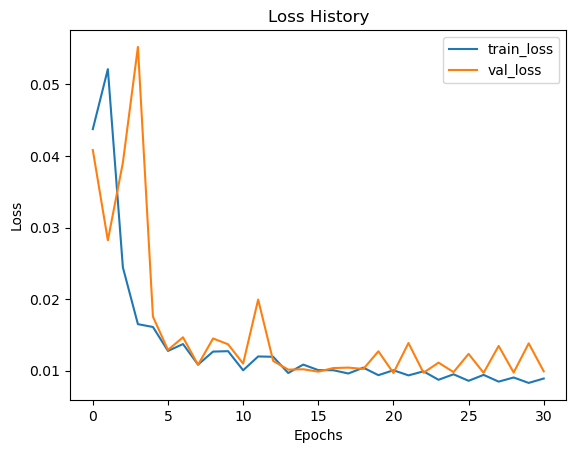

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

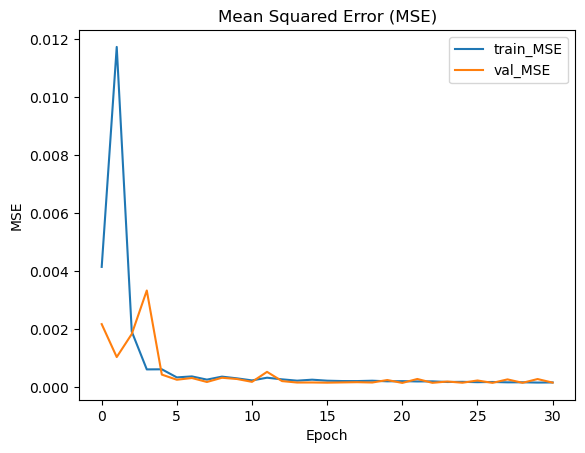

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

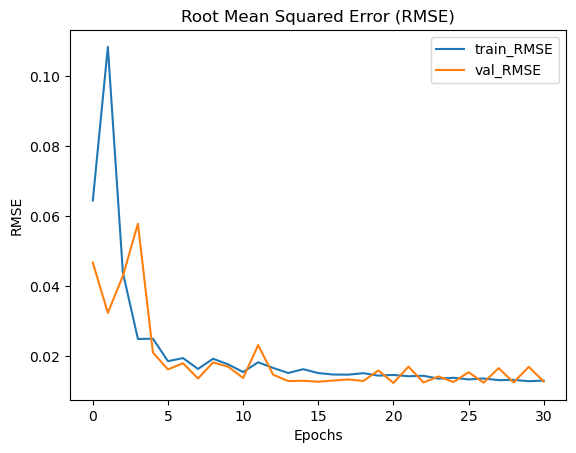

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

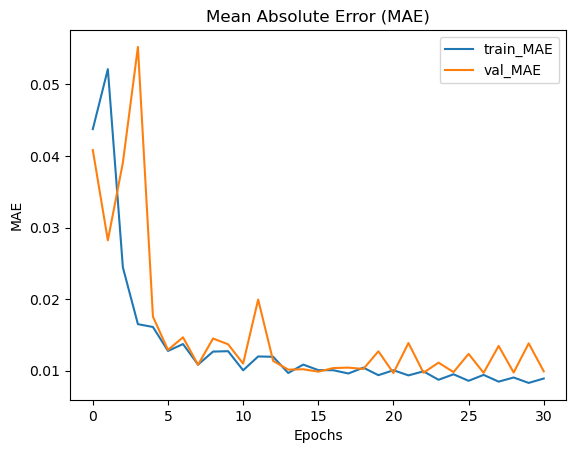

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

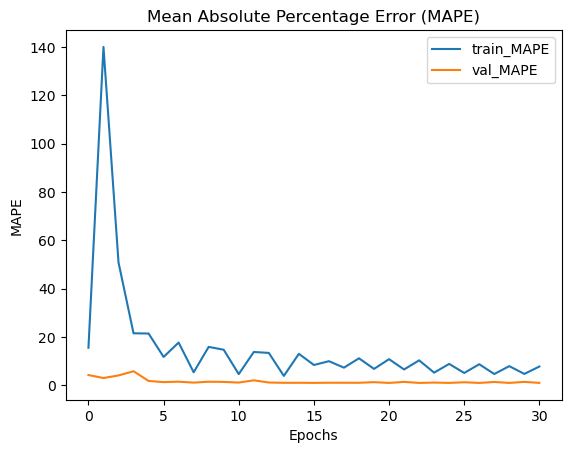

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:14:43.937910: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 4)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


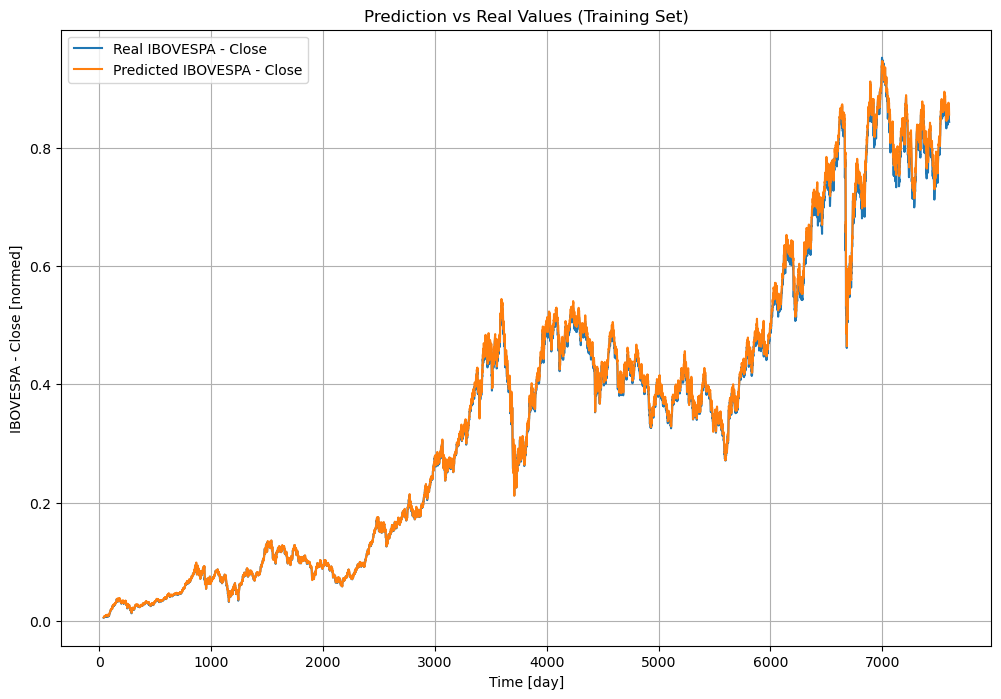

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


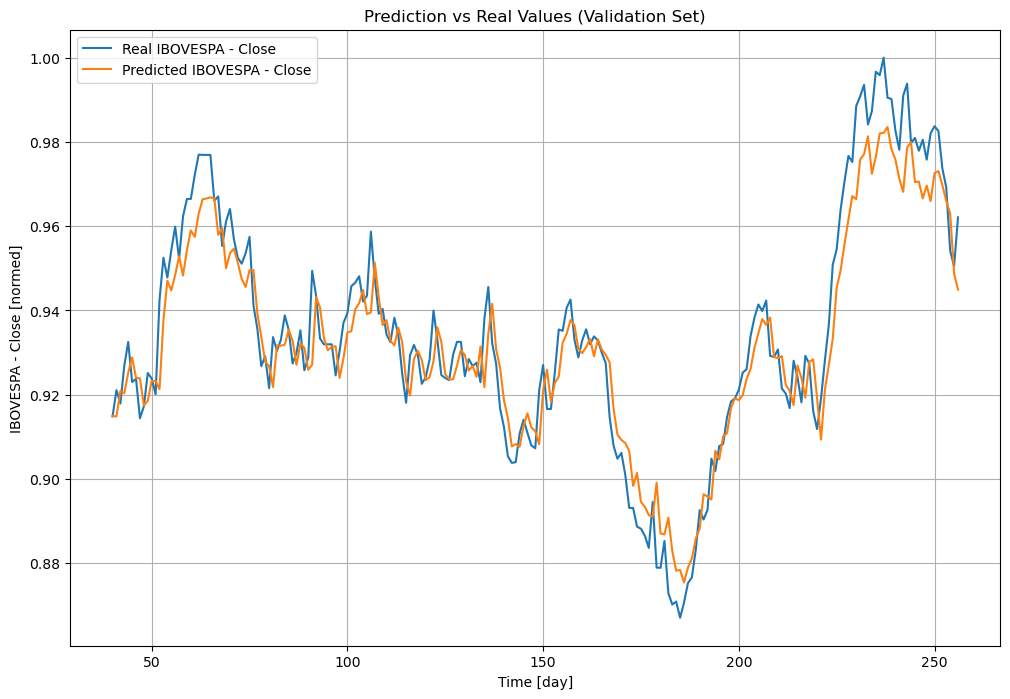

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


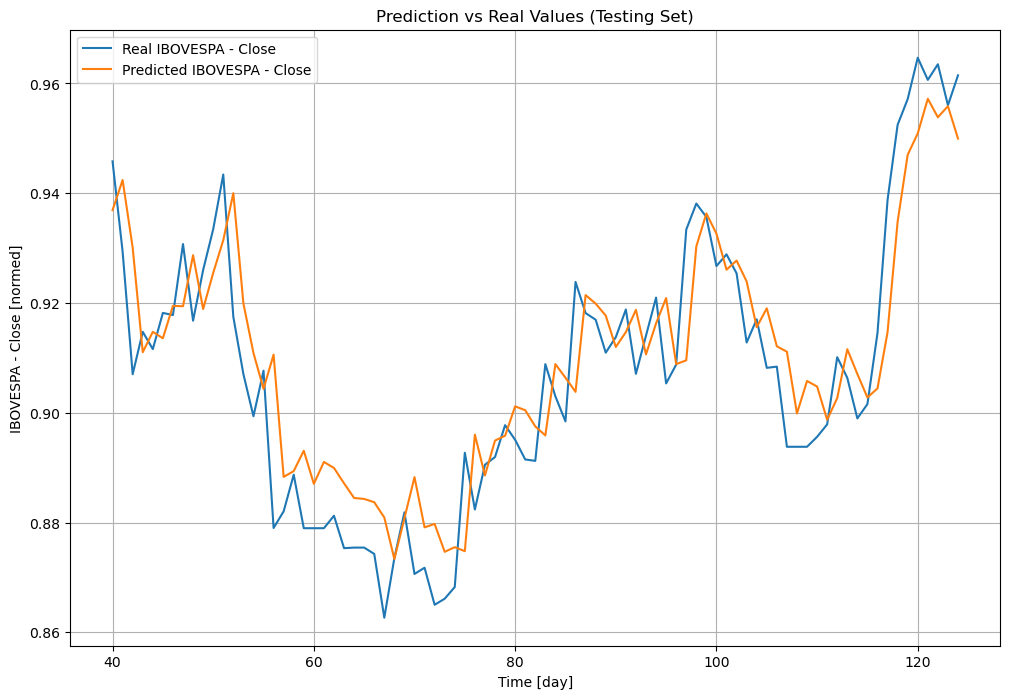

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

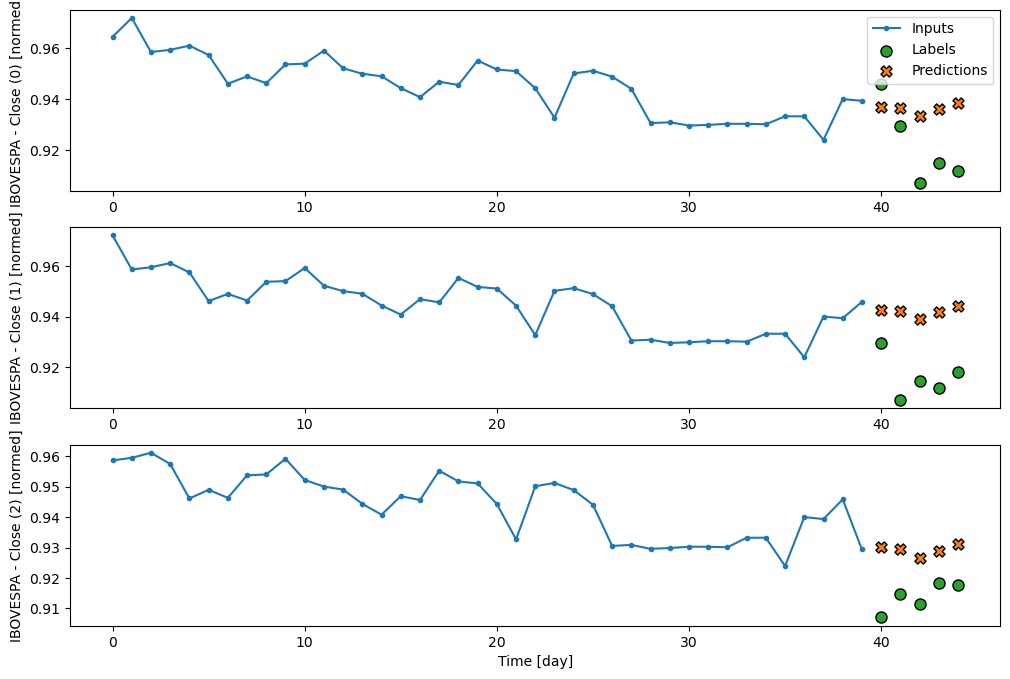

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:54s:470ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[[0.93692636, 0.93692636, 0.93692636, ..., 0.93692636,
         0.93692636, 0.93692636],
        [0.93658376, 0.93658376, 0.93658376, ..., 0.93658376,
         0.93658376, 0.93658376],
        [0.93352485, 0.93352485, 0.93352485, ..., 0.93352485,
         0.93352485, 0.93352485],
        [0.9359556 , 0.9359556 , 0.9359556 , ..., 0.9359556 ,
         0.9359556 , 0.9359556 ],
        [0.938424  , 0.938424  , 0.938424  , ..., 0.938424  ,
         0.938424  , 0.938424  ]],

       [[0.9424038 , 0.9424038 , 0.9424038 , ..., 0.9424038 ,
         0.9424038 , 0.9424038 ],
        [0.94229686, 0.94229686, 0.94229686, ..., 0.94229686,
         0.94229686, 0.94229686],
        [0.93915784, 0.93915784, 0.93915784, ..., 0.93915784,
         0.93915784, 0.93915784],
        [0.9416742 , 0.9416742 , 0.9416742 , ..., 0.9416742 ,
         0.9416742 , 0.9416742 ],
        [0.94409704, 0.94409704, 0.94409704, ..., 0.94409704,
         0.94409704, 0.94409704]],

       [[0.93009156, 0.93009156, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')